# The exploration of Modern Slavery
---

The exploration of modern slavery poses a significant and urgent challenge that necessitates the use of advanced analytical methods and state-of-the-art technologies. As such, the examination of modern slavery has been designated as the second assignment in the Analytics Practicum I (Python) course, which forms an integral part of the MSc in Business Analytics program offered by the Department of Management Science and Technology at the Athens University of Economics and Business.

The current assignment has been inspired by one study, that has appeared in the journal [Nature](https://www.nature.com/). The authors - researchers of the study, have been trying to estimate the prevalence of modern slavery, as well as factors that can help with this prediction. Machine Learning techniques can help in this endeavour, as has been shown through the following study:

* [Lavelle-Hill, R., Smith, G., Mazumder, A. et al. Machine learning methods for "wicked" problems: exploring the complex drivers of modern slavery. Humanities and Social Sciences Communications 8, 274 (2021)](https://doi.org/10.1057/s41599-021-00938-z)

More specifically, in the above-mentioned paper titled "Machine learning methods for 'wicked' problems: exploring the complex drivers of modern slavery" Lavelle-Hill et al. aim to explore the complex drivers of modern slavery by using machine learning methods to identify patterns and predictors of modern slavery.

Through the abstract of the paper we can identify that **modern slavery** is a complex and challenging issue to study, with data scarcity and high dimensionality impeding efforts to isolate and assess the importance of individual drivers statistically. However, recent advances in non-parametric computational methods offer scope to better capture the complex nature of modern slavery. In a study that models the prevalence of slavery in 48 countries, non-linear machine-learning models and strict cross-validation methods were combined with novel variable importance techniques, emphasising the importance of stability of model explanations via a Rashomon-set analysis.

The results of the study highlighted the importance of new predictive factors, such as a country's capacity to protect the physical security of women, which had been previously under-emphasised in quantitative models. Further analyses uncovered that women are particularly vulnerable to exploitation in areas where there is poor access to resources. The model was then leveraged to produce new out-of-sample estimates of slavery prevalence for countries where no survey data currently exists, providing valuable insights for policymakers and researchers seeking to combat modern slavery. Overall, this study demonstrates the potential of machine learning methods to identify patterns and predictors of complex social problems such as modern slavery.

While the current analysis will be done on [Jupyter Notebook](http://jupyter.org/) and in [Python 3.10.0](https://www.python.org/downloads/release/python-3100/).
 
---

> Dimitrios Matsanganis <br />
> Academic ID: f2822212 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> dmatsanganis@gmail.com, dim.matsanganis@aueb.gr

---

---
## Question 1: Data Preprocessing

---

To begin with, the original dataset used in the analysis of modern slavery contained a single dependent variable, namely, country-level slavery prevalence estimates expressed as a percentage of the population. The dataset covered a total of 48 countries and included prevalence estimates for the years 2016 and 2018.

However, the dataset also contained missing values, which the researchers addressed through the use of assumptions and imputation methods. For the purposes of this assignment, we will start with the unimputed data and apply the same assumptions taken by the researchers to fill in the missing values.

In addition to this, we will also leverage the imputation methods provided by the [scikit-learn](https://scikit-learn.org/stable/) library to ensure that our dataset is complete and ready for analysis. By taking these steps, we can ensure that our analysis is based on accurate and complete data, which will enable us to derive meaningful insights and actionable recommendations related to the drivers of modern slavery, guided from the researcher's study.

The initial preparatory step of this assignment is the importation of the Python libraries that will be used in the following questions of the assignments.
These libraries are presented below:

* [pandas](https://pandas.pydata.org/docs/)
* [numpy](https://numpy.org/)
* [os](https://docs.python.org/3/library/os.html)
* [matplotlib](https://matplotlib.org/)
* [sklearn](https://scikit-learn.org/stable/)
* [statsmodels](https://www.statsmodels.org/stable/index.html)
* [scipy](https://scipy.org/)

**Note!**
The aforementioned libraries, in order to function correctly, must be installed in Python **locally before being imported**.

In [1]:
import pandas as pd                 # Import Pandas library.
import numpy as np                  # Import Numpy library (most probably will be already included, but to be sure).
import matplotlib.pyplot as plt     # Import matplotlib, for plotting.  
import os                           # Import os library, in order to parse files.
import warnings
warnings.filterwarnings('ignore')   # Ignore the warnings regarding future updates - deprecations.
import sklearn                      # Import sklearn.

import statsmodels.api as sm           # Import statsmodels, for classes and functions for the estimation 
import statsmodels.formula.api as smf  # of different statistical models.

import seaborn as sns               # Import Seaborn, for plotting.
import scipy.stats.stats as stats   # Import scipy, for fundamental algorithms for scientific computing.

%matplotlib inline

* Now, lets create our dataframe `df`from the `training.csv` using pandas library. 

* Then, we output either the first or ranmoly 10 rows of the dataframe.

In [2]:
# Load the dataset - csv file.
df = pd.read_csv("training.csv")

# Preview the dataframe - 10 first rows.
df.head(10)

# Preview the dataframe - 10 random rows.
# df.sample(10)

# Preview the whole dataframe.
# df

Country  Data_year              Region  KOF_Globalis  Work_rightCIRI  \
0  Afghanistan       2018                ASIA         38.57               1   
1    Argentina       2018            AMERICAS         63.02               1   
2      Armenia       2018  RUSSIA AND EURASIA         67.09               1   
3   Bangladesh       2016                ASIA         45.54               0   
4      Bolivia       2016            AMERICAS         57.74               1   
5     Botswana       2016   SUBSAHARAN AFRICA         56.22               0   
6     Botswana       2018   SUBSAHARAN AFRICA         56.52               0   
7       Brazil       2016            AMERICAS         59.64               1   
8     Cambodia       2016                ASIA         57.89               0   
9     Cambodia       2018                ASIA         56.67               0   

   Trade_open    FDI  VDEM_Libdem  GDPpc_2016  Armedcon  ...  \
0       55.92   0.48         0.24         570         1  ...   
1       26.12   0.59         0.61       11970         0  ...   
2       75.92   3.21         0.23        3770         0  ...   
3       37.95   1.05         0.16        1330         1  ...   
4       56.40   1.54         0.40        3070         0  ...   
5       97.13   0.83         0.58        6750         0  ...   
6       97.13   0.83         0.58        6750         0  ...   
7       24.57   4.34         0.57        8840         0  ...   
8      126.95  11.43         0.11        1140         0  ...   
9      126.95  11.43         0.11        1140         0  ...   

   Pol_right_F_2011  Indep_judic_2011  Rape_prev_2018  Rape_report_2015  \
0                 2                 0             4.0               4.0   
1                 3                 1             1.0               4.0   
2                 2                 0             0.0               3.0   
3                 2                 0             1.0               4.0   
4                 3                 0             3.0               3.0   
5                 2                 2             4.0               3.0   
6                 2                 2             4.0               3.0   
7                 2                 1             2.0               3.0   
8                 2                 0             1.0               3.0   
9                 2                 0             1.0               3.0   

   Rape_enclave_2015  Rape_compl_2018  Phys_secF_2014  Phys_secF_2019  \
0                2.0             17.0             4.0             4.0   
1                0.0              9.0             3.0             2.0   
2                0.0              9.0             4.0             3.0   
3                1.0             12.0             4.0             4.0   
4                0.0             10.0             3.0             3.0   
5                0.0             12.0             4.0             3.0   
6                0.0             12.0             4.0             3.0   
7                1.0             11.0             3.0             3.0   
8                0.0             11.0             4.0             3.0   
9                0.0             11.0             4.0             3.0   

   Gender_equal_2015  Hum_traff_2019  
0                2.0             3.0  
1                4.0             1.0  
2                0.0             3.0  
3                4.0             3.0  
4                0.0             3.0  
5                3.0             2.0  
6                3.0             2.0  
7                3.0             2.0  
8                0.0             3.0  
9                0.0             3.0  

[10 rows x 120 columns]

* The dataset comprises 70 rows and 120 columns, with the first two columns, namely `Data_year` and `Country`, serving as index columns for each observation. These index columns determine the country-level and year-group (2016 or 2018) to which each observation corresponds. The dataset also includes a `Region` column, represented by other columns used as dummy variables, that categorizes each country according to its broad geographical area.


* It should be noted that not all countries have observations for both year groups. For instance, Afghanistan and Argentina have observations only for the year 2018, Brazil and Bolivia only for 2016, while Botswana and Cambodia has observations for both the years 2016 and 2018.


* Furthermore, the dataset includes exogenous variables, some of which indicate the year in which their data were collected, while others do not.


* From the researcher papers and through the dataframe we observe that some columns tend to have a year at the name (e.g. AIDS_Orph_2016) but have variables for 2018 group of years (>2016). 


* More specifically, the following code sets the values of certain cells to `0` for variables that exist for both 2016 and 2018, depending on the year group of the corresponding country. Specifically, the first loop sets the values of `AIDS_death_2016`, `AIDS_Orph_2016`, and `Phys_secF_2014` to `0` for rows where `Data_year` is equal to 2018. The second loop sets the values of `AIDS_death_2018`, `AIDS_Orph_2018`, and `Phys_secF_2019` to `0` for rows where `Data_year` is equal to 2016.


* To further clarify, these changes are specific to rows where `Data_year` is either 2016 or 2018 and only apply to the columns that represent the same variable for both years, but actually belong only to one year group.

In [3]:
# Set values to 0 for the 2016 variables/columns that exist in both 2016 and 2018, 
# but correspond to a 2018 year group of a country.
for i in range(0, len(df)):
    if df.loc[i,'Data_year'] == 2018:
        df.loc[i,'AIDS_death_2016'] = 0
        df.loc[i,'AIDS_Orph_2016'] = 0
        df.loc[i,'Phys_secF_2014'] = 0

# Set values to 0 for the 2018 variables/columns that exist in both 2016 and 2018, 
# but correspond to a 2016 year group of a country.
for i in range(0, len(df)):
    if df.loc[i,'Data_year'] == 2016:
        df.loc[i,'AIDS_death_2018'] = 0
        df.loc[i,'AIDS_Orph_2018'] = 0
        df.loc[i,'Phys_secF_2019'] = 0

# Print the relevant columns and the country and year data to check the changes made.
df[['AIDS_death_2016', 'AIDS_death_2018',
    'AIDS_Orph_2016',  'AIDS_Orph_2018', 
    'Phys_secF_2014',  'Phys_secF_2019',
    'Hum_traff_2019',  'Country', 'Data_year']]

AIDS_death_2016  AIDS_death_2018  AIDS_Orph_2016  AIDS_Orph_2018  \
0               0.0            500.0             0.0          5400.0   
1               0.0           1700.0             0.0         31000.0   
2               0.0            200.0             0.0             NaN   
3             500.0              0.0          3800.0             0.0   
4            1000.0              0.0         20000.0             0.0   
..              ...              ...             ...             ...   
65              0.0            100.0             0.0             NaN   
66              0.0          23000.0             0.0        950000.0   
67              0.0           6100.0             0.0         61000.0   
68           5300.0              0.0         94000.0             0.0   
69              0.0           4700.0             0.0         94000.0   

    Phys_secF_2014  Phys_secF_2019  Hum_traff_2019      Country  Data_year  
0              0.0             4.0             3.0  Afghanistan       2018  
1              0.0             2.0             1.0    Argentina       2018  
2              0.0             3.0             3.0      Armenia       2018  
3              4.0             0.0             3.0   Bangladesh       2016  
4              3.0             0.0             3.0      Bolivia       2016  
..             ...             ...             ...          ...        ...  
65             0.0             4.0             2.0      Tunisia       2018  
66             0.0             3.0             2.0       Uganda       2018  
67             0.0             4.0             2.0      Ukraine       2018  
68             3.0             0.0             3.0      Vietnam       2016  
69             0.0             3.0             3.0      Vietnam       2018  

[70 rows x 9 columns]

* As we can see our changes work properly. Thus, we can now create new columns for the variables `AIDS_death`, `AIDS_Orph`, and `Phys_secF` by selecting values from the corresponding columns in the belonging year groups of 2016 or 2018. Then, we will then print the relevant columns to check the changes made.


* Coding-wise, the first step is to initialize the new columns `AIDS_death`, `AIDS_Orph`, and `Phys_secF` to `None` to the current dataframe. Next, we use the numpy function np.where() to conditionally select values from the existing columns in the dataframe. Specifically, if the corresponding value in the 2016 column is 0, we use the value from the 2018 column for the `AIDS_death` and `AIDS_Orph` columns, and if the corresponding value in the 2014 column is 0, we use the value from the 2019 column for the `Phys_secF` column. The resulting values are assigned to the corresponding columns in the dataframe, `df`.


* Finally, we print the relevant columns, including the original columns and the new ones, as well as the country and year data to check the changes made.

In [4]:
# Initialize the new columns AIDS_death, AIDS_Orph, Phys_secF.
df[['AIDS_death', 'AIDS_Orph', 'Phys_secF']] = None

# Set values for new columns using np.where to conditionally select values from existing columns.
# If the corresponding value in the 2016 column is 0, use the value from the 2018 column.
# Otherwise, use the value from the 2016 column.
df['AIDS_Orph'] = np.where(df['AIDS_Orph_2016'] == 0, df['AIDS_Orph_2018'], df['AIDS_Orph_2016'])
df['AIDS_death'] = np.where(df['AIDS_death_2016'] == 0, df['AIDS_death_2018'], df['AIDS_death_2016'])
df['Phys_secF'] = np.where(df['Phys_secF_2014'] == 0, df['Phys_secF_2019'], df['Phys_secF_2014'])

        
# Print the relevant columns and the country and year data to check the changes made.
df[['AIDS_death_2016','AIDS_death_2018',
    'AIDS_Orph_2016','AIDS_Orph_2018',
    'Phys_secF_2014','Phys_secF_2019',
    'Country','Data_year',
    'AIDS_death','AIDS_Orph','Phys_secF']]

AIDS_death_2016  AIDS_death_2018  AIDS_Orph_2016  AIDS_Orph_2018  \
0               0.0            500.0             0.0          5400.0   
1               0.0           1700.0             0.0         31000.0   
2               0.0            200.0             0.0             NaN   
3             500.0              0.0          3800.0             0.0   
4            1000.0              0.0         20000.0             0.0   
..              ...              ...             ...             ...   
65              0.0            100.0             0.0             NaN   
66              0.0          23000.0             0.0        950000.0   
67              0.0           6100.0             0.0         61000.0   
68           5300.0              0.0         94000.0             0.0   
69              0.0           4700.0             0.0         94000.0   

    Phys_secF_2014  Phys_secF_2019      Country  Data_year  AIDS_death  \
0              0.0             4.0  Afghanistan       2018       500.0   
1              0.0             2.0    Argentina       2018      1700.0   
2              0.0             3.0      Armenia       2018       200.0   
3              4.0             0.0   Bangladesh       2016       500.0   
4              3.0             0.0      Bolivia       2016      1000.0   
..             ...             ...          ...        ...         ...   
65             0.0             4.0      Tunisia       2018       100.0   
66             0.0             3.0       Uganda       2018     23000.0   
67             0.0             4.0      Ukraine       2018      6100.0   
68             3.0             0.0      Vietnam       2016      5300.0   
69             0.0             3.0      Vietnam       2018      4700.0   

    AIDS_Orph  Phys_secF  
0      5400.0        4.0  
1     31000.0        2.0  
2         NaN        3.0  
3      3800.0        4.0  
4     20000.0        3.0  
..        ...        ...  
65        NaN        4.0  
66   950000.0        3.0  
67    61000.0        4.0  
68    94000.0        3.0  
69    94000.0        3.0  

[70 rows x 11 columns]

* Now, we drop the columns that are no longer needed since their information has been consolidated into the new-above-mentioned columns.


* Finally, we output the dimensions of the dataframe to provide a summary of the changes made.

In [5]:
# Drop the columns that are no longer needed. 
df.drop(['AIDS_death_2016', 'AIDS_death_2018',
         'AIDS_Orph_2016','AIDS_Orph_2018',
         'Phys_secF_2014','Phys_secF_2019'], axis=1, inplace = True)

# Print the dimensions.
df.shape

(70, 117)

* Let's have a look at the provided test dataset `OOS_Data.csv` and preview it.

In [6]:
# Load the CSV file.
df_test = pd.read_csv("OOS_Data.csv")

# Preview the dataframe - 10 first rows.
df_test.head(10)

# Preview the dataframe - 10 random rows.
# df_test.random(10)

Country  Data_year  SLAVERY    Poverty  Cereal_yield  Stunting_u5s  \
0     Afghanistan       2016     1.13  34.600000      2.020600          40.9   
1         Albania       2016     0.29   1.060000      4.892600          23.1   
2         Albania       2018     0.69   0.400000      4.892600          23.1   
3         Algeria       2016     0.63   0.300000      1.378400          11.7   
4         Algeria       2018     0.27   0.300000      1.378400          11.7   
5  American Samoa       2016     0.67   0.700000      4.860700          25.2   
6  American Samoa       2018     0.26   0.700000      3.765100           2.6   
7         Andorra       2016     0.33   0.000000     11.537701           2.6   
8         Andorra       2018     0.08   0.000000     11.537701           2.6   
9          Angola       2016     0.64  30.129999      0.888800          29.2   

   Undernourish  Wasting_u5s  Life_expect  Maternal_mort  ...    Pop_dens  \
0     26.799999          9.5           50            396  ...   54.197114   
1      4.900000          9.4           65             29  ...  104.967190   
2      4.900000          9.4           65             29  ...  104.612263   
3      5.000000          4.1           62            140  ...   17.025957   
4      4.600000          4.1           62            140  ...   17.730075   
5      4.600000          9.4           67             27  ...  278.705000   
6      4.200000          3.7           66             28  ...  277.325000   
7      1.200000          0.7           73             23  ...  164.461702   
8      1.200000          0.7           73              6  ...  163.842553   
9     14.200000          8.2           44            477  ...   23.135064   

   Urban_population  Rural_population  KOF_Globalis  Trade_open       FDI  \
0           8670939          25985093         38.48       47.66  0.892198   
1           1680247           1195854         66.91       74.81  8.304178   
2           1706345           1167112         67.48       77.08  8.855371   
3          29016679          11589373         56.73       55.93  1.091525   
4          29770548          11547594         56.78       57.96  0.978948   
5             48481              7118         36.66      162.88  1.726199   
6             48502              7139         58.90      168.24  4.052519   
7             68199              9082         46.52      149.30  8.862390   
8             67845              9120         46.88      376.50  1.753843   
9          18483548          10329915         42.45       53.37  0.149774   

   VDEM_Libdem         GDPpc  Pol_terror  Armedcon  
0        0.231    547.228110         5.0         1  
1        0.467   4124.108907         2.0         0  
2        0.428   5268.848504         2.0         0  
3        0.129   3946.421445         2.5         1  
4        0.139   4114.715061         3.0         1  
5        0.545  11696.955560         1.5         0  
6        0.385  11466.690710         2.0         0  
7        0.141  37224.108920         1.0         0  
8        0.828  42029.762740         1.0         0  
9        0.150   3506.072885         2.5         1  

[10 rows x 109 columns]

* Lets have a look if the two dataset have different variables.

In [7]:
train_vars = set(df.columns)
test_vars = set(df_test.columns)

# Variables in train but not in test.
train_only_vars = train_vars - test_vars
print("Variables in train but not in test:", train_only_vars)

Variables in train but not in test: {'Freemv_foreign_2011', 'Extrajud_kill_2011', 'Free_speech_2011', 'Pol_impris_2011', 'Econ_right_F_2011', 'Relig_freeCIRI_2011', 'Physrights_indx_2011', 'Rape_compl_2018', 'Subsah_Africa', 'GDPpc_2016', 'Freemv_dom_2011', 'Gender_equal_2015', 'Free_assem_2011', 'Polrights_indx_2011', 'Russia_Eurasia', 'M_East_N_Africa', 'Hum_traff_2019', 'Europe', 'Rape_report_2015', 'Torture_2011', 'SDGI_2016', 'Americas', 'Region', 'Free_polit_2011', 'Risk_masskill_2018', 'Work_rightCIRI_2011', 'Asia', 'Rape_enclave_2015', 'Rape_prev_2018', 'Indep_judic_2011', 'Pol_right_F_2011'}


In [8]:
# Variables in test but not in train.
test_only_vars = test_vars - train_vars
print("Variables in test but not in train:", test_only_vars)

Variables in test but not in train: {'Rape_report', 'Pop_dens', 'Freemv_dom', 'Rape_compl', 'Physrights_indx', 'Torture', 'Econ_right_F', 'Indep_judic', 'Urban_population', 'Extrajud_kill', 'Polrights_indx', 'Rape_prev', 'Freemv_foreign', 'Rural_population', 'Pol_right_F', 'Gender_equal', 'GDPpc', 'Free_polit', 'Free_speech', 'Relig_freeCIRI', 'Rape_enclave', 'Pol_impris', 'Free_assem'}


* Now we will validate the number of variables that are present in the training set but omitted from the test set, and those that are common to both sets.


* Then we will output their differences, through two print-commands.

In [9]:
# Create empty lists to hold the variables that are present in the training 
# set but omitted from the test set, and those that are common to both sets.
common_vars = []
omitted_vars = []

# Loop through each variable in the training set.
for i in train_vars:
    
    # Check if the variable is also present in the test set.
    if i in test_vars:        
        # If it is, add it to the list of common variables.
        common_vars.append(i)
        
    else:
        # If it is not, add it to the list of omitted variables.
        omitted_vars.append(i)

# Print the number of variables that are present in the training set but omitted from the test set.
print("Number of omitted variables:", len(omitted_vars))

# Print the number of variables that are common to both sets.
print("Number of common variables:", len(common_vars))

Number of omitted variables: 31
Number of common variables: 86


* Afterwards, we will remove the variables that are common between the training set and test set from the test set. The code procedure starts by making a copy of the test dataframe, and then prints the first 5 rows of the test dataframe before any variables are removed.


* Then, through loop, we can check each variable in the list of common variables. For each variable, if it is present in the test dataframe. If it is, we decide to delete the variable from the test dataframe using the del command.


* Finally, we output the first 5 rows of the test dataframe after removing the common variables. This is to verify that the common variables have been successfully removed from the test dataframe (the copy of it).

In [10]:
# Make a copy of the test dataframe.
df_test2 = df_test.copy()

# Print the first 5 rows of the test dataframe (before deletion).
print(df_test2.head(5))

# Loop through each variable in the list of common variables (86 vars).
for i in common_vars:
    
    # Check if the variable is present in the test dataframe.
    if i in df_test2:
        # If it is, delete the variable from the test dataframe.
        del df_test2[i]

# Print the first 5 rows of the test dataframe after removing the common variables.
print(df_test2.head(5))

       Country  Data_year  SLAVERY  Poverty  Cereal_yield  Stunting_u5s  \
0  Afghanistan       2016     1.13    34.60        2.0206          40.9   
1      Albania       2016     0.29     1.06        4.8926          23.1   
2      Albania       2018     0.69     0.40        4.8926          23.1   
3      Algeria       2016     0.63     0.30        1.3784          11.7   
4      Algeria       2018     0.27     0.30        1.3784          11.7   

   Undernourish  Wasting_u5s  Life_expect  Maternal_mort  ...    Pop_dens  \
0     26.799999          9.5           50            396  ...   54.197114   
1      4.900000          9.4           65             29  ...  104.967190   
2      4.900000          9.4           65             29  ...  104.612263   
3      5.000000          4.1           62            140  ...   17.025957   
4      4.600000          4.1           62            140  ...   17.730075   

   Urban_population  Rural_population  KOF_Globalis  Trade_open       FDI  \
0        

* Check how many uncommon variables present in the test set are not existing in the train set.

In [11]:
# Check how many uncommon variables present in the test set are not existing in the train set.
len(test_only_vars)

23

* Lets print them out.

In [12]:
# Print these variables.
print("Variables in test but not in train:")
for var in test_only_vars:
    print(var)

Variables in test but not in train:
Rape_report
Pop_dens
Freemv_dom
Rape_compl
Physrights_indx
Torture
Econ_right_F
Indep_judic
Urban_population
Extrajud_kill
Polrights_indx
Rape_prev
Freemv_foreign
Rural_population
Pol_right_F
Gender_equal
GDPpc
Free_polit
Free_speech
Relig_freeCIRI
Rape_enclave
Pol_impris
Free_assem


* The fact that these 23 variables are not present in the training dataset means that the model has not been trained on these variables, and therefore cannot use them to make predictions.

### Check for possible missing values (NAs) in the train and test dataframes.
---

* Check for missing values - NAs in the train dataframe, `df`.

In [13]:
# Count the number of missing values in the train dataframe 'df'
# pd.isna(df) returns a dataframe of the same shape as 'df', 
# where each element is True if the corresponding element in 
# 'df' is NA, and False otherwise.
missing_values = pd.isna(df)

# Then, sum the number of missing values for each column and for the entire dataframe
# the first 'sum()' call sums the values in each column (axis=0), 
# and the second 'sum()' call sums the resulting column 
# sums to get the total number of missing values (NAs).
trainNAs = missing_values.sum().sum()

# Print the findings.
trainNAs

281

* As we can observe there are **281** missing values in the train dataframe.


* Let's also check for possible empty strings records in the train dataframe, `df`.

In [14]:
# Check for empty strings records.
trainEmpty = df[df.eq(' ').any(axis=1)]

if not trainEmpty.empty:
    print("Empty string records found in 'df':")
    print(trainEmpty)
else:
    print("No empty string records found in 'df'.")

No empty string records found in 'df'.


* There are none empty record.


* Let's apply the same procedure for the test dataframe.


* We will check for possible missing values (NAs) in the test dataframe `df_test`.

In [15]:
# Count the number of missing values in the train dataframe 'df_test'
# pd.isna(df_test) returns a dataframe of the same shape as 'df_test', 
# where each element is True if the corresponding element in 
# 'df_test' is NA, and False otherwise.
missing_values = pd.isna(df_test)

# Then, sum the number of missing values for each column and for the entire dataframe
# the first 'sum()' call sums the values in each column (axis=0), 
# and the second 'sum()' call sums the resulting column 
# sums to get the total number of missing values (NAs).
testNAs = missing_values.sum().sum()

# Print the findings.
testNAs

0

* As we can see there is none missing values in the test dataframe.


* Let's also check for possible empty strings records in the test dataframe, `df_test`.

In [16]:
# Check for empty strings records.
testEmpty = df_test[df_test.eq(' ').any(axis=1)]

if not testEmpty.empty:
    print("Empty string records found in 'df_test':")
    print(testEmpty)
else:
    print("No empty string records found in 'df_test'.")

No empty string records found in 'df_test'.


* There are no empty entries at the test dataframe, `df_test`.

### Application of the introductive cleaning step for the train dataset.
---

We will delete the columns that have more than the 50% of their observations are missing values (NAs).

In [17]:
# Output the shape of the dataframe.
df.shape

(70, 117)

* As we can see the dataframe contains 70 rows and 117 columns.


* Let's now try to identify which columns have more than the 50% of their observations are missing values (NAs).

In [18]:
# Find the missing values (NAs).
trainNA = df.iloc[:, :].isna().sum()

# Total number of observations.
trainObs = len(df)

# Calculate the percentage of the NAs for each column.
percNA = (trainNA/trainObs) * 100

# Check if there is a column with more than 50% of its observations missing values.
colNA = [x for x in percNA if x >= 50]
print(colNA)

[]


* As we can notice, there is no column with more than 50% of its values to be missing values (NAs).


* Therefore, there is no column that we will need to delete from the train dataset, `df`.


* We also find out through the paper comprehension that if the dataset does not contain information for either 2016 or 2018 for a given country, the variables that refer to predictors from other years are already assigned to the corresponding group (either 2016 or 2018). 


* This means that the available information from the year group of a country that exists is used for the missing year group as well.

In [19]:
# Example given of a country that present two year 
# groups 2016 and 2018 ana applied to the above finding.
df[df['Country']=='Botswana']

Country  Data_year             Region  KOF_Globalis  Work_rightCIRI  \
5  Botswana       2016  SUBSAHARAN AFRICA         56.22               0   
6  Botswana       2018  SUBSAHARAN AFRICA         56.52               0   

   Trade_open   FDI  VDEM_Libdem  GDPpc_2016  Armedcon  ...  Indep_judic_2011  \
5       97.13  0.83         0.58        6750         0  ...                 2   
6       97.13  0.83         0.58        6750         0  ...                 2   

   Rape_prev_2018  Rape_report_2015  Rape_enclave_2015  Rape_compl_2018  \
5             4.0               3.0                0.0             12.0   
6             4.0               3.0                0.0             12.0   

   Gender_equal_2015  Hum_traff_2019  AIDS_death  AIDS_Orph  Phys_secF  
5                3.0             2.0      5200.0    75000.0        4.0  
6                3.0             2.0      4800.0    65000.0        3.0  

[2 rows x 117 columns]

* Let's have now a look at the columns that have at least one missing value - NA at their records.

In [20]:
# Print the columns with at least one missing value - NA.
colNA = trainNA != 0
colNA_new = colNA[colNA == True]
colNA_new

Poverty              True
Cereal_yield         True
Stunting_u5s         True
Undernourish         True
Wasting_u5s          True
Literacy_15_24yrs    True
Primary_school       True
M_school             True
Freshwater           True
Co2_fuel             True
ATMs                 True
Child_lab            True
Infrastruct          True
Broadband            True
Inequality           True
Piped_water          True
Ocean_biodiv         True
Ocean_clean          True
Ocean_protect        True
Ocean_fisheries      True
Fish_overexploit     True
CPI                  True
Gov_efficien         True
Property_rights      True
Regist_birth         True
Sexwrk_size          True
Sexwrk_HIV           True
Sexwrk_condom        True
Sexwrk_Syphilis      True
Rape_prev_2018       True
Rape_report_2015     True
Rape_enclave_2015    True
Rape_compl_2018      True
Gender_equal_2015    True
Hum_traff_2019       True
AIDS_death           True
AIDS_Orph            True
Phys_secF            True
dtype: bool

* In order to imputed the missing values (NAs), we need to remove columns from the dataframe that meet one or more of the following conditions:


    - They contain strings (non-numeric values).
    - They have no missing values.
    - They are introductory indexing columns that give information on the observation basis.

In [21]:
df2 = df.loc[:, ~df.columns.isin(['Country', 'Data_year', 'Region'])]
df2.head(10)

KOF_Globalis  Work_rightCIRI  Trade_open    FDI  VDEM_Libdem  GDPpc_2016  \
0         38.57               1       55.92   0.48         0.24         570   
1         63.02               1       26.12   0.59         0.61       11970   
2         67.09               1       75.92   3.21         0.23        3770   
3         45.54               0       37.95   1.05         0.16        1330   
4         57.74               1       56.40   1.54         0.40        3070   
5         56.22               0       97.13   0.83         0.58        6750   
6         56.52               0       97.13   0.83         0.58        6750   
7         59.64               1       24.57   4.34         0.57        8840   
8         57.89               0      126.95  11.43         0.11        1140   
9         56.67               0      126.95  11.43         0.11        1140   

   Armedcon  Asia  Subsah_Africa  Americas  ...  Indep_judic_2011  \
0         1     1              0         0  ...                 0   
1         0     0              0         1  ...                 1   
2         0     0              0         0  ...                 0   
3         1     1              0         0  ...                 0   
4         0     0              0         1  ...                 0   
5         0     0              1         0  ...                 2   
6         0     0              1         0  ...                 2   
7         0     0              0         1  ...                 1   
8         0     1              0         0  ...                 0   
9         0     1              0         0  ...                 0   

   Rape_prev_2018  Rape_report_2015  Rape_enclave_2015  Rape_compl_2018  \
0             4.0               4.0                2.0             17.0   
1             1.0               4.0                0.0              9.0   
2             0.0               3.0                0.0              9.0   
3             1.0               4.0                1.0             12.0   
4             3.0               3.0                0.0             10.0   
5             4.0               3.0                0.0             12.0   
6             4.0               3.0                0.0             12.0   
7             2.0               3.0                1.0             11.0   
8             1.0               3.0                0.0             11.0   
9             1.0               3.0                0.0             11.0   

   Gender_equal_2015  Hum_traff_2019  AIDS_death  AIDS_Orph  Phys_secF  
0                2.0             3.0       500.0     5400.0        4.0  
1                4.0             1.0      1700.0    31000.0        2.0  
2                0.0             3.0       200.0        NaN        3.0  
3                4.0             3.0       500.0     3800.0        4.0  
4                0.0             3.0      1000.0    20000.0        3.0  
5                3.0             2.0      5200.0    75000.0        4.0  
6                3.0             2.0      4800.0    65000.0        3.0  
7                3.0             2.0     16000.0        NaN        3.0  
8                0.0             3.0      1500.0    40000.0        4.0  
9                0.0             3.0      1300.0    36000.0        3.0  

[10 rows x 114 columns]

### Random Forest method as an estimation / imputation method for the mean of the missing values (NAs).
---

* We will use the Random Forest method as an equivalent to the Cart method that is a regression method with trees for the coefficient estimators.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the random forest imputer.
rf = RandomForestRegressor()
imputer = IterativeImputer(max_iter=5, random_state=500, estimator=rf)

# Impute missing values of the df2 dataframe.
df3 = imputer.fit_transform(df2)

# Convert the imputed data to dataframe.
df3 = pd.DataFrame(df3, columns = df2.columns)

# Output a portion of the dataframe.
df3.head(10)

KOF_Globalis  Work_rightCIRI  Trade_open    FDI  VDEM_Libdem  GDPpc_2016  \
0         38.57             1.0       55.92   0.48         0.24       570.0   
1         63.02             1.0       26.12   0.59         0.61     11970.0   
2         67.09             1.0       75.92   3.21         0.23      3770.0   
3         45.54             0.0       37.95   1.05         0.16      1330.0   
4         57.74             1.0       56.40   1.54         0.40      3070.0   
5         56.22             0.0       97.13   0.83         0.58      6750.0   
6         56.52             0.0       97.13   0.83         0.58      6750.0   
7         59.64             1.0       24.57   4.34         0.57      8840.0   
8         57.89             0.0      126.95  11.43         0.11      1140.0   
9         56.67             0.0      126.95  11.43         0.11      1140.0   

   Armedcon  Asia  Subsah_Africa  Americas  ...  Indep_judic_2011  \
0       1.0   1.0            0.0       0.0  ...               0.0   
1       0.0   0.0            0.0       1.0  ...               1.0   
2       0.0   0.0            0.0       0.0  ...               0.0   
3       1.0   1.0            0.0       0.0  ...               0.0   
4       0.0   0.0            0.0       1.0  ...               0.0   
5       0.0   0.0            1.0       0.0  ...               2.0   
6       0.0   0.0            1.0       0.0  ...               2.0   
7       0.0   0.0            0.0       1.0  ...               1.0   
8       0.0   1.0            0.0       0.0  ...               0.0   
9       0.0   1.0            0.0       0.0  ...               0.0   

   Rape_prev_2018  Rape_report_2015  Rape_enclave_2015  Rape_compl_2018  \
0             4.0               4.0                2.0             17.0   
1             1.0               4.0                0.0              9.0   
2             0.0               3.0                0.0              9.0   
3             1.0               4.0                1.0             12.0   
4             3.0               3.0                0.0             10.0   
5             4.0               3.0                0.0             12.0   
6             4.0               3.0                0.0             12.0   
7             2.0               3.0                1.0             11.0   
8             1.0               3.0                0.0             11.0   
9             1.0               3.0                0.0             11.0   

   Gender_equal_2015  Hum_traff_2019  AIDS_death  AIDS_Orph  Phys_secF  
0                2.0             3.0       500.0     5400.0        4.0  
1                4.0             1.0      1700.0    31000.0        2.0  
2                0.0             3.0       200.0    11159.0        3.0  
3                4.0             3.0       500.0     3800.0        4.0  
4                0.0             3.0      1000.0    20000.0        3.0  
5                3.0             2.0      5200.0    75000.0        4.0  
6                3.0             2.0      4800.0    65000.0        3.0  
7                3.0             2.0     16000.0   440950.0        3.0  
8                0.0             3.0      1500.0    40000.0        4.0  
9                0.0             3.0      1300.0    36000.0        3.0  

[10 rows x 114 columns]

* Let's check for possible missing values that continue to exist after the application of the imputation method.

In [23]:
# Check if missing values still exist.
# df3.isna().sum()
df3.isna().sum().sum()

0

* Add to the final dataset, without missing values the initial string columns that have been removed by applying the imputation method, the introductory indexing columns that give information on the observation basis.

In [24]:
# Add to the final dataset the imputation method, the introductory 
# indexing columns that give information on the observation basis.
df3['Country'] = df['Country']
df3['Data_year'] = df['Data_year']
df3['Region'] = df['Region']

# Preview the dataframe.
df3.head(10)

KOF_Globalis  Work_rightCIRI  Trade_open    FDI  VDEM_Libdem  GDPpc_2016  \
0         38.57             1.0       55.92   0.48         0.24       570.0   
1         63.02             1.0       26.12   0.59         0.61     11970.0   
2         67.09             1.0       75.92   3.21         0.23      3770.0   
3         45.54             0.0       37.95   1.05         0.16      1330.0   
4         57.74             1.0       56.40   1.54         0.40      3070.0   
5         56.22             0.0       97.13   0.83         0.58      6750.0   
6         56.52             0.0       97.13   0.83         0.58      6750.0   
7         59.64             1.0       24.57   4.34         0.57      8840.0   
8         57.89             0.0      126.95  11.43         0.11      1140.0   
9         56.67             0.0      126.95  11.43         0.11      1140.0   

   Armedcon  Asia  Subsah_Africa  Americas  ...  Rape_enclave_2015  \
0       1.0   1.0            0.0       0.0  ...                2.0   
1       0.0   0.0            0.0       1.0  ...                0.0   
2       0.0   0.0            0.0       0.0  ...                0.0   
3       1.0   1.0            0.0       0.0  ...                1.0   
4       0.0   0.0            0.0       1.0  ...                0.0   
5       0.0   0.0            1.0       0.0  ...                0.0   
6       0.0   0.0            1.0       0.0  ...                0.0   
7       0.0   0.0            0.0       1.0  ...                1.0   
8       0.0   1.0            0.0       0.0  ...                0.0   
9       0.0   1.0            0.0       0.0  ...                0.0   

   Rape_compl_2018  Gender_equal_2015  Hum_traff_2019  AIDS_death  AIDS_Orph  \
0             17.0                2.0             3.0       500.0     5400.0   
1              9.0                4.0             1.0      1700.0    31000.0   
2              9.0                0.0             3.0       200.0    11159.0   
3             12.0                4.0             3.0       500.0     3800.0   
4             10.0                0.0             3.0      1000.0    20000.0   
5             12.0                3.0             2.0      5200.0    75000.0   
6             12.0                3.0             2.0      4800.0    65000.0   
7             11.0                3.0             2.0     16000.0   440950.0   
8             11.0                0.0             3.0      1500.0    40000.0   
9             11.0                0.0             3.0      1300.0    36000.0   

   Phys_secF      Country  Data_year              Region  
0        4.0  Afghanistan       2018                ASIA  
1        2.0    Argentina       2018            AMERICAS  
2        3.0      Armenia       2018  RUSSIA AND EURASIA  
3        4.0   Bangladesh       2016                ASIA  
4        3.0      Bolivia       2016            AMERICAS  
5        4.0     Botswana       2016   SUBSAHARAN AFRICA  
6        3.0     Botswana       2018   SUBSAHARAN AFRICA  
7        3.0       Brazil       2016            AMERICAS  
8        4.0     Cambodia       2016                ASIA  
9        3.0     Cambodia       2018                ASIA  

[10 rows x 117 columns]

* As we can observe, we have added successfully the introductory indexing columns that provide information on the observation basis back on the dataframe, `df3`.


* Moving forward, we need to point out the fact that in the training set, some variables are suffixed with the year in which the data is gathered, while in the test set, these variables have different names. To ensure that variable names match in both sets, it is necessary to remove the year suffixes from the variables in the training set


* By removing the year suffixes from the variable names in the training set, the variable names will match those in the test set, allowing us to continue our analysis.


* We will do so with code presented below.

In [25]:
# Preview those variables in the 'test' dataset (no year suffix in the names).
test_only_vars

{'Econ_right_F',
 'Extrajud_kill',
 'Free_assem',
 'Free_polit',
 'Free_speech',
 'Freemv_dom',
 'Freemv_foreign',
 'GDPpc',
 'Gender_equal',
 'Indep_judic',
 'Physrights_indx',
 'Pol_impris',
 'Pol_right_F',
 'Polrights_indx',
 'Pop_dens',
 'Rape_compl',
 'Rape_enclave',
 'Rape_prev',
 'Rape_report',
 'Relig_freeCIRI',
 'Rural_population',
 'Torture',
 'Urban_population'}

In [26]:
# Assigns the column names of a dataframe df3 to a variable train_col_names.
train_col_names = df3.columns

# Creates a new list train_col_names_year containing only the column names 
# that end with the year between 2010 and 2019 (inclusive).
train_col_names_year = list(filter(lambda x: x[-4:] in ['2010','2011',
                                                        '2012','2013',
                                                        '2014','2015',
                                                        '2016','2017',
                                                        '2018','2019'], train_col_names))

# Preview the findings.
train_col_names_year

['GDPpc_2016',
 'SDGI_2016',
 'Risk_masskill_2018',
 'Physrights_indx_2011',
 'Extrajud_kill_2011',
 'Pol_impris_2011',
 'Torture_2011',
 'Polrights_indx_2011',
 'Free_assem_2011',
 'Freemv_foreign_2011',
 'Freemv_dom_2011',
 'Free_speech_2011',
 'Free_polit_2011',
 'Relig_freeCIRI_2011',
 'Work_rightCIRI_2011',
 'Econ_right_F_2011',
 'Pol_right_F_2011',
 'Indep_judic_2011',
 'Rape_prev_2018',
 'Rape_report_2015',
 'Rape_enclave_2015',
 'Rape_compl_2018',
 'Gender_equal_2015',
 'Hum_traff_2019']

In [27]:
# Count the variables.
len(test_only_vars)
len(train_col_names_year)

24

* There are **24** variables that we need to substitute the name of the variables with year suffixes with their names without the year suffixes in order to match the two dataframes.


* To do so, we applied an iterative procedure over each element of the `train_col_names` list. If the element is in the `train_col_names_year` list, it removes the last five characters - the year suffix and appends the result to the `train_col_names` list. Otherwise, it appends the original element to the list. The resulting `train_col_names` list will contain the variable names for the train dataset without the year suffixes.

In [28]:
# A list comprehension to iterate over each element of the train_col_names list. 
# If the element is in the train_col_names_year list, 
# it removes the last five characters - the year suffix.
train_col_names2 = [col[:-5] if col in train_col_names_year else col for col in train_col_names]

# Preview the findings.
train_col_names2

['KOF_Globalis',
 'Work_rightCIRI',
 'Trade_open',
 'FDI',
 'VDEM_Libdem',
 'GDPpc',
 'Armedcon',
 'Asia',
 'Subsah_Africa',
 'Americas',
 'Europe',
 'M_East_N_Africa',
 'Russia_Eurasia',
 'Pol_terror',
 'SLAVERY',
 'SDGI',
 'Poverty',
 'Cereal_yield',
 'Stunting_u5s',
 'Undernourish',
 'Wasting_u5s',
 'Life_expect',
 'Maternal_mort',
 'Neonatal_mort',
 'Wellbeing',
 'Tuberculosis',
 'Infant_mort',
 'Infant_vaccines',
 'Literacy_15_24yrs',
 'Primary_school',
 'Yrs_of_school',
 'Lack_contraception',
 'F_school',
 'M_school',
 'F_parliam',
 'Freshwater',
 'Sanitation',
 'Water_acc',
 'Co2_fuel',
 'Electric_acc',
 'Fuel_acc',
 'Growth_rate',
 'ATMs',
 'Child_lab',
 'Unemploy',
 'Infrastruct',
 'Internet_use',
 'Broadband',
 'Inequality',
 'Piped_water',
 'Treated_waste',
 'Climate_chg_vuln',
 'Co2_energy_pc',
 'Ocean_biodiv',
 'Ocean_clean',
 'Ocean_protect',
 'Ocean_fisheries',
 'Fish_overexploit',
 'Terrestrial_protect',
 'Forest_change',
 'Species_survival',
 'CPI',
 'Gov_efficien',
 '

* Validate our latest change, by printing out the results.

In [29]:
# Preview final dataframe's columns names (before the changes). 
df3.columns

Index(['KOF_Globalis', 'Work_rightCIRI', 'Trade_open', 'FDI', 'VDEM_Libdem',
       'GDPpc_2016', 'Armedcon', 'Asia', 'Subsah_Africa', 'Americas',
       ...
       'Rape_enclave_2015', 'Rape_compl_2018', 'Gender_equal_2015',
       'Hum_traff_2019', 'AIDS_death', 'AIDS_Orph', 'Phys_secF', 'Country',
       'Data_year', 'Region'],
      dtype='object', length=117)

In [30]:
# Assign the proper names, through a for-loop statement.
for i in range(0, len(train_col_names)):
    df3.columns = df3.columns.str.replace(train_col_names[i], train_col_names2[i])

# Preview final dataframe's columns names (after the changes). 
df3.columns

Index(['KOF_Globalis', 'Work_rightCIRI', 'Trade_open', 'FDI', 'VDEM_Libdem',
       'GDPpc', 'Armedcon', 'Asia', 'Subsah_Africa', 'Americas',
       ...
       'Rape_enclave', 'Rape_compl', 'Gender_equal', 'Hum_traff', 'AIDS_death',
       'AIDS_Orph', 'Phys_secF', 'Country', 'Data_year', 'Region'],
      dtype='object', length=117)

### Train - Test dataframes variables differentiations
---


* In this section we will compare the final train dataframe `df3` with the test dataframe `df_test`.


* To check how the train and test dataframes differ with respect to their columns/variables, we can compare the set of column names in each dataframe.  

In [31]:
# Initialize the columns variables.
train_vars = df3.columns
test_vars = df_test.columns

# Re-initiallize the lists.
common_vars = []
omitted_vars = []

# Loop through each variable in the training set.
for i in train_vars:
    
    # Check if the variable is also present in the test set.
    if i in test_vars:        
        # If it is, add it to the list of common variables.
        common_vars.append(i)
        
    else:
        # If it is not, add it to the list of omitted variables.
        omitted_vars.append(i)

# Print the number of variables that are present in the training set but omitted from the test set.
print("Number of omitted variables:", len(omitted_vars))

# Print the number of variables that are common to both sets.
print("Number of common variables:", len(common_vars))

Number of omitted variables: 10
Number of common variables: 107


* Lets figure out, which variables differentiate between the two sets.

In [32]:
# Get the column names of the training and testing datasets.
train_vars = df3.columns
test_vars = df_test.columns

# Identify the variables/columns that exist in the testing dataset but not in the training dataset.
trainNtestY = []
for col in test_vars:
    if col not in train_vars:
        # If the column exists in the testing dataset but not in the training dataset,
        # append its name to the list of missing columns
        trainNtestY.append(col)

# Convert the list of variables to a comma-separated string.
trainNtestY_str = ", ".join(trainNtestY)

# Preview the results.
print("The following variables/columns exist in the testing dataset but not in the training dataset:")
print(trainNtestY_str)

The following variables/columns exist in the testing dataset but not in the training dataset:
Pop_dens, Urban_population, Rural_population


In [33]:
# Get the column names of the training and testing datasets.
train_vars = df3.columns
test_vars = df_test.columns

# Identify the variables/columns that exist in the training dataset but not in the testing dataset.
trainYtestN = []
for col in train_vars:
    if col not in test_vars:
        # If the column exists in the training dataset but not in the testing dataset,
        # append its name to the list of missing columns
        trainYtestN.append(col)

# Convert the list of variables to a comma-separated string.
trainYtestN_str = ", ".join(trainYtestN)

# Preview the results.
print("The following variables/columns exist in the training dataset but not in the test dataset:")
print(trainYtestN_str)

The following variables/columns exist in the training dataset but not in the test dataset:
Asia, Subsah_Africa, Americas, Europe, M_East_N_Africa, Russia_Eurasia, SDGI, Risk_masskill, Hum_traff, Region


---
## Question 2: Slavery Estimation Using All Features

--- 

This task involves the training of multiple models, including linear regression models, decision trees, and random forests, to predict slavery prevalence using all the available features in the dataset. The imputed data will be utilized to train these models, separately for predicting slavery prevalence in 2016 and 2018. 


The evaluation of model performance will be conducted using the Mean Average Error (MAE) metric on the [Out of Sample data](oos_data.csv). Moreover, the importance of various features in predicting slavery prevalence can be assessed using ridge regression and lasso regression for linear regression. Such analysis can help identify critical factors that contribute significantly to the prevalence of slavery in different regions, which can facilitate the development of effective policies to combat this social issue.

In this point we need to highlight that we need to create **six** models, two per category (two linear regression models, two decision trees, and two random forests) for each of the two year groups (2016 and 2018).


### Linear Regression Models
---


The first issue we should resolve is to delete the variables/columns that exist in the training dataset but not in the test dataset. These are the `Region` column and the region dummies variables (`Asia`, `Subsah_Africa`, `Americas`, `Europe`, `M_East_N_Africa`, `Russia_Eurasia`), as well as the variables `SDGI`, `Risk_masskill`, `Hum_traff`.

 

In [34]:
# Preview the initial dataframe's shape prior to the removal.
df3.shape

(70, 117)

In [35]:
# Create a new dataframe, copy of df3.
df_question2 = df3.copy()

# Remove the variables that are not presented in the test dataset.
df_question2.drop(['Asia', 'Subsah_Africa', 'Americas',
                   'Europe', 'M_East_N_Africa', 'Russia_Eurasia',
                   'Region', 'SDGI', 'Risk_masskill', 'Hum_traff'], axis=1, inplace = True)

# Preview the dataframe's shape after the removal.
df_question2.shape

(70, 107)

* As we can see from the two dataframes outputs, the removal of the ten variables/columns that exist in the training dataset but not in the test dataset has been applied successfully.


* Furthermore, another dataset should be created for the regression model that excludes the variables `Country` and `Year` since they represent the levels at which the response variable is expressed, and are therefore highly correlated. Including these variables in the model could negatively impact its performance, so it is important to omit them from the dataset.

In [36]:
# Create a new dataframe, copy of df_question2.
df_reg_model = df_question2.copy()

# Exclude the Country and Data_year variables (highly correlated).
df_reg_model.drop(['Country', 'Data_year'], axis=1, inplace = True)

# Preview the created dataframe.
df_reg_model.head(10)
# df_reg_model.sample(10)

KOF_Globalis  Work_rightCIRI  Trade_open    FDI  VDEM_Libdem    GDPpc  \
0         38.57             1.0       55.92   0.48         0.24    570.0   
1         63.02             1.0       26.12   0.59         0.61  11970.0   
2         67.09             1.0       75.92   3.21         0.23   3770.0   
3         45.54             0.0       37.95   1.05         0.16   1330.0   
4         57.74             1.0       56.40   1.54         0.40   3070.0   
5         56.22             0.0       97.13   0.83         0.58   6750.0   
6         56.52             0.0       97.13   0.83         0.58   6750.0   
7         59.64             1.0       24.57   4.34         0.57   8840.0   
8         57.89             0.0      126.95  11.43         0.11   1140.0   
9         56.67             0.0      126.95  11.43         0.11   1140.0   

   Armedcon  Pol_terror  SLAVERY    Poverty  ...  Pol_right_F  Indep_judic  \
0       1.0         5.0     2.22  30.768601  ...          2.0          0.0   
1       0.0         2.0     0.13   0.000000  ...          3.0          1.0   
2       0.0         3.0     0.34   2.440000  ...          2.0          0.0   
3       1.0         4.0     0.95  43.650002  ...          2.0          0.0   
4       0.0         2.0     0.44   7.700000  ...          3.0          0.0   
5       0.0         2.0     0.52  18.240000  ...          2.0          2.0   
6       0.0         2.0     0.36  18.240000  ...          2.0          2.0   
7       0.0         3.5     0.08   4.870000  ...          2.0          1.0   
8       0.0         2.5     1.65   6.150000  ...          2.0          0.0   
9       0.0         2.5     1.68   6.150000  ...          2.0          0.0   

   Rape_prev  Rape_report  Rape_enclave  Rape_compl  Gender_equal  AIDS_death  \
0        4.0          4.0           2.0        17.0           2.0       500.0   
1        1.0          4.0           0.0         9.0           4.0      1700.0   
2        0.0          3.0           0.0         9.0           0.0       200.0   
3        1.0          4.0           1.0        12.0           4.0       500.0   
4        3.0          3.0           0.0        10.0           0.0      1000.0   
5        4.0          3.0           0.0        12.0           3.0      5200.0   
6        4.0          3.0           0.0        12.0           3.0      4800.0   
7        2.0          3.0           1.0        11.0           3.0     16000.0   
8        1.0          3.0           0.0        11.0           0.0      1500.0   
9        1.0          3.0           0.0        11.0           0.0      1300.0   

   AIDS_Orph  Phys_secF  
0     5400.0        4.0  
1    31000.0        2.0  
2    11159.0        3.0  
3     3800.0        4.0  
4    20000.0        3.0  
5    75000.0        4.0  
6    65000.0        3.0  
7   440950.0        3.0  
8    40000.0        4.0  
9    36000.0        3.0  

[10 rows x 105 columns]

* Since we created the dataframe for the regression model, `df_reg_model`, we will move forward and plot the pairwise comparisons regarding the predictor variables (as a sample we used the first six variables - we can easily apply it to the other variables).


* To be more precise, through the code we create a pairwise comparison plot, also known as a scatter plot matrix, for the first six predictor variables in the `df_reg_model` dataframe using the pairplot function from the Seaborn library. 


* The map_upper, map_lower, and map_diag methods customize the appearance of the scatter plot matrix, displaying scatter plots with custom marker sizes and colors in the upper triangle of the matrix, kernel density estimate plots with a custom color map in the lower triangle, and histograms in the diagonal. The fig.suptitle method adds a title to the figure, and the tight_layout method adjusts the spacing between subplots to minimize overlaps.


* Overall, this procedure provide to us a visual inspection of the pairwise relationships between the first six predictor variables in the `df_reg_model` dataframe. However, since this plot may be confuzing we also plot the simplier and more usual plot.

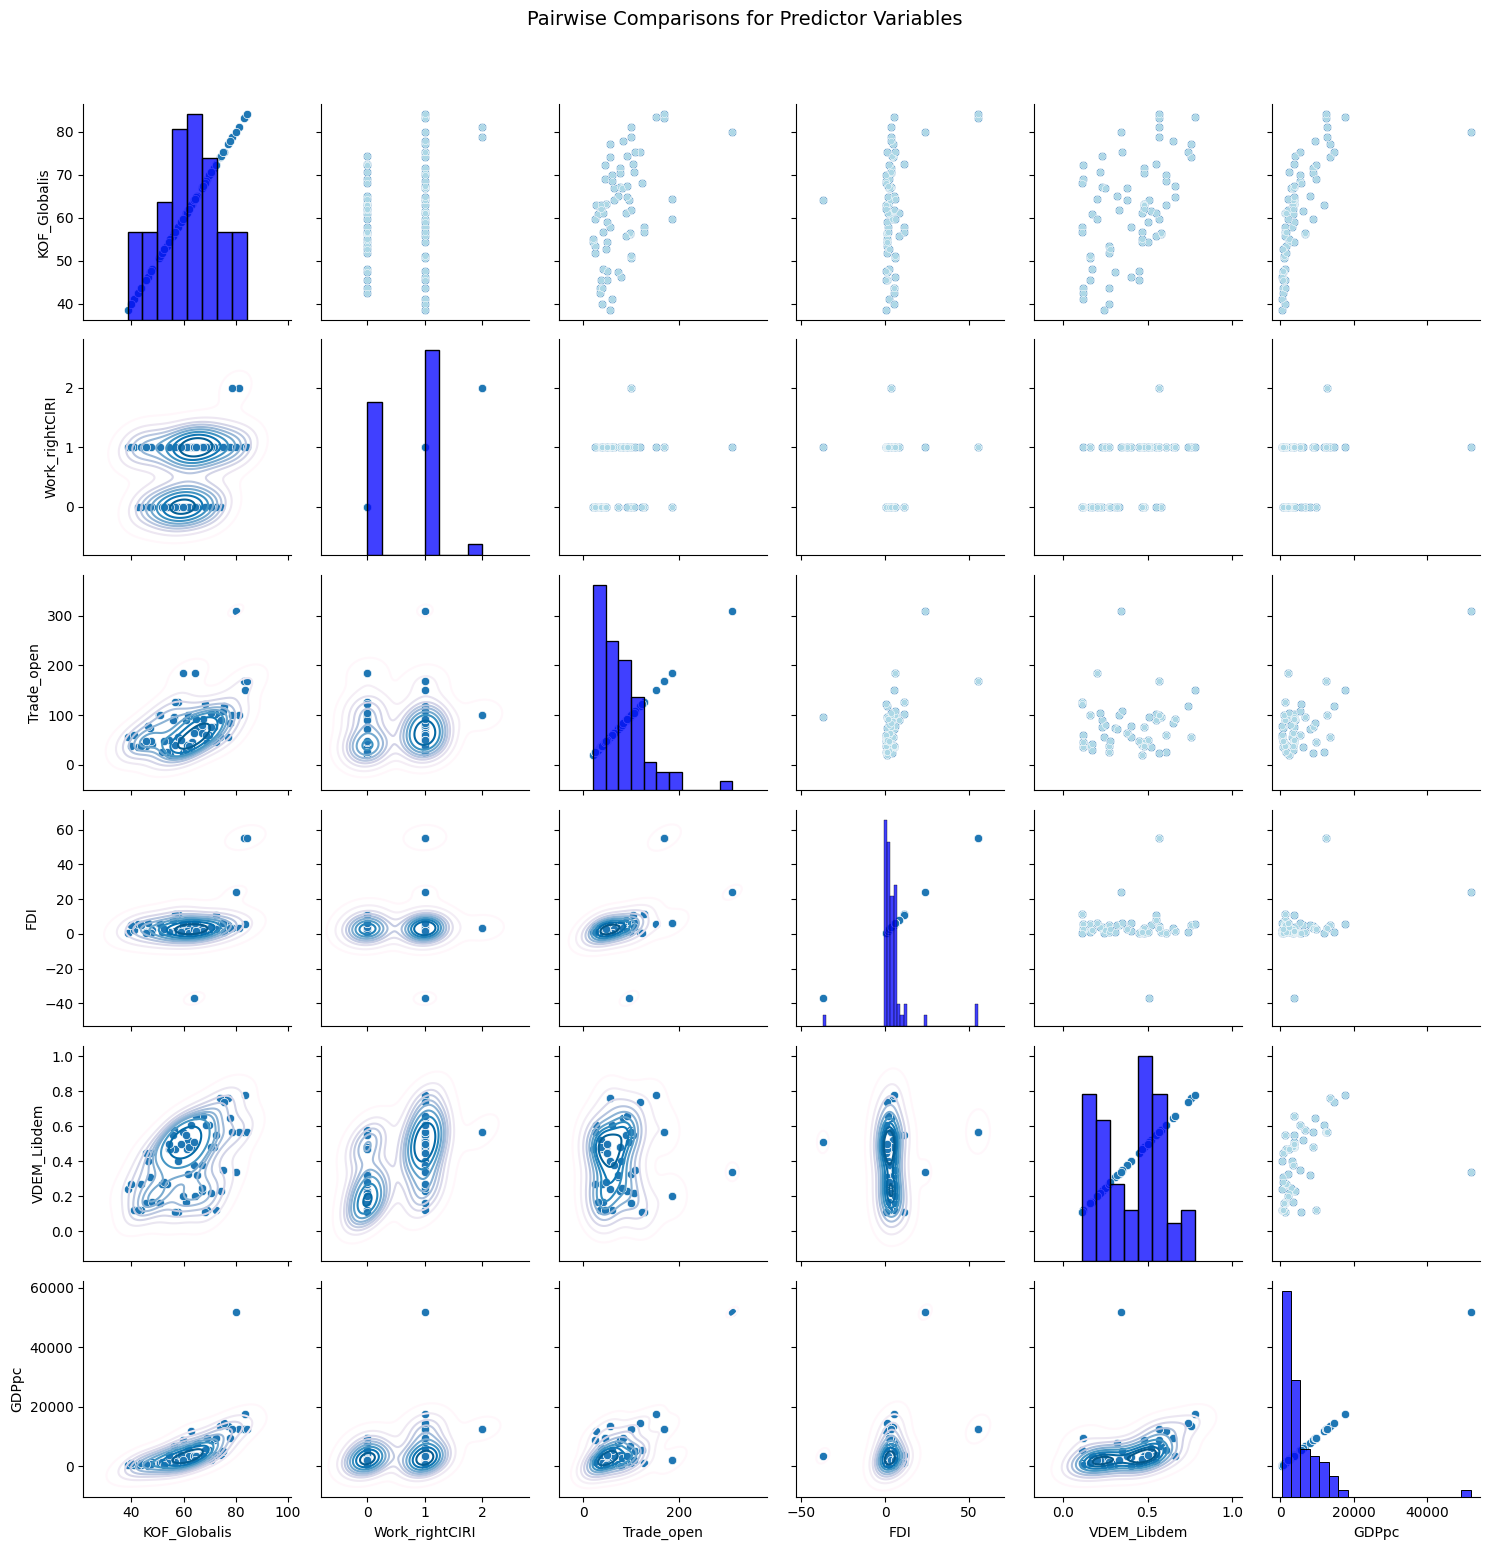

In [37]:
# Create a pairplot of scatter plots for all predictor variables.
pairplot = sns.pairplot(df_reg_model.iloc[:, 0:6], diag_kind = None)

# Customize the pairplot appearance.
pairplot.map_upper(sns.scatterplot, s = 20, color = 'lightblue')
pairplot.map_lower(sns.kdeplot, cmap = 'PuBu')
pairplot.map_diag(sns.histplot, kde = False, color = 'blue')
pairplot.fig.suptitle('Pairwise Comparisons for Predictor Variables', y = 1.03, fontsize = 14)
plt.tight_layout()
plt.show()

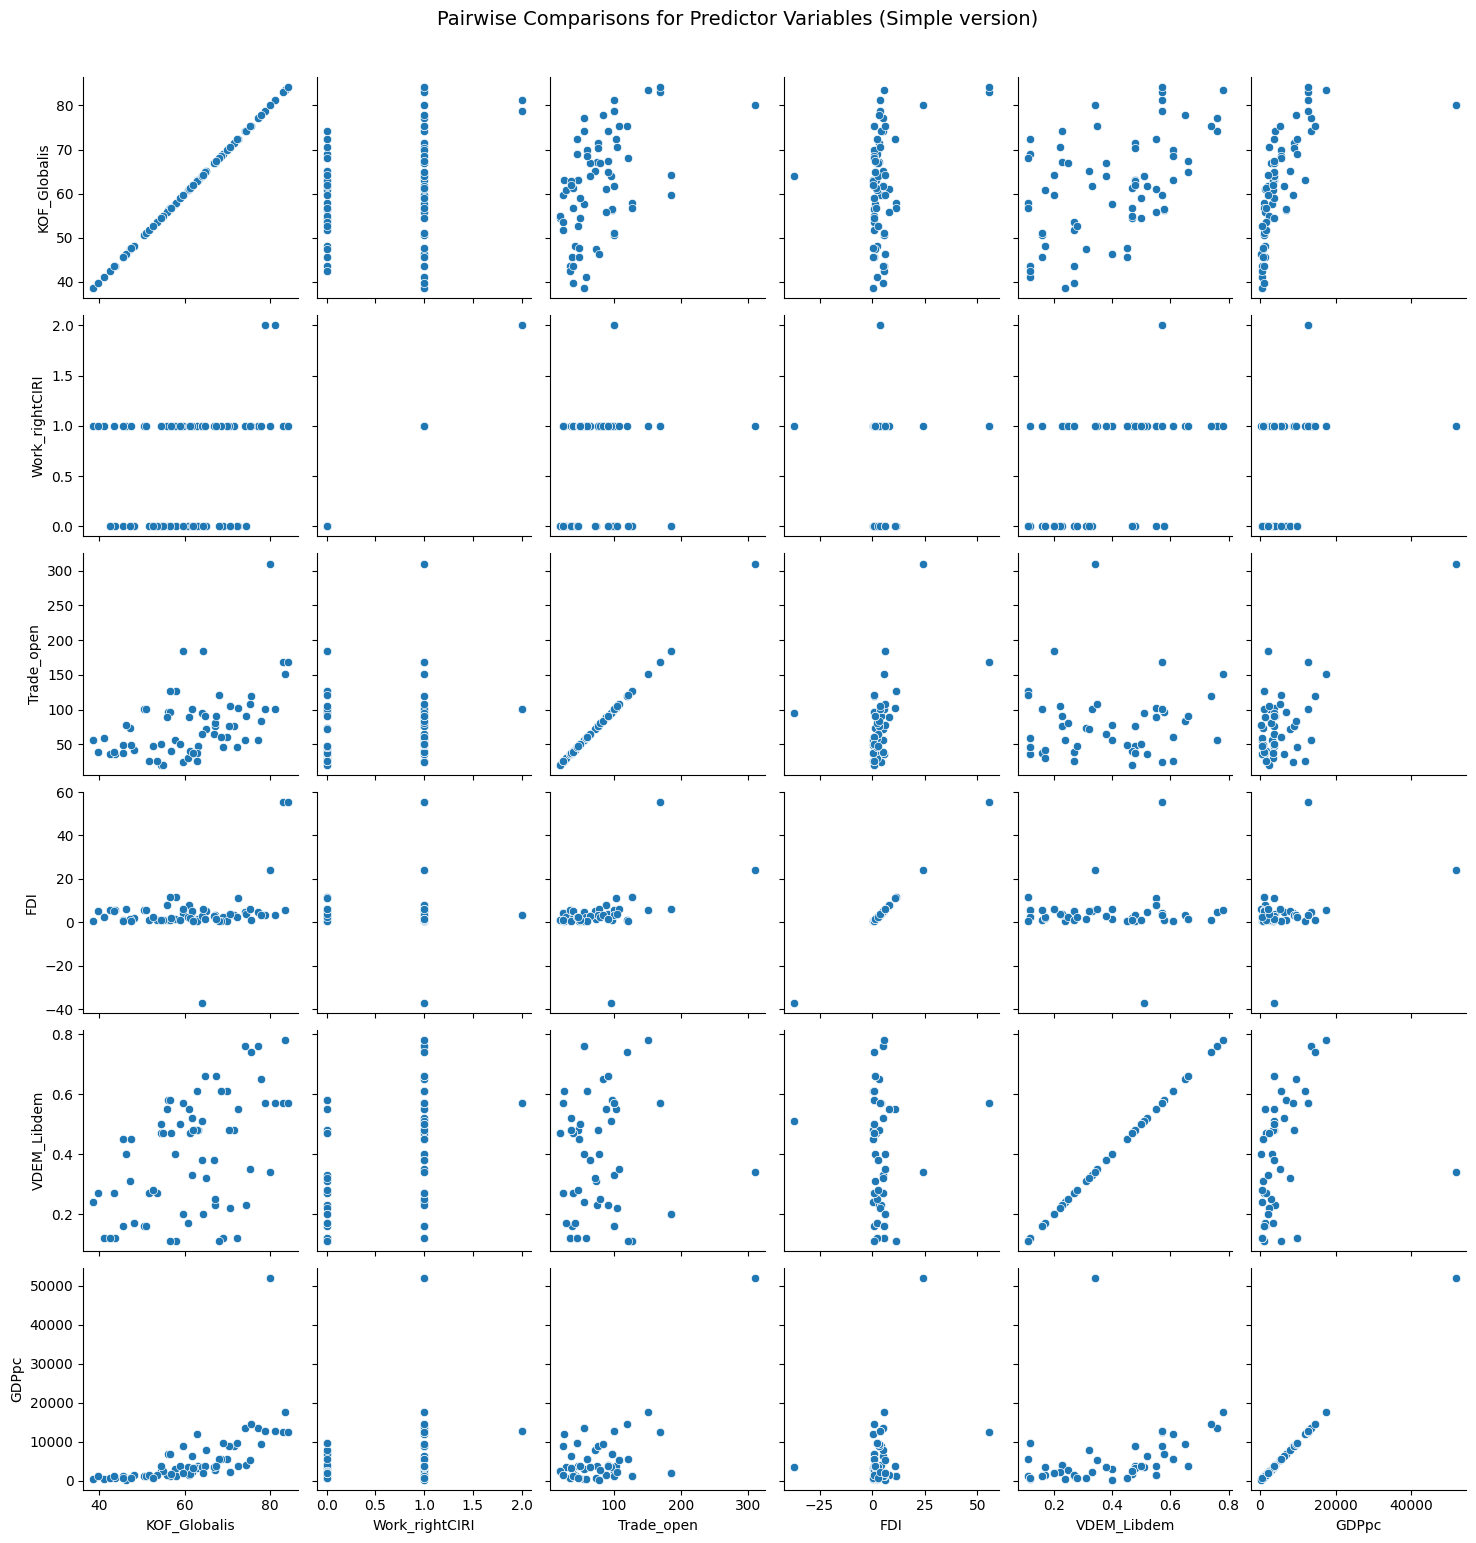

In [38]:
# Simplier and more usual plot.
pairplot = sns.pairplot(df_reg_model.iloc[:,0:6], diag_kind = None)
pairplot.fig.suptitle('Pairwise Comparisons for Predictor Variables (Simple version)', y=1.03, fontsize=14)
plt.show()

* Now we can also create a correlation matrix of some quantitative predictor variables. A correlation matrix of quantitative predictor variables is a table that shows the pairwise correlations between two or more quantitative (continuous) variables in a dataframe. Each variable is compared to every other variable, resulting in a square matrix where the diagonal contains the correlation of each variable with itself (which is always 1), and the off-diagonal elements contain the correlations between each pair of variables.


* Through the following visualization we can identify which variables are related to each other and to what degree. The correlation coefficient ranges from -1 to 1, with values close to 1 indicating a strong positive relationship between two variables, values close to -1 indicating a strong negative relationship, and values close to 0 indicating little or no relationship.

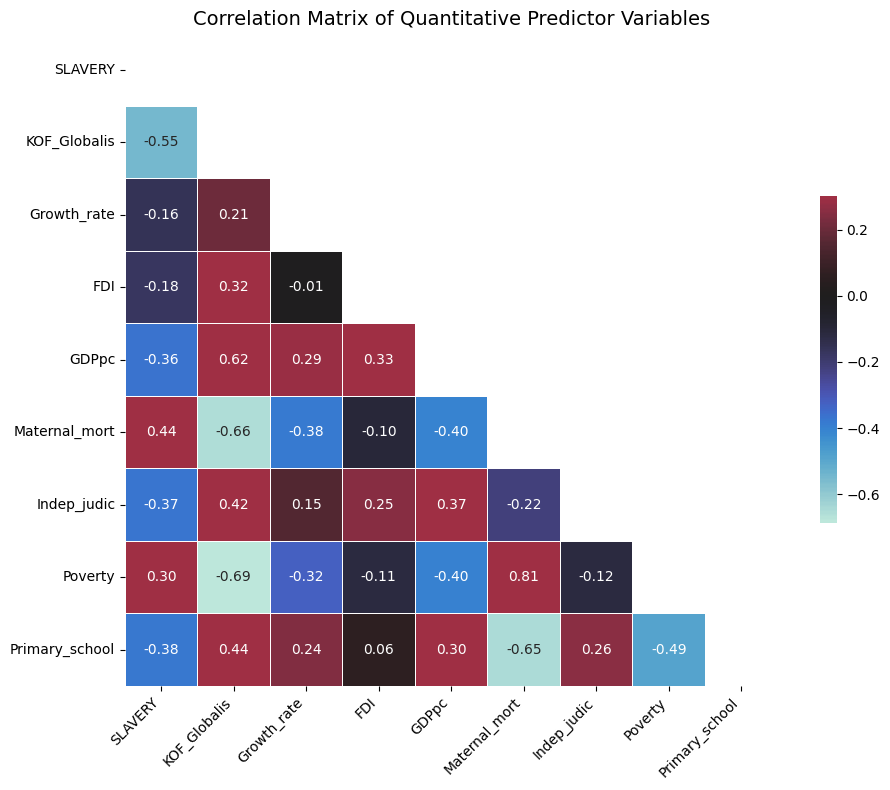

In [39]:
# Choose some quantitative predictor variables.
df_pearson_plot = df_reg_model.loc[:, ['SLAVERY', 'KOF_Globalis', 'Growth_rate',
                                       'FDI', 'GDPpc', 'Maternal_mort', 
                                       'Indep_judic', 'Poverty', 'Primary_school']]

# Calculate the Pearson correlation.
corr = df_pearson_plot.corr()

# Create a upper triangle matrix.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define figure and axes.
f, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap.
sns.heatmap(corr, mask=mask, vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Customize the plot's appearance.
ax.set_title('Correlation Matrix of Quantitative Predictor Variables', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.tight_layout()
plt.show()

* Based on the figure presented, it can be concluded that there are no significant correlations (with absolute values greater than 0.75 or less than -0.75) observed between the pairwise comparisons that were performed.


* This suggests that there is no evidence of a correlation issue between the variables that were analyzed.


* Moreover, it is an important step to **normalize** the data to follow the researchers guidance. Thus, we will create a function that normalize the data to [0, 1] values.


* The X is a dataframe that represents the normalized data between [0, 1], while y represents only the response vector (SLAVERY). 

In [40]:
from sklearn import preprocessing

# Normalize the data to have values that belong to [0, 1] 
# as it is implemented in the article.
def Normalize(X):
    r = (0, 1)
    a = X.values
    min_max_scaler = preprocessing.MinMaxScaler(feature_range = r)
    a = min_max_scaler.fit_transform(a)
    X = pd.DataFrame(a, columns = X.columns, index = X.index)
    return X

# Create X and y - normalized train dataframes.
X = df_question2.copy().drop(['SLAVERY', 'Country', 'Data_year'], axis = 1)
X = Normalize(X)

y = df_question2['SLAVERY']
y = pd.DataFrame(y)

* After we normalize the data we add back the introductory indexing columns that provide information on the observation basis and the response variable that we could not keep them during the normalization procedure.

In [41]:
# Add back introductory indexing columns and the
# response column to the normalized dataset X.
X['Data_year'] = df_question2['Data_year']
X['Country']   = df_question2['Country']
X['SLAVERY']   = df_question2['SLAVERY']

# Preview the created dataframe.
X.head(10)
# X.sample(10)

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
0      0.000000             0.5    0.121572  0.406324     0.194030  0.004849   
1      0.535832             0.5    0.018650  0.407511     0.746269  0.225950   
2      0.625027             0.5    0.190647  0.435787     0.179104  0.066912   
3      0.152750             0.0    0.059508  0.412476     0.074627  0.019589   
4      0.420118             0.5    0.123230  0.417764     0.432836  0.053336   
5      0.386807             0.0    0.263901  0.410101     0.701493  0.124709   
6      0.393382             0.0    0.263901  0.410101     0.701493  0.124709   
7      0.461758             0.5    0.013297  0.447982     0.686567  0.165244   
8      0.423406             0.0    0.366892  0.524498     0.000000  0.015904   
9      0.396669             0.0    0.366892  0.524498     0.000000  0.015904   

   Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Rape_report  \
0       1.0       1.000  0.398660      0.239843  ...          1.0   
1       0.0       0.250  0.000000      0.614533  ...          1.0   
2       0.0       0.500  0.031614      0.388528  ...          0.5   
3       1.0       0.750  0.565561      0.592475  ...          1.0   
4       0.0       0.250  0.099767      0.227632  ...          0.5   
5       0.0       0.250  0.236331      0.000000  ...          0.5   
6       0.0       0.250  0.236331      0.000000  ...          0.5   
7       0.0       0.625  0.063099      0.627173  ...          0.5   
8       0.0       0.375  0.079684      0.388897  ...          0.5   
9       0.0       0.375  0.079684      0.388897  ...          0.5   

   Rape_enclave  Rape_compl  Gender_equal  AIDS_death  AIDS_Orph  Phys_secF  \
0           1.0         1.0      0.333333    0.005413   0.003387        1.0   
1           0.0         0.2      0.666667    0.021651   0.023095        0.0   
2           0.0         0.2      0.000000    0.001353   0.007821        0.5   
3           0.5         0.5      0.666667    0.005413   0.002156        1.0   
4           0.0         0.3      0.000000    0.012179   0.014627        0.5   
5           0.0         0.5      0.500000    0.069012   0.056967        1.0   
6           0.0         0.5      0.500000    0.063599   0.049269        0.5   
7           0.5         0.4      0.500000    0.215156   0.338684        0.5   
8           0.0         0.4      0.000000    0.018945   0.030023        1.0   
9           0.0         0.4      0.000000    0.016238   0.026944        0.5   

   Data_year      Country  SLAVERY  
0       2018  Afghanistan     2.22  
1       2018    Argentina     0.13  
2       2018      Armenia     0.34  
3       2016   Bangladesh     0.95  
4       2016      Bolivia     0.44  
5       2016     Botswana     0.52  
6       2018     Botswana     0.36  
7       2016       Brazil     0.08  
8       2016     Cambodia     1.65  
9       2018     Cambodia     1.68  

[10 rows x 107 columns]

### Separate the train dataframe containing counties observations into two groups based on the year group that they belong
---

* In order to analyze the county observations within the dataframe properly and create models that we would be able to understand them easily, it necessary to separate the normalized dataframe `X` into two isolated dataframes based on the group year in which they were collected (earlier to 2016, belong to 2016 group and after 2016 to 2018 group - as suggested by the authors). 


* We will create the `df_normalized_2016` for the first group and the `df_normalized_2018` for the second one.

In [42]:
# Keep the records with the entries that corresponds to 2016 group.
df_normalized_2016 = X[X['Data_year'] == 2016]

# Preview the dataframe's shape.
df_normalized_2016.shape 

(25, 107)

In [43]:
# Preview the dataframe.
df_normalized_2016.head(10)

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
3       0.152750             0.0    0.059508  0.412476     0.074627  0.019589   
4       0.420118             0.5    0.123230  0.417764     0.432836  0.053336   
5       0.386807             0.0    0.263901  0.410101     0.701493  0.124709   
7       0.461758             0.5    0.013297  0.447982     0.686567  0.165244   
8       0.423406             0.0    0.366892  0.524498     0.000000  0.015904   
11      0.845058             0.5    0.120156  0.454565     0.970149  0.256400   
17      0.111769             0.0    0.051081  0.460069     0.014925  0.006594   
20      0.492220             0.5    0.236997  0.488992     0.656716  0.020559   
22      0.537366             0.0    0.090765  0.419599     0.552239  0.067300   
26      0.976551             0.5    0.512088  1.000000     0.686567  0.237587   

    Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Rape_report  \
3        1.0       0.750  0.565561      0.592475  ...          1.0   
4        0.0       0.250  0.099767      0.227632  ...          0.5   
5        0.0       0.250  0.236331      0.000000  ...          0.5   
7        0.0       0.625  0.063099      0.627173  ...          0.5   
8        0.0       0.375  0.079684      0.388897  ...          0.5   
11       0.0       0.250  0.000000      0.847147  ...          1.0   
17       1.0       0.875  0.434569      0.284905  ...          1.0   
20       0.0       0.375  0.325862      0.192948  ...          0.5   
22       0.0       0.375  0.149391      0.254213  ...          1.0   
26       0.0       0.250  0.000000      0.812936  ...          0.0   

    Rape_enclave  Rape_compl  Gender_equal  AIDS_death  AIDS_Orph  Phys_secF  \
3            0.5         0.5      0.666667    0.005413   0.002156        1.0   
4            0.0         0.3      0.000000    0.012179   0.014627        0.5   
5            0.0         0.5      0.500000    0.069012   0.056967        1.0   
7            0.5         0.4      0.500000    0.215156   0.338684        0.5   
8            0.0         0.4      0.000000    0.018945   0.030023        1.0   
11           0.5         0.3      0.500000    0.016373   0.003849        0.5   
17           0.5         0.6      0.833333    0.161028   0.260970        0.5   
20           0.0         0.2      0.333333    0.188092   0.168591        1.0   
22           0.5         0.4      0.333333    0.031123   0.033102        1.0   
26           0.0         0.0      0.000000    0.000000   0.008447        0.5   

    Data_year     Country  SLAVERY  
3        2016  Bangladesh     0.95  
4        2016     Bolivia     0.44  
5        2016    Botswana     0.52  
7        2016      Brazil     0.08  
8        2016    Cambodia     1.65  
11       2016       Chile     0.15  
17       2016    Ethiopia     0.41  
20       2016       Ghana     0.38  
22       2016   Guatemala     0.84  
26       2016     Hungary     0.23  

[10 rows x 107 columns]

In [44]:
# Keep the records with the entries that corresponds to 2018 group.
df_normalized_2018 = X[X['Data_year'] == 2018]

# Preview the dataframe's shape.
df_normalized_2018.shape 

(45, 107)

In [45]:
# Preview the dataframe.
df_normalized_2018.head(10)

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
0       0.000000             0.5    0.121572  0.406324     0.194030  0.004849   
1       0.535832             0.5    0.018650  0.407511     0.746269  0.225950   
2       0.625027             0.5    0.190647  0.435787     0.179104  0.066912   
6       0.393382             0.0    0.263901  0.410101     0.701493  0.124709   
9       0.396669             0.0    0.366892  0.524498     0.000000  0.015904   
10      0.208416             0.0    0.073496  0.423376     0.089552  0.020946   
12      0.779531             0.5    0.120156  0.454565     0.970149  0.256400   
13      0.506465             0.5    0.054397  0.454457     0.611940  0.116175   
14      0.982687             0.5    0.452027  0.461148     1.000000  0.333980   
15      0.056323             0.5    0.134247  0.426506     0.014925  0.002133   

    Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Rape_report  \
0        1.0       1.000  0.398660      0.239843  ...         1.00   
1        0.0       0.250  0.000000      0.614533  ...         1.00   
2        0.0       0.500  0.031614      0.388528  ...         0.50   
6        0.0       0.250  0.236331      0.000000  ...         0.50   
9        0.0       0.375  0.079684      0.388897  ...         0.50   
10       1.0       0.625  0.379243      0.181032  ...         0.50   
12       0.0       0.250  0.000000      0.847147  ...         1.00   
13       1.0       0.500  0.079295      0.427587  ...         1.00   
14       0.0       0.000  0.000000      0.860674  ...         0.50   
15       1.0       1.000  1.000000      0.053888  ...         0.83   

    Rape_enclave  Rape_compl  Gender_equal  AIDS_death  AIDS_Orph  Phys_secF  \
0           1.00       1.000      0.333333    0.005413   0.003387      1.000   
1           0.00       0.200      0.666667    0.021651   0.023095      0.000   
2           0.00       0.200      0.000000    0.001353   0.007821      0.500   
6           0.00       0.500      0.500000    0.063599   0.049269      0.500   
9           0.00       0.400      0.000000    0.016238   0.026944      0.500   
10          1.00       0.600      0.166667    0.242219   0.314858      1.000   
12          0.50       0.300      0.500000    0.012179   0.004388      0.000   
13          1.00       0.600      0.333333    0.033099   0.041570      1.000   
14          0.00       0.100      0.500000    0.003058   0.007209      0.000   
15          0.85       0.636      0.436667    0.174560   0.314858      0.855   

    Data_year                           Country  SLAVERY  
0        2018                       Afghanistan     2.22  
1        2018                         Argentina     0.13  
2        2018                           Armenia     0.34  
6        2018                          Botswana     0.36  
9        2018                          Cambodia     1.68  
10       2018                          Cameroon     0.69  
12       2018                             Chile     0.08  
13       2018                          Colombia     0.27  
14       2018                    Czech Republic     0.13  
15       2018  Democratic Republic of the Congo     1.37  

[10 rows x 107 columns]

* As we can see the `df_normalized_2016` contains 25 countries and 107 columns, while the `df_normalized_2016` contains 45 countries and 107 columns as well.


* Let's move forward and create the predictors matrices needed for the linear regression model, with respect to each year group. 


* To do so, we will apply the following commands and we will drop the non-predictors variables from the predictor variables `X16`and `X18` and we will initialize the response vector `y16` and `y18`, that will contain only the response variable *SLAVERY*.

In [46]:
# Create the predictors matrix for the linear regression model.
X16 = df_normalized_2016.copy()

# Drop the non-predictors columns (indexes and response).
X16.drop(['Country', 'Data_year','SLAVERY'], axis = 1, inplace = True)

# Preview the findings.
print(X16.head(10))

# Preview the X16's shape.
X16.shape

    KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
3       0.152750             0.0    0.059508  0.412476     0.074627  0.019589   
4       0.420118             0.5    0.123230  0.417764     0.432836  0.053336   
5       0.386807             0.0    0.263901  0.410101     0.701493  0.124709   
7       0.461758             0.5    0.013297  0.447982     0.686567  0.165244   
8       0.423406             0.0    0.366892  0.524498     0.000000  0.015904   
11      0.845058             0.5    0.120156  0.454565     0.970149  0.256400   
17      0.111769             0.0    0.051081  0.460069     0.014925  0.006594   
20      0.492220             0.5    0.236997  0.488992     0.656716  0.020559   
22      0.537366             0.0    0.090765  0.419599     0.552239  0.067300   
26      0.976551             0.5    0.512088  1.000000     0.686567  0.237587   

    Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Pol_right_F  \
3        1.0       0.750  0.565561    

(25, 104)

In [47]:
# Create the response variable vector only containing SLAVERY. 
y16 = df_normalized_2016['SLAVERY']

# Preview the findings.
print(y16.head(10))

# Preview the y16's shape.
y16.shape

3     0.95
4     0.44
5     0.52
7     0.08
8     1.65
11    0.15
17    0.41
20    0.38
22    0.84
26    0.23
Name: SLAVERY, dtype: float64


(25,)

In [48]:
# Create the predictors matrix for the linear regression model.
X18 = df_normalized_2018.copy()

# Drop the non-predictors columns (indexes and response).
X18.drop(['Country', 'Data_year','SLAVERY'], axis = 1, inplace = True)

# Preview the findings.
print(X18.head(10))

# Preview the X18's shape.
X18.shape

    KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
0       0.000000             0.5    0.121572  0.406324     0.194030  0.004849   
1       0.535832             0.5    0.018650  0.407511     0.746269  0.225950   
2       0.625027             0.5    0.190647  0.435787     0.179104  0.066912   
6       0.393382             0.0    0.263901  0.410101     0.701493  0.124709   
9       0.396669             0.0    0.366892  0.524498     0.000000  0.015904   
10      0.208416             0.0    0.073496  0.423376     0.089552  0.020946   
12      0.779531             0.5    0.120156  0.454565     0.970149  0.256400   
13      0.506465             0.5    0.054397  0.454457     0.611940  0.116175   
14      0.982687             0.5    0.452027  0.461148     1.000000  0.333980   
15      0.056323             0.5    0.134247  0.426506     0.014925  0.002133   

    Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Pol_right_F  \
0        1.0       1.000  0.398660    

(45, 104)

In [49]:
# Create the response variable vector only containing SLAVERY. 
y18 = df_normalized_2018['SLAVERY']

# Preview the findings.
print(y18.head(10))

# Preview the y18's shape.
y18.shape

0     2.22
1     0.13
2     0.34
6     0.36
9     1.68
10    0.69
12    0.08
13    0.27
14    0.13
15    1.37
Name: SLAVERY, dtype: float64


(45,)

* Everything have been successfully implemented so far, thus we can move forward to apply the similar procedures to the test dataframe.

### Normalize the test dataframe
---

* Before we separate the test dataframe to the two isolated year groups dataframes, we need to normalize this data (in a similar way we did with the train dataframe).


* Finally, we will create the `df_test_normalized` dataframe.

In [50]:
# Load the test dataframe.
df_test = pd.read_csv("OOS_Data.csv")

# Preview the dataframe.
df_test

Country  Data_year  SLAVERY  Poverty  Cereal_yield  Stunting_u5s  \
0    Afghanistan       2016     1.13    34.60        2.0206          40.9   
1        Albania       2016     0.29     1.06        4.8926          23.1   
2        Albania       2018     0.69     0.40        4.8926          23.1   
3        Algeria       2016     0.63     0.30        1.3784          11.7   
4        Algeria       2018     0.27     0.30        1.3784          11.7   
..           ...        ...      ...      ...           ...           ...   
358        Samoa       2018     1.09     0.00        1.2059          46.5   
359        Yemen       2016     1.13    86.00        0.9627          46.5   
360        Yemen       2018     0.31    86.00        0.9627          46.8   
361       Zambia       2016     0.67    64.43        2.7554          40.0   
362       Zambia       2018     0.57    53.60        2.7554          40.0   

     Undernourish  Wasting_u5s  Life_expect  Maternal_mort  ...    Pop_dens  \
0       26.799999          9.5           50            396  ...   54.197114   
1        4.900000          9.4           65             29  ...  104.967190   
2        4.900000          9.4           65             29  ...  104.612263   
3        5.000000          4.1           62            140  ...   17.025957   
4        4.600000          4.1           62            140  ...   17.730075   
..            ...          ...          ...            ...  ...         ...   
358      3.200000          4.3           65             51  ...   69.303887   
359     26.100000         16.3           55            385  ...   51.457867   
360     28.800000         16.2           55            385  ...   53.977853   
361     47.799999          6.3           50            224  ...   22.012009   
362     45.900000          6.3           50            224  ...   23.341479   

     Urban_population  Rural_population  KOF_Globalis  Trade_open       FDI  \
0             8670939          25985093         38.48       47.66  0.892198   
1             1680247           1195854         66.91       74.81  8.304178   
2             1706345           1167112         67.48       77.08  8.855371   
3            29016679          11589373         56.73       55.93  1.091525   
4            29770548          11547594         56.78       57.96  0.978948   
..                ...               ...           ...         ...       ...   
358             36247            160193         52.52       80.39  2.230980   
359           9763156          17821057         48.78       37.42  1.152626   
360          10174671          18075749         49.60       47.00  0.046095   
361           7041054           9550336         57.42       73.96  6.156355   
362           7346373           9747757         57.09       75.66  5.389514   

     VDEM_Libdem        GDPpc  Pol_terror  Armedcon  
0          0.231   547.228110         5.0         1  
1          0.467  4124.108907         2.0         0  
2          0.428  5268.848504         2.0         0  
3          0.129  3946.421445         2.5         1  
4          0.139  4114.715061         3.0         1  
..           ...          ...         ...       ...  
358        0.405  4183.407935         1.0         0  
359        0.040  1139.870568         5.0         1  
360        0.040   944.408499         5.0         1  
361        0.304  1280.578447         3.0         0  
362        0.250  1539.900158         2.5         0  

[363 rows x 109 columns]

In [51]:
# Create df_test_normalized, and drop the columns in order to apply the normalization method.
df_test_normalized = df_test.copy().drop(["SLAVERY", "Country", "Data_year"], axis=1)

# Apply the normalized method - that created earlier.
df_test_normalized = Normalize(df_test_normalized)

# Preview the dataframe.
df_test_normalized

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
0    0.402326      0.172570      0.711304      0.446282     0.418502   
1    0.012326      0.422266      0.401739      0.064949     0.414097   
2    0.004651      0.422266      0.401739      0.064949     0.414097   
3    0.003488      0.116736      0.203478      0.066690     0.180617   
4    0.003488      0.116736      0.203478      0.059725     0.180617   
..        ...           ...           ...           ...          ...   
358  0.000000      0.101739      0.808696      0.035347     0.189427   
359  1.000000      0.080595      0.808696      0.434094     0.718062   
360  1.000000      0.080595      0.813913      0.481107     0.713656   
361  0.749186      0.236455      0.695652      0.811945     0.277533   
362  0.623256      0.236455      0.695652      0.778861     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
0       0.297297       0.289609       0.725572   0.155013      0.220367  ...   
1       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
2       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
3       0.621622       0.100958       0.309771   0.582561      0.089840  ...   
4       0.621622       0.100958       0.311850   0.582561      0.089840  ...   
..           ...            ...            ...        ...           ...  ...   
358     0.702703       0.035372       0.178794   0.307077      0.078081  ...   
359     0.432432       0.281503       0.446985   0.260741      0.054563  ...   
360     0.432432       0.281503       0.544699   0.260741      0.054563  ...   
361     0.297297       0.162859       0.432432   0.482308      0.475541  ...   
362     0.297297       0.162859       0.463617   0.482308      0.475541  ...   

     Pop_dens  Urban_population  Rural_population  KOF_Globalis  Trade_open  \
0    0.002602          0.010784          0.043565      0.133672    0.068694   
1    0.005045          0.002084          0.002005      0.599967    0.142411   
2    0.005028          0.002117          0.001957      0.609316    0.148575   
3    0.000813          0.036104          0.019430      0.433000    0.091149   
4    0.000847          0.037042          0.019360      0.433820    0.096660   
..        ...               ...               ...           ...         ...   
358  0.003329          0.000038          0.000269      0.363949    0.157562   
359  0.002470          0.012143          0.029878      0.302608    0.040891   
360  0.002591          0.012655          0.030305      0.316057    0.066902   
361  0.001053          0.008756          0.016012      0.444317    0.140103   
362  0.001117          0.009136          0.016343      0.438904    0.144719   

          FDI  VDEM_Libdem     GDPpc  Pol_terror  Armedcon  
0    0.008302     0.260163  0.001485       1.000       1.0  
1    0.019039     0.534262  0.020771       0.250       0.0  
2    0.019837     0.488966  0.026943       0.250       0.0  
3    0.008590     0.141696  0.019813       0.375       1.0  
4    0.008427     0.153310  0.020720       0.500       1.0  
..        ...          ...       ...         ...       ...  
358  0.010241     0.462253  0.021091       0.000       0.0  
359  0.008679     0.038328  0.004681       1.000       1.0  
360  0.007076     0.038328  0.003627       1.000       1.0  
361  0.015927     0.344948  0.005439       0.500       0.0  
362  0.014817     0.282230  0.006838       0.375       0.0  

[363 rows x 106 columns]

* After the normalization method we need to bring back the indexes and the response.

In [52]:
# Add back the indexes and the response variable.
df_test_normalized['SLAVERY']   = df_test['SLAVERY']
df_test_normalized['Data_year'] = df_test['Data_year']
df_test_normalized['Country']   = df_test['Country']

# Preview the dataframe.
df_test_normalized

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
0    0.402326      0.172570      0.711304      0.446282     0.418502   
1    0.012326      0.422266      0.401739      0.064949     0.414097   
2    0.004651      0.422266      0.401739      0.064949     0.414097   
3    0.003488      0.116736      0.203478      0.066690     0.180617   
4    0.003488      0.116736      0.203478      0.059725     0.180617   
..        ...           ...           ...           ...          ...   
358  0.000000      0.101739      0.808696      0.035347     0.189427   
359  1.000000      0.080595      0.808696      0.434094     0.718062   
360  1.000000      0.080595      0.813913      0.481107     0.713656   
361  0.749186      0.236455      0.695652      0.811945     0.277533   
362  0.623256      0.236455      0.695652      0.778861     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
0       0.297297       0.289609       0.725572   0.155013      0.220367  ...   
1       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
2       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
3       0.621622       0.100958       0.309771   0.582561      0.089840  ...   
4       0.621622       0.100958       0.311850   0.582561      0.089840  ...   
..           ...            ...            ...        ...           ...  ...   
358     0.702703       0.035372       0.178794   0.307077      0.078081  ...   
359     0.432432       0.281503       0.446985   0.260741      0.054563  ...   
360     0.432432       0.281503       0.544699   0.260741      0.054563  ...   
361     0.297297       0.162859       0.432432   0.482308      0.475541  ...   
362     0.297297       0.162859       0.463617   0.482308      0.475541  ...   

     KOF_Globalis  Trade_open       FDI  VDEM_Libdem     GDPpc  Pol_terror  \
0        0.133672    0.068694  0.008302     0.260163  0.001485       1.000   
1        0.599967    0.142411  0.019039     0.534262  0.020771       0.250   
2        0.609316    0.148575  0.019837     0.488966  0.026943       0.250   
3        0.433000    0.091149  0.008590     0.141696  0.019813       0.375   
4        0.433820    0.096660  0.008427     0.153310  0.020720       0.500   
..            ...         ...       ...          ...       ...         ...   
358      0.363949    0.157562  0.010241     0.462253  0.021091       0.000   
359      0.302608    0.040891  0.008679     0.038328  0.004681       1.000   
360      0.316057    0.066902  0.007076     0.038328  0.003627       1.000   
361      0.444317    0.140103  0.015927     0.344948  0.005439       0.500   
362      0.438904    0.144719  0.014817     0.282230  0.006838       0.375   

     Armedcon  SLAVERY  Data_year      Country  
0         1.0     1.13       2016  Afghanistan  
1         0.0     0.29       2016      Albania  
2         0.0     0.69       2018      Albania  
3         1.0     0.63       2016      Algeria  
4         1.0     0.27       2018      Algeria  
..        ...      ...        ...          ...  
358       0.0     1.09       2018        Samoa  
359       1.0     1.13       2016        Yemen  
360       1.0     0.31       2018        Yemen  
361       0.0     0.67       2016       Zambia  
362       0.0     0.57       2018       Zambia  

[363 rows x 109 columns]

### Separate the test dataframe containing counties observations into two groups based on the year group that they belong
---

* Apply the same procedure to the test dataframe and create the `df_test16` and the `df_test18` based on the year group that each observation belongs to. 

* We will also remove the non-matched and the non-predictors variables from the dataframes.

In [53]:
# Keep the records with the entries that corresponds to 2016 group.
df_test_2016 = df_test_normalized[df_test_normalized['Data_year'] == 2016]

# Preview the dataframe.
df_test_2016

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
0    0.402326      0.172570      0.711304      0.446282     0.418502   
1    0.012326      0.422266      0.401739      0.064949     0.414097   
3    0.003488      0.116736      0.203478      0.066690     0.180617   
5    0.008140      0.419492      0.438261      0.059725     0.414097   
7    0.000000      1.000000      0.045217      0.000522     0.030837   
..        ...           ...           ...           ...          ...   
353  0.111628      0.187054      0.340870      0.089326     0.198238   
355  0.000000      0.351052      0.233043      0.066690     0.180617   
357  0.000000      0.187054      0.400000      0.035347     0.290749   
359  1.000000      0.080595      0.808696      0.434094     0.718062   
361  0.749186      0.236455      0.695652      0.811945     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
0       0.297297       0.289609       0.725572   0.155013      0.220367  ...   
1       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
3       0.621622       0.100958       0.309771   0.582561      0.089840  ...   
5       0.756757       0.017686       0.128898   0.555602      0.052211  ...   
7       0.918919       0.014738       0.010395   0.555602      0.005527  ...   
..           ...            ...            ...        ...           ...  ...   
353     0.621622       0.024318       0.274428   0.428602      0.066322  ...   
355     0.729730       0.067797       0.172557   0.836352      0.026341  ...   
357     0.675676       0.035372       0.178794   0.722409      0.119238  ...   
359     0.432432       0.281503       0.446985   0.260741      0.054563  ...   
361     0.297297       0.162859       0.432432   0.482308      0.475541  ...   

     KOF_Globalis  Trade_open       FDI  VDEM_Libdem     GDPpc  Pol_terror  \
0        0.133672    0.068694  0.008302     0.260163  0.001485       1.000   
1        0.599967    0.142411  0.019039     0.534262  0.020771       0.250   
3        0.433000    0.091149  0.008590     0.141696  0.019813       0.375   
5        0.103822    0.381537  0.009510     0.624855  0.061602       0.125   
7        0.265540    0.344665  0.019848     0.155633  0.199237       0.000   
..            ...         ...       ...          ...       ...         ...   
353      0.238806    0.020065  0.009858     0.038328  0.012380       0.500   
355      0.370674    0.283845  0.008086     0.157956  0.085096       0.625   
357      0.373790    0.154874  0.010555     0.364692  0.020690       0.000   
359      0.302608    0.040891  0.008679     0.038328  0.004681       1.000   
361      0.444317    0.140103  0.015927     0.344948  0.005439       0.500   

     Armedcon  SLAVERY  Data_year         Country  
0         1.0     1.13       2016     Afghanistan  
1         0.0     0.29       2016         Albania  
3         1.0     0.63       2016         Algeria  
5         0.0     0.67       2016  American Samoa  
7         0.0     0.33       2016         Andorra  
..        ...      ...        ...             ...  
353       0.0     3.97       2016      Uzbekistan  
355       0.0     0.56       2016       Venezuela  
357       0.0     0.47       2016           Samoa  
359       1.0     1.13       2016           Yemen  
361       0.0     0.67       2016          Zambia  

[191 rows x 109 columns]

In [54]:
# Drop the non-matched and the non-predictors variables.
df_test_2016.drop(['Pop_dens', 'Urban_population', 'Rural_population', 'Country', 'Data_year'], axis = 1, inplace = True)

# Preview the dataframe.
df_test_2016

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
0    0.402326      0.172570      0.711304      0.446282     0.418502   
1    0.012326      0.422266      0.401739      0.064949     0.414097   
3    0.003488      0.116736      0.203478      0.066690     0.180617   
5    0.008140      0.419492      0.438261      0.059725     0.414097   
7    0.000000      1.000000      0.045217      0.000522     0.030837   
..        ...           ...           ...           ...          ...   
353  0.111628      0.187054      0.340870      0.089326     0.198238   
355  0.000000      0.351052      0.233043      0.066690     0.180617   
357  0.000000      0.187054      0.400000      0.035347     0.290749   
359  1.000000      0.080595      0.808696      0.434094     0.718062   
361  0.749186      0.236455      0.695652      0.811945     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
0       0.297297       0.289609       0.725572   0.155013      0.220367  ...   
1       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
3       0.621622       0.100958       0.309771   0.582561      0.089840  ...   
5       0.756757       0.017686       0.128898   0.555602      0.052211  ...   
7       0.918919       0.014738       0.010395   0.555602      0.005527  ...   
..           ...            ...            ...        ...           ...  ...   
353     0.621622       0.024318       0.274428   0.428602      0.066322  ...   
355     0.729730       0.067797       0.172557   0.836352      0.026341  ...   
357     0.675676       0.035372       0.178794   0.722409      0.119238  ...   
359     0.432432       0.281503       0.446985   0.260741      0.054563  ...   
361     0.297297       0.162859       0.432432   0.482308      0.475541  ...   

     Phys_secF  Gender_equal  KOF_Globalis  Trade_open       FDI  VDEM_Libdem  \
0     1.000000      0.285714      0.133672    0.068694  0.008302     0.260163   
1     0.666667      0.142857      0.599967    0.142411  0.019039     0.534262   
3     1.000000      0.714286      0.433000    0.091149  0.008590     0.141696   
5     1.000000      0.000000      0.103822    0.381537  0.009510     0.624855   
7     1.000000      0.000000      0.265540    0.344665  0.019848     0.155633   
..         ...           ...           ...         ...       ...          ...   
353   1.000000      0.428571      0.238806    0.020065  0.009858     0.038328   
355   0.666667      0.571429      0.370674    0.283845  0.008086     0.157956   
357   0.666667      0.285714      0.373790    0.154874  0.010555     0.364692   
359   1.000000      0.571429      0.302608    0.040891  0.008679     0.038328   
361   0.666667      0.285714      0.444317    0.140103  0.015927     0.344948   

        GDPpc  Pol_terror  Armedcon  SLAVERY  
0    0.001485       1.000       1.0     1.13  
1    0.020771       0.250       0.0     0.29  
3    0.019813       0.375       1.0     0.63  
5    0.061602       0.125       0.0     0.67  
7    0.199237       0.000       0.0     0.33  
..        ...         ...       ...      ...  
353  0.012380       0.500       0.0     3.97  
355  0.085096       0.625       0.0     0.56  
357  0.020690       0.000       0.0     0.47  
359  0.004681       1.000       1.0     1.13  
361  0.005439       0.500       0.0     0.67  

[191 rows x 104 columns]

In [55]:
# Parse the response variable to the response vector.
y_test_2016 = df_test_2016['SLAVERY']

# Preview the dataframe.
y_test_2016

0      1.13
1      0.29
3      0.63
5      0.67
7      0.33
       ... 
353    3.97
355    0.56
357    0.47
359    1.13
361    0.67
Name: SLAVERY, Length: 191, dtype: float64

In [56]:
# Drop the response column afterward from the predictor matrix.
df_test_2016.drop(['SLAVERY'], axis = 1, inplace = True)

# Preview the dataframe.
df_test_2016

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
0    0.402326      0.172570      0.711304      0.446282     0.418502   
1    0.012326      0.422266      0.401739      0.064949     0.414097   
3    0.003488      0.116736      0.203478      0.066690     0.180617   
5    0.008140      0.419492      0.438261      0.059725     0.414097   
7    0.000000      1.000000      0.045217      0.000522     0.030837   
..        ...           ...           ...           ...          ...   
353  0.111628      0.187054      0.340870      0.089326     0.198238   
355  0.000000      0.351052      0.233043      0.066690     0.180617   
357  0.000000      0.187054      0.400000      0.035347     0.290749   
359  1.000000      0.080595      0.808696      0.434094     0.718062   
361  0.749186      0.236455      0.695652      0.811945     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
0       0.297297       0.289609       0.725572   0.155013      0.220367  ...   
1       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
3       0.621622       0.100958       0.309771   0.582561      0.089840  ...   
5       0.756757       0.017686       0.128898   0.555602      0.052211  ...   
7       0.918919       0.014738       0.010395   0.555602      0.005527  ...   
..           ...            ...            ...        ...           ...  ...   
353     0.621622       0.024318       0.274428   0.428602      0.066322  ...   
355     0.729730       0.067797       0.172557   0.836352      0.026341  ...   
357     0.675676       0.035372       0.178794   0.722409      0.119238  ...   
359     0.432432       0.281503       0.446985   0.260741      0.054563  ...   
361     0.297297       0.162859       0.432432   0.482308      0.475541  ...   

     Rape_compl  Phys_secF  Gender_equal  KOF_Globalis  Trade_open       FDI  \
0      1.000000   1.000000      0.285714      0.133672    0.068694  0.008302   
1      0.250000   0.666667      0.142857      0.599967    0.142411  0.019039   
3      0.333333   1.000000      0.714286      0.433000    0.091149  0.008590   
5      0.333333   1.000000      0.000000      0.103822    0.381537  0.009510   
7      0.250000   1.000000      0.000000      0.265540    0.344665  0.019848   
..          ...        ...           ...           ...         ...       ...   
353    0.250000   1.000000      0.428571      0.238806    0.020065  0.009858   
355    0.250000   0.666667      0.571429      0.370674    0.283845  0.008086   
357    0.166667   0.666667      0.285714      0.373790    0.154874  0.010555   
359    0.666667   1.000000      0.571429      0.302608    0.040891  0.008679   
361    0.333333   0.666667      0.285714      0.444317    0.140103  0.015927   

     VDEM_Libdem     GDPpc  Pol_terror  Armedcon  
0       0.260163  0.001485       1.000       1.0  
1       0.534262  0.020771       0.250       0.0  
3       0.141696  0.019813       0.375       1.0  
5       0.624855  0.061602       0.125       0.0  
7       0.155633  0.199237       0.000       0.0  
..           ...       ...         ...       ...  
353     0.038328  0.012380       0.500       0.0  
355     0.157956  0.085096       0.625       0.0  
357     0.364692  0.020690       0.000       0.0  
359     0.038328  0.004681       1.000       1.0  
361     0.344948  0.005439       0.500       0.0  

[191 rows x 103 columns]

In [57]:
# Keep the records with the entries that corresponds to 2018 group.
df_test_2018 = df_test_normalized[df_test_normalized['Data_year'] == 2018]

# Preview the dataframe.
df_test_2018

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
2    0.004651      0.422266      0.401739      0.064949     0.414097   
4    0.003488      0.116736      0.203478      0.059725     0.180617   
6    0.008140      0.324239      0.045217      0.052760     0.162996   
8    0.000000      1.000000      0.045217      0.000522     0.030837   
10   0.354651      0.074170      0.507826      0.223402     0.361233   
..        ...           ...           ...           ...          ...   
354  0.111628      0.260224      0.340870      0.089326     0.198238   
356  0.180233      0.351052      0.233043      0.205990     0.180617   
358  0.000000      0.101739      0.808696      0.035347     0.189427   
360  1.000000      0.080595      0.813913      0.481107     0.713656   
362  0.623256      0.236455      0.695652      0.778861     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
2       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
4       0.621622       0.100958       0.311850   0.582561      0.089840  ...   
6       0.729730       0.018423       0.079002   0.772115      0.046331  ...   
8       0.918919       0.002211       0.010395   0.961879      0.099247  ...   
10      0.135135       0.349300       0.596674   0.251474      0.433208  ...   
..           ...            ...            ...        ...           ...  ...   
354     0.621622       0.024318       0.274428   0.428602      0.165099  ...   
356     0.729730       0.067797       0.201663   0.836352      0.026341  ...   
358     0.702703       0.035372       0.178794   0.307077      0.078081  ...   
360     0.432432       0.281503       0.544699   0.260741      0.054563  ...   
362     0.297297       0.162859       0.463617   0.482308      0.475541  ...   

     KOF_Globalis  Trade_open       FDI  VDEM_Libdem     GDPpc  Pol_terror  \
2        0.609316    0.148575  0.019837     0.488966  0.026943       0.250   
4        0.433820    0.096660  0.008427     0.153310  0.020720       0.500   
6        0.468591    0.396090  0.012880     0.439024  0.060360       0.250   
8        0.271445    0.961553  0.009550     0.953542  0.225148       0.000   
10       0.182877    0.081184  0.005814     0.228804  0.017041       0.500   
..            ...         ...       ...          ...       ...         ...   
354      0.277842    0.123513  0.009873     0.094077  0.006797       0.500   
356      0.381827    0.238148  0.007979     0.068525  0.085096       0.750   
358      0.363949    0.157562  0.010241     0.462253  0.021091       0.000   
360      0.316057    0.066902  0.007076     0.038328  0.003627       1.000   
362      0.438904    0.144719  0.014817     0.282230  0.006838       0.375   

     Armedcon  SLAVERY  Data_year         Country  
2         0.0     0.69       2018         Albania  
4         1.0     0.27       2018         Algeria  
6         0.0     0.26       2018  American Samoa  
8         0.0     0.08       2018         Andorra  
10        0.0     0.72       2018          Angola  
..        ...      ...        ...             ...  
354       0.0     0.52       2018      Uzbekistan  
356       0.0     0.56       2018       Venezuela  
358       0.0     1.09       2018           Samoa  
360       1.0     0.31       2018           Yemen  
362       0.0     0.57       2018          Zambia  

[172 rows x 109 columns]

In [58]:
# Drop the non-matched and the non-predictors variables.
df_test_2018.drop(['Pop_dens', 'Urban_population', 'Rural_population', 'Country', 'Data_year'], axis = 1, inplace = True)

# Preview the dataframe.
df_test_2018

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
2    0.004651      0.422266      0.401739      0.064949     0.414097   
4    0.003488      0.116736      0.203478      0.059725     0.180617   
6    0.008140      0.324239      0.045217      0.052760     0.162996   
8    0.000000      1.000000      0.045217      0.000522     0.030837   
10   0.354651      0.074170      0.507826      0.223402     0.361233   
..        ...           ...           ...           ...          ...   
354  0.111628      0.260224      0.340870      0.089326     0.198238   
356  0.180233      0.351052      0.233043      0.205990     0.180617   
358  0.000000      0.101739      0.808696      0.035347     0.189427   
360  1.000000      0.080595      0.813913      0.481107     0.713656   
362  0.623256      0.236455      0.695652      0.778861     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
2       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
4       0.621622       0.100958       0.311850   0.582561      0.089840  ...   
6       0.729730       0.018423       0.079002   0.772115      0.046331  ...   
8       0.918919       0.002211       0.010395   0.961879      0.099247  ...   
10      0.135135       0.349300       0.596674   0.251474      0.433208  ...   
..           ...            ...            ...        ...           ...  ...   
354     0.621622       0.024318       0.274428   0.428602      0.165099  ...   
356     0.729730       0.067797       0.201663   0.836352      0.026341  ...   
358     0.702703       0.035372       0.178794   0.307077      0.078081  ...   
360     0.432432       0.281503       0.544699   0.260741      0.054563  ...   
362     0.297297       0.162859       0.463617   0.482308      0.475541  ...   

     Phys_secF  Gender_equal  KOF_Globalis  Trade_open       FDI  VDEM_Libdem  \
2     0.666667      0.142857      0.609316    0.148575  0.019837     0.488966   
4     0.666667      0.714286      0.433820    0.096660  0.008427     0.153310   
6     1.000000      0.714286      0.468591    0.396090  0.012880     0.439024   
8     1.000000      0.714286      0.271445    0.961553  0.009550     0.953542   
10    0.666667      0.571429      0.182877    0.081184  0.005814     0.228804   
..         ...           ...           ...         ...       ...          ...   
354   0.666667      0.428571      0.277842    0.123513  0.009873     0.094077   
356   1.000000      0.428571      0.381827    0.238148  0.007979     0.068525   
358   0.666667      0.000000      0.363949    0.157562  0.010241     0.462253   
360   1.000000      0.571429      0.316057    0.066902  0.007076     0.038328   
362   0.666667      0.285714      0.438904    0.144719  0.014817     0.282230   

        GDPpc  Pol_terror  Armedcon  SLAVERY  
2    0.026943       0.250       0.0     0.69  
4    0.020720       0.500       1.0     0.27  
6    0.060360       0.250       0.0     0.26  
8    0.225148       0.000       0.0     0.08  
10   0.017041       0.500       0.0     0.72  
..        ...         ...       ...      ...  
354  0.006797       0.500       0.0     0.52  
356  0.085096       0.750       0.0     0.56  
358  0.021091       0.000       0.0     1.09  
360  0.003627       1.000       1.0     0.31  
362  0.006838       0.375       0.0     0.57  

[172 rows x 104 columns]

In [59]:
# Parse the response variable to the response vector.
y_test_2018 = df_test_2018['SLAVERY']

# Preview the dataframe.
y_test_2018

2      0.69
4      0.27
6      0.26
8      0.08
10     0.72
       ... 
354    0.52
356    0.56
358    1.09
360    0.31
362    0.57
Name: SLAVERY, Length: 172, dtype: float64

In [60]:
# Drop the response column afterward from the predictor matrix.
df_test_2018.drop(['SLAVERY'], axis = 1, inplace = True)

# Preview the dataframe.
df_test_2018

Poverty  Cereal_yield  Stunting_u5s  Undernourish  Wasting_u5s  \
2    0.004651      0.422266      0.401739      0.064949     0.414097   
4    0.003488      0.116736      0.203478      0.059725     0.180617   
6    0.008140      0.324239      0.045217      0.052760     0.162996   
8    0.000000      1.000000      0.045217      0.000522     0.030837   
10   0.354651      0.074170      0.507826      0.223402     0.361233   
..        ...           ...           ...           ...          ...   
354  0.111628      0.260224      0.340870      0.089326     0.198238   
356  0.180233      0.351052      0.233043      0.205990     0.180617   
358  0.000000      0.101739      0.808696      0.035347     0.189427   
360  1.000000      0.080595      0.813913      0.481107     0.713656   
362  0.623256      0.236455      0.695652      0.778861     0.277533   

     Life_expect  Maternal_mort  Neonatal_mort  Wellbeing  Tuberculosis  ...  \
2       0.702703       0.019160       0.116424   0.446504      0.020461  ...   
4       0.621622       0.100958       0.311850   0.582561      0.089840  ...   
6       0.729730       0.018423       0.079002   0.772115      0.046331  ...   
8       0.918919       0.002211       0.010395   0.961879      0.099247  ...   
10      0.135135       0.349300       0.596674   0.251474      0.433208  ...   
..           ...            ...            ...        ...           ...  ...   
354     0.621622       0.024318       0.274428   0.428602      0.165099  ...   
356     0.729730       0.067797       0.201663   0.836352      0.026341  ...   
358     0.702703       0.035372       0.178794   0.307077      0.078081  ...   
360     0.432432       0.281503       0.544699   0.260741      0.054563  ...   
362     0.297297       0.162859       0.463617   0.482308      0.475541  ...   

     Rape_compl  Phys_secF  Gender_equal  KOF_Globalis  Trade_open       FDI  \
2      0.250000   0.666667      0.142857      0.609316    0.148575  0.019837   
4      0.333333   0.666667      0.714286      0.433820    0.096660  0.008427   
6      0.333333   1.000000      0.714286      0.468591    0.396090  0.012880   
8      0.333333   1.000000      0.714286      0.271445    0.961553  0.009550   
10     0.333333   0.666667      0.571429      0.182877    0.081184  0.005814   
..          ...        ...           ...           ...         ...       ...   
354    0.250000   0.666667      0.428571      0.277842    0.123513  0.009873   
356    0.166667   1.000000      0.428571      0.381827    0.238148  0.007979   
358    0.250000   0.666667      0.000000      0.363949    0.157562  0.010241   
360    0.666667   1.000000      0.571429      0.316057    0.066902  0.007076   
362    0.333333   0.666667      0.285714      0.438904    0.144719  0.014817   

     VDEM_Libdem     GDPpc  Pol_terror  Armedcon  
2       0.488966  0.026943       0.250       0.0  
4       0.153310  0.020720       0.500       1.0  
6       0.439024  0.060360       0.250       0.0  
8       0.953542  0.225148       0.000       0.0  
10      0.228804  0.017041       0.500       0.0  
..           ...       ...         ...       ...  
354     0.094077  0.006797       0.500       0.0  
356     0.068525  0.085096       0.750       0.0  
358     0.462253  0.021091       0.000       0.0  
360     0.038328  0.003627       1.000       1.0  
362     0.282230  0.006838       0.375       0.0  

[172 rows x 103 columns]

### Different number of variables between the train and the test dataframes
---

* From the above outputs we noticed that the final test dataframes - `df_test_2016` and `df_test_2018` - contained **103** variables, while the train dataframes - `X16` and `X18` - contained **104**. 


* Therefore, we need to further investigate this issue before moving forward with the linear model.


* We will start this investigation by re-presenting the different number of variables contained on each dataframe.

In [61]:
# Present the findings (2016).
print("2016")
print("Train dataframe for the 2016 group 'X16' shape is: " + str(X16.shape))
print("Test dataframe for the 2016 group 'df_test_2016' shape is: " + str(df_test_2016.shape))

# Present the findings (2018).
print("\n2018")
print("Train dataframe for the 2018 group 'X18' shape is: " + str(X18.shape))
print("Test dataframe for the 2018 group 'df_test_2018' shape is: " + str(df_test_2018.shape))

2016
Train dataframe for the 2016 group 'X16' shape is: (25, 104)
Test dataframe for the 2016 group 'df_test_2016' shape is: (191, 103)

2018
Train dataframe for the 2018 group 'X18' shape is: (45, 104)
Test dataframe for the 2018 group 'df_test_2018' shape is: (172, 103)


* As we mentioned earlier, the numbers of columns/variables are different between the train and the test dataframes.


* Let's check for possible duplicates in the train dataframes. 


* We can do so by counting the unique number of columns of these two dataframes.

In [62]:
# Unique versus Shape (2016).
print("2016")
print("Train dataframe for the 2016 group 'X16' shape is: " + str(X16.shape))
print("Train dataframe for the 2016 group 'X16' contains: " + str(len(X16.columns.unique())) + " unique columns")

# Unique versus Shape (2018).
print("\n2018")
print("Train dataframe for the 2018 group 'X18' shape is: " + str(X18.shape))
print("Train dataframe for the 2018 group 'X18' contains: " + str(len(X18.columns.unique())) + " unique columns")

2016
Train dataframe for the 2016 group 'X16' shape is: (25, 104)
Train dataframe for the 2016 group 'X16' contains: 103 unique columns

2018
Train dataframe for the 2018 group 'X18' shape is: (45, 104)
Train dataframe for the 2018 group 'X18' contains: 103 unique columns


* That means that in both train dataframes there is a duplicate column/variable (104 total variables with 103 unique).


* The first step is to find the duplicate column (most probable it will be the same one in both dataframes cases).

In [63]:
# Find the duplicate (2016).
for i in range(0, len(X16.columns)-1):
    dup_col = X16.columns[i]
    
    for j in range(i+1, len(X16.columns)):
        
        if dup_col == X16.columns[j]:
            
            print("2016\nThe duplicate variable of the train dataframe for the 2016 group 'X16' shape is: " + dup_col)
            

# Find the duplicate (2018).
for i in range(0, len(X18.columns)-1):
    dup_col2 = X18.columns[i]
    
    for j in range(i+1, len(X18.columns)):
        
        if dup_col2 == X18.columns[j]:
            
            print("\n2018\nThe duplicate variable of the train dataframe for the 2018 group 'X18' shape is: " + dup_col2)

2016
The duplicate variable of the train dataframe for the 2016 group 'X16' shape is: Work_rightCIRI

2018
The duplicate variable of the train dataframe for the 2018 group 'X18' shape is: Work_rightCIRI


* Our assumption was valid and there is a duplicate variable - the same for both the dataframes. 


* This variable is **Work_rightCIRI** and we should remove it. The initial step is to find the duplicate's index in order to remove it. We will do so with the following command.

In [64]:
# Find the indexes of the duplicate column.
# 2016.
for i in range(0, len(X16.columns)):
    if X16.columns[i] == 'Work_rightCIRI':
        print(i)
        
#2018.
for i in range(0, len(X18.columns)):
    if X18.columns[i] == 'Work_rightCIRI':
        print(i)

1
92
1
92


* Since we know that the `Work_rightCIRI` is located at the 2nd and at the 93rd position (index 1 and 92), we can drop them based on their indexes to resolve the duplicate issue. We tries this and it does not work properly (removes both Work_rightCIRI columns), thus we need to create a function.  

In [65]:
# Drop the 93rd column (index = 92), second Work_rightCIRI occurrence (2016).
# X16 = X16.drop(X16.columns[92], axis = 1)
# X16

# Create the function.
def dups_off(X):
    icols = list()
    names = set()
    for icol, name in enumerate(X.columns):
         if name not in names:
                names.add(name)
                icols.append(icol)
    return X.iloc[:, icols]

# Apply it for X16.
X16 = dups_off(X16)

# Preview the results.
X16

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
3       0.152750             0.0    0.059508  0.412476     0.074627  0.019589   
4       0.420118             0.5    0.123230  0.417764     0.432836  0.053336   
5       0.386807             0.0    0.263901  0.410101     0.701493  0.124709   
7       0.461758             0.5    0.013297  0.447982     0.686567  0.165244   
8       0.423406             0.0    0.366892  0.524498     0.000000  0.015904   
11      0.845058             0.5    0.120156  0.454565     0.970149  0.256400   
17      0.111769             0.0    0.051081  0.460069     0.014925  0.006594   
20      0.492220             0.5    0.236997  0.488992     0.656716  0.020559   
22      0.537366             0.0    0.090765  0.419599     0.552239  0.067300   
26      0.976551             0.5    0.512088  1.000000     0.686567  0.237587   
28      0.495507             0.5    0.067797  0.422189     0.537313  0.026183   
30      0.534736             0.0    0.057747  0.406432     0.552239  0.059736   
36      0.263642             0.5    0.275644  0.462875     0.074627  0.015710   
38      0.721455             0.5    0.191683  0.436650     0.552239  0.169123   
42      0.109577             0.5    0.063342  0.457047     0.238806  0.016874   
44      0.196800             0.5    0.097258  0.406540     0.507463  0.007952   
46      0.346702             0.0    0.000000  0.413015     0.537313  0.041311   
48      0.327854             0.0    0.015853  0.410749     0.238806  0.022886   
50      0.622398             0.5    0.152587  0.430499     0.402985  0.063227   
52      0.934254             1.0    0.275437  0.439456     0.686567  0.239915   
55      0.738988             0.0    0.088105  0.428448     0.014925  0.182312   
59      0.686391             0.5    0.138392  0.409238     0.746269  0.100272   
61      0.445979             0.5    0.101160  0.413015     0.582090  0.067106   
64      0.629630             0.5    0.244249  0.417116     0.820896  0.065361   
68      0.563226             0.0    0.566312  0.467408     0.134328  0.034523   

    Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Pol_right_F  \
3        1.0       0.750  0.565561      0.592475  ...          0.5   
4        0.0       0.250  0.099767      0.227632  ...          1.0   
5        0.0       0.250  0.236331      0.000000  ...          0.5   
7        0.0       0.625  0.063099      0.627173  ...          0.5   
8        0.0       0.375  0.079684      0.388897  ...          0.5   
11       0.0       0.250  0.000000      0.847147  ...          0.5   
17       1.0       0.875  0.434569      0.284905  ...          0.5   
20       0.0       0.375  0.325862      0.192948  ...          0.5   
22       0.0       0.375  0.149391      0.254213  ...          0.5   
26       0.0       0.250  0.000000      0.812936  ...          0.5   
28       1.0       0.750  0.275330      0.381845  ...          1.0   
30       0.0       0.500  0.206012      0.694441  ...          0.5   
36       0.0       0.500  0.141358      0.119397  ...          0.5   
38       0.0       0.500  0.034724      0.470653  ...          0.5   
42       1.0       1.000  0.341290      0.489104  ...          0.0   
44       0.0       0.500  0.193703      0.347368  ...          1.0   
46       1.0       0.875  0.692796      0.176730  ...          0.5   
48       1.0       0.750  0.107541      0.347294  ...          0.5   
50       1.0       1.000  0.169863      0.478859  ...          0.5   
52       0.0       0.125  0.000000      0.572102  ...          0.5   
55       1.0       0.750  0.000000      0.302321  ...          0.5   
59       0.0       0.625  0.214563      0.579849  ...          1.0   
61       0.0       0.500  0.021897      0.503119  ...          0.5   
64       0.0       0.500  0.025784      0.212034  ...          0.5   
68       0.0       0.500  0.041850      0.765686  ...          0.5   

    Indep_judic  Rape_prev  Rape_report  Rape_enclave  Rape_compl  \
3      

In [66]:
# Drop the 93rd column (index = 92), second Work_rightCIRI occurrence (2018).
# X18 = X18.drop(X18.columns[92], axis = 1)
# X18

# Apply it for X18.
X18 = dups_off(X18)

# Preview the results.
X18

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem     GDPpc  \
0       0.000000             0.5    0.121572  0.406324     0.194030  0.004849   
1       0.535832             0.5    0.018650  0.407511     0.746269  0.225950   
2       0.625027             0.5    0.190647  0.435787     0.179104  0.066912   
6       0.393382             0.0    0.263901  0.410101     0.701493  0.124709   
9       0.396669             0.0    0.366892  0.524498     0.000000  0.015904   
10      0.208416             0.0    0.073496  0.423376     0.089552  0.020946   
12      0.779531             0.5    0.120156  0.454565     0.970149  0.256400   
13      0.506465             0.5    0.054397  0.454457     0.611940  0.116175   
14      0.982687             0.5    0.452027  0.461148     1.000000  0.333980   
15      0.056323             0.5    0.134247  0.426506     0.014925  0.002133   
16      0.488714             0.0    0.032120  0.427477     0.089552  0.059930   
18      0.086347             0.0    0.051081  0.460069     0.014925  0.006594   
19      0.743590             0.0    0.283933  0.520289     0.656716  0.068076   
21      0.378260             0.5    0.236997  0.488992     0.656716  0.020559   
23      0.539119             0.0    0.090765  0.419599     0.552239  0.067300   
24      0.191979             0.0    0.181737  0.415390     0.298507  0.008922   
25      0.507123             0.0    0.275506  0.458342     0.328358  0.035493   
27      1.000000             0.5    0.512088  1.000000     0.686567  0.237587   
29      0.398860             0.5    0.067797  0.422189     0.537313  0.026183   
31      0.514355             0.0    0.057747  0.406432     0.552239  0.059736   
32      0.783257             0.0    0.243835  0.444528     0.179104  0.069822   
33      0.807583             0.5    0.340091  0.410641     0.940299  0.276377   
34      0.581635             0.0    0.179215  0.457047     0.313433  0.148565   
35      0.168091             0.5    0.197520  0.465789     0.432836  0.000000   
37      0.274600             0.5    0.275644  0.462875     0.074627  0.015710   
39      0.698882             0.5    0.191683  0.436650     0.552239  0.169123   
40      0.559281             0.5    0.258755  0.000000     0.597015  0.063421   
41      0.623274             0.5    0.206189  0.425318     0.208955  0.049069   
43      0.026956             0.5    0.063342  0.457047     0.238806  0.016874   
45      0.153846             0.5    0.097258  0.406540     0.507463  0.007952   
47      0.358536             0.0    0.000000  0.413015     0.537313  0.041311   
49      0.287749             0.0    0.015853  0.410749     0.238806  0.022886   
51      0.559062             0.5    0.152587  0.430499     0.402985  0.063227   
53      0.879904             1.0    0.275437  0.439456     0.686567  0.239915   
54      0.861495             0.5    0.217068  0.437082     0.805970  0.177657   
56      0.668201             0.0    0.088105  0.428448     0.014925  0.182312   
57      0.804515             0.5    0.299717  0.467516     0.358209  0.096780   
58      0.908174             0.5    1.000000  0.659832     0.343284  1.000000   
60      0.658777             0.5    0.138392  0.409238     0.746269  0.100272   
62      0.348017             0.5    0.101160  0.413015     0.582090  0.067106   
63      0.648258             0.0    0.348622  0.409130     0.000000  0.103181   
65      0.576156             0.5    0.244249  0.417116     0.820896  0.065361   
66      0.308788             0.0    0.091524  0.429204     0.253731  0.006012   
67      0.701950             0.0    0.290426  0.440967     0.164179  0.038596   
69      0.463073             0.0    0.566312  0.467408     0.134328  0.034523   

    Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Pol_right_F  \
0        1.0       1.000  0.398660      0.239843  ...          0.5   
1        0.0       0.250  0.000000      0.614533  ...          1.0   
2        0.0       0.500  0.031614      0.388528  ...          0.5 

* As we can see both of our train dataframes, `X16` and `X18`, now have **103** variables/columns. That means they have the same shape with the test dataframe and we can move forward to predictions of the linear model - in the next section. 

In [67]:
# Initialize dup_lst - we expect it to be empty at the end of both for-loops.
dup_lst = []

# Find the duplicate (2016).
for i in range(0, len(X16.columns)-1):
    dup_col = X16.columns[i]
    
    for j in range(i+1, len(X16.columns)):
        
        if dup_col == X16.columns[j]:
            
            print("2016\nThe duplicate variable of the train dataframe for the 2016 group 'X16' shape is: " + dup_col)
            dup_lst.append(dup_col)


# Find the duplicate (2018).
for i in range(0, len(X18.columns)-1):
    dup_col2 = X18.columns[i]
    
    for j in range(i+1, len(X18.columns)):
        
        if dup_col2 == X18.columns[j]:
            
            print("\n2018\nThe duplicate variable of the train dataframe for the 2018 group 'X18' shape is: " + dup_col2)
            dup_lst.append(dup_col2)

# Check if there is any duplicate after all the checks.
if len(dup_lst) == 0:
    print("There are no duplicates in both 2016 and 2018 train dataframes!")

There are no duplicates in both 2016 and 2018 train dataframes!


* As we can validate there are no duplicates in any of the train dataframes, thus we move to the reordering procedure, in order to have the same order as they had during training phase of the model (Otherwise this error will occur *"Feature names must be in the same order as they were in fit"*). 

In [68]:
# Reorder the columns 2016.
df_test_2016 = df_test_2016.reindex(columns = X16.columns)

# Preview the dataframe.
df_test_2016

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem  \
0        0.133672        0.987342    0.068694  0.008302     0.260163   
1        0.599967        0.987342    0.142411  0.019039     0.534262   
3        0.433000        0.974684    0.091149  0.008590     0.141696   
5        0.103822        0.974684    0.381537  0.009510     0.624855   
7        0.265540        0.987342    0.344665  0.019848     0.155633   
..            ...             ...         ...       ...          ...   
353      0.238806        0.974684    0.020065  0.009858     0.038328   
355      0.370674        0.974684    0.283845  0.008086     0.157956   
357      0.373790        0.974684    0.154874  0.010555     0.364692   
359      0.302608        0.974684    0.040891  0.008679     0.038328   
361      0.444317        0.987342    0.140103  0.015927     0.344948   

        GDPpc  Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Pol_right_F  \
0    0.001485       1.0       1.000  0.402326      0.172570  ...       0.9875   
1    0.020771       0.0       0.250  0.012326      0.422266  ...       0.9875   
3    0.019813       1.0       0.375  0.003488      0.116736  ...       0.9875   
5    0.061602       0.0       0.125  0.008140      0.419492  ...       0.9875   
7    0.199237       0.0       0.000  0.000000      1.000000  ...       0.9875   
..        ...       ...         ...       ...           ...  ...          ...   
353  0.012380       0.0       0.500  0.111628      0.187054  ...       0.9875   
355  0.085096       0.0       0.625  0.000000      0.351052  ...       1.0000   
357  0.020690       0.0       0.000  0.000000      0.187054  ...       0.9875   
359  0.004681       1.0       1.000  1.000000      0.080595  ...       0.9750   
361  0.005439       0.0       0.500  0.749186      0.236455  ...       0.9875   

     Indep_judic  Rape_prev  Rape_report  Rape_enclave  Rape_compl  \
0       0.974684       1.00     1.000000           1.0    1.000000   
1       0.974684       0.25     0.666667           0.0    0.250000   
3       0.987342       0.25     0.333333           0.0    0.333333   
5       0.974684       0.25     1.000000           0.0    0.333333   
7       0.974684       0.25     0.666667           0.0    0.250000   
..           ...        ...          ...           ...         ...   
353     0.974684       0.00     0.666667           0.0    0.250000   
355     0.974684       0.25     0.333333           0.0    0.250000   
357     0.974684       0.25     0.333333           0.0    0.166667   
359     0.974684       0.00     1.000000           1.0    0.666667   
361     0.987342       0.25     0.666667           0.5    0.333333   

     Gender_equal  AIDS_death  AIDS_Orph  Phys_secF  
0        0.285714    0.005642   0.004092   1.000000  
1        0.142857    0.001410   0.001819   0.666667  
3        0.714286    0.001410   0.001091   1.000000  
5        0.000000    0.000000   0.006001   1.000000  
7        0.000000    0.000000   0.002546   1.000000  
..            ...         ...        ...        ...  
353      0.428571    0.022567   0.014366   1.000000  
355      0.571429    0.029619   0.005183   0.666667  
357      0.285714    0.005642   0.007274   0.666667  
359      0.571429    0.005642   0.002546   1.000000  
361      0.285714    0.238364   0.481724   0.666667  

[191 rows x 103 columns]

In [69]:
# Reorder the columns 2018.
df_test_2018 = df_test_2018.reindex(columns = X18.columns)

# Preview the dataframe.
df_test_2018

KOF_Globalis  Work_rightCIRI  Trade_open       FDI  VDEM_Libdem  \
2        0.609316        0.987342    0.148575  0.019837     0.488966   
4        0.433820        0.974684    0.096660  0.008427     0.153310   
6        0.468591        0.987342    0.396090  0.012880     0.439024   
8        0.271445        0.987342    0.961553  0.009550     0.953542   
10       0.182877        0.974684    0.081184  0.005814     0.228804   
..            ...             ...         ...       ...          ...   
354      0.277842        0.974684    0.123513  0.009873     0.094077   
356      0.381827        0.974684    0.238148  0.007979     0.068525   
358      0.363949        0.987342    0.157562  0.010241     0.462253   
360      0.316057        0.974684    0.066902  0.007076     0.038328   
362      0.438904        0.987342    0.144719  0.014817     0.282230   

        GDPpc  Armedcon  Pol_terror   Poverty  Cereal_yield  ...  Pol_right_F  \
2    0.026943       0.0       0.250  0.004651      0.422266  ...       0.9875   
4    0.020720       1.0       0.500  0.003488      0.116736  ...       0.9875   
6    0.060360       0.0       0.250  0.008140      0.324239  ...       1.0000   
8    0.225148       0.0       0.000  0.000000      1.000000  ...       0.9875   
10   0.017041       0.0       0.500  0.354651      0.074170  ...       1.0000   
..        ...       ...         ...       ...           ...  ...          ...   
354  0.006797       0.0       0.500  0.111628      0.260224  ...       0.9875   
356  0.085096       0.0       0.750  0.180233      0.351052  ...       1.0000   
358  0.021091       0.0       0.000  0.000000      0.101739  ...       0.9875   
360  0.003627       1.0       1.000  1.000000      0.080595  ...       0.9750   
362  0.006838       0.0       0.375  0.623256      0.236455  ...       0.9875   

     Indep_judic  Rape_prev  Rape_report  Rape_enclave  Rape_compl  \
2       0.974684       0.25     0.666667           0.0    0.250000   
4       0.987342       0.25     0.333333           0.0    0.333333   
6       1.000000       0.50     1.000000           0.0    0.333333   
8       1.000000       0.00     0.666667           0.0    0.333333   
10      0.974684       0.25     0.666667           0.0    0.333333   
..           ...        ...          ...           ...         ...   
354     0.974684       0.00     0.666667           0.0    0.250000   
356     0.974684       0.25     0.666667           0.0    0.166667   
358     0.987342       0.25     0.666667           0.0    0.250000   
360     0.974684       0.00     1.000000           1.0    0.666667   
362     0.987342       0.25     0.666667           0.5    0.333333   

     Gender_equal  AIDS_death  AIDS_Orph  Phys_secF  
2        0.142857    0.000000   0.003637   0.666667  
4        0.714286    0.001410   0.001182   0.666667  
6        0.714286    0.000000   0.005092   1.000000  
8        0.714286    0.012694   0.003455   1.000000  
10       0.571429    0.196051   0.145299   0.666667  
..            ...         ...        ...        ...  
354      0.428571    0.016925   0.016185   0.666667  
356      0.428571    0.032440   0.024368   1.000000  
358      0.000000    0.000000   0.006638   0.666667  
360      0.571429    0.005642   0.003455   1.000000  
362      0.285714    0.238364   0.427169   0.666667  

[172 rows x 103 columns]

* Afterwards all these steps we can move forward and apply the Lasso or Ridge regression prior to linear model construction.


* The dataframes are ready for the next steps!

### Linear Regression - Ridge/Lasso Regression
---

Linear regression is a commonly used statistical method for predicting a continuous outcome based on a set of predictor variables. However, when the number of predictor variables is high, or when the predictors are highly correlated, linear regression models can suffer from overfitting or instability.


To address these issues, alternative regression techniques such as ridge regression and lasso regression have been developed. These methods are particularly useful when dealing with high-dimensional data and can help to identify the most important predictors for the outcome of interest.


In this context, one application of linear regression models could be to study the factors that contribute to the prevalence of slavery in different countries. By using ridge and lasso regression, it is possible to identify the most important features that affect slavery prevalence, which can then inform policy decisions aimed at preventing and reducing slavery.


The following code sets up a k-fold cross-validation process, where the data is split into k equal subsets and each subset is used once as a validation set while the other k-1 subsets are used for training. The Lasso regression algorithm is used to fit a model on the training set, with different values of alpha regularization parameter specified in the alpha_values list. The negative mean squared error is used as the evaluation metric to assess the performance of the model. The loop iterates through each value of alpha in the alpha_values list, and for each alpha value, the Lasso model is fitted and evaluated using the cross_val_score function. The negative mean squared error score for each fold is averaged across all folds to obtain the validation score for that alpha value. The validation_scores list is then populated with the average validation scores for each alpha value. Finally, best_alpha16 is assigned the alpha value with the highest average validation score, which is the optimal value of alpha that results in the best model performance for the 2016 dataframe.

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

# Set up the K-Fold CV (10fold CV).
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)

# Create a list of alpha values to find the best one for the data.
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]

# Loop through each alpha value and calculate the validation score to select the best one.
validation_scores = []
for alpha in alpha_values:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, X16, y16, cv = cv, scoring = 'neg_mean_squared_error')
    validation_scores.append(-1 * scores.mean())

# Select the alpha value with the highest validation score.
best_alpha16 = alpha_values[validation_scores.index(max(validation_scores))]

# Output the best alpha.
best_alpha16

0

* For the 2016 data the best alpha regularization parameter is **0**.


* Let's apply the same procedure for the 2018 data.

In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

# Set up the K-Fold CV (10fold CV).
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)

# Create a list of alpha values to find the best one for the data.
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]

# Loop through each alpha value and calculate the validation score to select the best one.
validation_scores = []
for alpha in alpha_values:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, X18, y18, cv = cv, scoring = 'neg_mean_squared_error')
    validation_scores.append(-1 * scores.mean())

# Select the alpha value with the highest validation score.
best_alpha18 = alpha_values[validation_scores.index(max(validation_scores))]

# Output the best alpha.
best_alpha18

0.0001

* Regarding the 2018 data, the best alpha regularization parameter is **0.0001**.

In [72]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Constructs a Lasso regression model with an alpha value of 0, which is equivalent to a standard linear regression model.
lasso16 = Lasso(alpha = 0)

# Fits the Lasso model to the X16 and y16 data.
lasso16_res = lasso16.fit(X16, y16)

# Extracts the coefficients of the Lasso model.
coef16 = lasso16.coef_

# Print a summary of the model.
print("Lasso model with alpha = 0")
print("Number of non-zero coefficients:", len(coef16[coef16 != 0]))

# Prints the number of non-zero coefficients in the Lasso model, which is an 
# indication of the number of features that the model considers important in predicting the target variable.
print("Coefficients:", coef16)

# Calculates and prints the R-squared value for the Lasso model using the score method.
r2 = lasso16_res.score(X16, y16)
print("R-squared:", r2)

Lasso model with alpha = 0
Number of non-zero coefficients: 102
Coefficients: [-0.65607418  0.0718629   0.21948746 -0.25758735 -0.43628216 -0.13024799
  0.06418615 -0.32491884 -0.18593109 -0.36295388  0.23518985 -0.91866146
  0.25362591  0.08496908 -0.1271181   0.29702951 -0.29623702  0.07378808
 -0.22949022 -0.09137804  0.04868056  0.12109101 -0.0682332   0.12612875
 -0.23124201 -0.34758509 -0.16106624  0.18140179  0.10987298  0.08083094
  0.23225935 -0.10680742  0.19683897 -0.00299406  0.0429829   0.17869487
 -0.28423983 -0.03400283  0.10154096 -0.00892749  0.0624029   0.05644391
  0.39148914  0.61175434  0.26594741 -0.11231296  0.09825241 -0.31433608
  0.11359378  0.19157565  0.04700842  0.10693129  0.02150325 -0.33223827
 -0.14030609  0.18842397 -0.0374924   0.07733517 -0.05908552  0.05752753
  0.16436748  0.02665186 -0.05387708 -0.02319898 -0.24488513  0.14360679
  0.03463899  0.43329601 -0.01620407  0.          0.04694754 -0.0070124
 -0.26825153  0.0463811   0.00729706  0.1825014

* The Lasso model with alpha = 0 was able to select all **102 features** as non-zero coefficients, suggesting that all of the features in `X16` are important in predicting slavery prevalence. 


* This is a strong indication that the chosen features are highly correlated with the target variable, and supports the hypothesis that various factors contribute to the prevalence of slavery in a given country. Additionally, the high R-squared value of **almost 1 (0.99)** suggests that the model is able to fit the data almost perfectly, indicating that the Lasso regression method was successful in predicting slavery prevalence based on the selected features.


* For the `X18` we implement the same procedure.

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Constructs a Lasso regression model with an alpha value of 0.0001, which is equivalent to a standard linear regression model.
lasso18 = Lasso(alpha = 0.0001)

# Fits the Lasso model to the X18 and y18 data.
lasso18_res = lasso18.fit(X18, y18)

# Extracts the coefficients of the Lasso model.
coef18 = lasso18.coef_

# Print a summary of the model.
print("Lasso model with alpha = 0.001")
print("Number of non-zero coefficients:", len(coef18[coef18 != 0]))

# Prints the number of non-zero coefficients in the Lasso model, which is an 
# indication of the number of features that the model considers important in predicting the target variable.
print("Coefficients:", coef18)

# Calculates and prints the R-squared value for the Lasso model using the score method.
r2 = lasso18_res.score(X18, y18)
print("R-squared:", r2)

Lasso model with alpha = 0.001
Number of non-zero coefficients: 59
Coefficients: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.19380810e-02
  0.00000000e+00  0.00000000e+00  4.28193359e-02 -0.00000000e+00
 -5.10282454e-01 -0.00000000e+00  1.78765509e-01 -3.87235676e-01
 -1.30024817e-01  0.00000000e+00 -0.00000000e+00  1.06762331e-02
  6.42306755e-03  2.37341308e-01  0.00000000e+00  6.98304612e-03
  0.00000000e+00 -2.33567486e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -9.76115205e-03  0.00000000e+00
 -0.00000000e+00 -1.72459707e-01 -0.00000000e+00 -0.00000000e+00
 -3.11207663e-01  0.00000000e+00  2.32050350e-02  0.00000000e+00
 -2.28360655e-02  0.00000000e+00 -2.35530047e-02 -0.00000000e+00
 -2.85869261e-01 -4.76448599e-01  0.00000000e+00  6.33023857e-01
  0.00000000e+00 -4.64274686e-02  1.02431242e-01  0.00000000e+00
  1.72381557e-02  3.33090885e-01 -1.35827387e-01  2.99107456e-01
  6.00639588e-03 -0.00000000e+00  1.55587539e-02 -2.04772913e-02
  2.29193

* Through the above outputs, we can say that our data fits a Lasso regression model with an alpha value of 0.0001 to a dataset consisting of the features `X18` and target variable `y18`. 


* The number of non-zero coefficients in the model is printed, which indicates the number of features that the model considers important in predicting the target variable. The coefficients are also printed, showing the value of each coefficient in the model. 


* Finally, the R-squared value is calculated and printed as a measure of how well the model fits the data. In this case, the R-squared value is very close to **1 (0.99)**, indicating that the Lasso model with alpha = 0.0001 fits the data very well. The number of non-zero coefficients is 59, suggesting that the model has identified **59 important features** for predicting the target variable.


* We expected to have better results - less significant covariates (59 instead of 102) in the 2018 data, since we had more countries/observations (45 instead of 25 of the 2016 data).


* Now, we will output the non-zero coefficient variables for the model of 2016 and 2018.

In [74]:
# Extracts the coefficients of the Lasso model and their names.
coef = lasso16.coef_
var_names = X16.columns

# Set a threshold value for the coefficient - just over 0.
threshold = 0.0001

# Find the non-zero coefficients.
non_zero_vars = var_names[abs(coef) > threshold]
non_zero_coefs = coef[abs(coef) > threshold]

print("\nThe non-zero coefficients are the followings:\n")

# Output the non-zero coefficients.
for var, coef in zip(non_zero_vars, non_zero_coefs):
    print("{}: {}".format(var, coef))


The non-zero coefficients are the followings:

KOF_Globalis: -0.6560741803234998
Work_rightCIRI: 0.07186289866543302
Trade_open: 0.21948746142995934
FDI: -0.25758735020215057
VDEM_Libdem: -0.43628216297255923
GDPpc: -0.13024799478691093
Armedcon: 0.06418614810290388
Pol_terror: -0.32491884008433997
Poverty: -0.18593108896179297
Cereal_yield: -0.362953881210336
Stunting_u5s: 0.23518984938949547
Undernourish: -0.9186614627289633
Wasting_u5s: 0.25362590935811447
Life_expect: 0.08496907628160916
Maternal_mort: -0.12711810194999892
Neonatal_mort: 0.2970295072038282
Wellbeing: -0.296237024477014
Tuberculosis: 0.07378807794709781
Infant_mort: -0.2294902198770963
Infant_vaccines: -0.09137804304993151
Literacy_15_24yrs: 0.04868056394956405
Primary_school: 0.12109101242006963
Yrs_of_school: -0.0682332003190856
Lack_contraception: 0.1261287530725576
F_school: -0.23124201320880194
M_school: -0.3475850905655086
F_parliam: -0.16106623987462126
Freshwater: 0.18140179402936812
Sanitation: 0.109872977

In [75]:
# Extracts the coefficients of the Lasso model and their names.
coef = lasso18.coef_
var_names = X18.columns

# Set a threshold value for the coefficient - just over 0.
threshold = 0.0001

# Find the non-zero coefficients.
non_zero_vars = var_names[abs(coef) > threshold]
non_zero_coefs = coef[abs(coef) > threshold]

print("\nThe non-zero coefficients are the followings:\n")

# Output the non-zero coefficients.
for var, coef in zip(non_zero_vars, non_zero_coefs):
    print("{}: {}".format(var, coef))


The non-zero coefficients are the followings:

FDI: -0.061938080967494605
Armedcon: 0.042819335889340095
Poverty: -0.5102824538775117
Stunting_u5s: 0.17876550889383425
Undernourish: -0.387235675886511
Wasting_u5s: -0.13002481724549816
Neonatal_mort: 0.010676233143272786
Wellbeing: 0.006423067548059339
Tuberculosis: 0.23734130752705984
Infant_vaccines: 0.006983046123419411
Primary_school: -0.23356748557794085
F_parliam: -0.00976115204512373
Water_acc: -0.17245970665456556
Fuel_acc: -0.31120766264473165
ATMs: 0.023205035013271848
Unemploy: -0.022836065471608664
Internet_use: -0.023553004737271226
Inequality: -0.28586926122191514
Piped_water: -0.47644859948356394
Climate_chg_vuln: 0.6330238570705984
Ocean_biodiv: -0.04642746864559779
Ocean_clean: 0.1024312421817826
Ocean_fisheries: 0.017238155695905845
Fish_overexploit: 0.3330908853383038
Terrestrial_protect: -0.1358273868698777
Forest_change: 0.2991074560014692
Species_survival: 0.006006395876272727
Gov_efficien: 0.015558753892427205
Ho

* Since we conclude the lasso model construction we have construct our linear regression model, we need now to compare them through the Mean Average Error (MAE) as the evaluation metric (as it is suggested).

### Mean Average Error (MAE) as the evaluation metric of ridge linear regression model
---

The suggested used metric for evaluating regression models is the Mean Absolute Error (MAE), which measures the average absolute difference between the predicted and actual values of the target variable.


A lower MAE indicates better model performance, as it means that the model's predictions are closer to the true values. In this case, we will be using MAE as the evaluation metric for our predictive models.

In [76]:
from sklearn import metrics

predicted_lasso_2016 = lasso16.predict(df_test_2016)
print(metrics.mean_absolute_error(y_test_2016, predicted_lasso_2016))

0.471175830288854


* The above model a Lasso model with alpha=0 that was trained on the training set from 2016 to make predictions on the test set from 2016. The predict method of the Lasso model is used to generate predictions for the test set, and the mean absolute error (MAE) is then calculated to evaluate the accuracy of the predictions. 


* The MAE is **0.47**, which means that, on average, the Lasso model's predictions are off by 0.47.


* Lets compare the results with the 2018's model.

In [77]:
from sklearn import metrics

predicted_lasso_2018 = lasso18.predict(df_test_2018)
print(metrics.mean_absolute_error(y_test_2018, predicted_lasso_2018))

0.445051808619928


* The MAE measures the average absolute difference between the actual and predicted values of the target variable. In this case, the MAE values obtained for the Lasso models `lasso16` and `lasso18` are **0.47** and **0.45**, respectively. 


* These values indicate the average absolute deviation between the actual and predicted target values is around **0.47** and **0.45**, respectively. The lower the MAE value, the better the model's predictive performance. 


* Therefore, the **lasso18 model seems to perform slightly better than the lasso16 model**.

### Decision Tree Models
---

Decision tree models are a popular class of machine learning models used for both classification and regression tasks. Decision trees are constructed by recursively partitioning the feature space into regions that correspond to different predicted outcomes. Each partitioning decision is based on a threshold value for a particular feature, and the final output of the model is determined by the predicted outcome associated with the region of the feature space that the test point falls into. Decision trees can be used for both simple and complex datasets and are relatively interpretable compared to other machine learning models.

Through the papers we found out that the tree's depth shold be from 3 to 5 ([3, 5]). The authors maybe avoid to use largest trees to avoid overfitting to the existing data and the time-consuming issues that present with the largest trees.

Thus, we will find the best estimator and parameters for each Decision Tree model for each of the two group years dataframes.

In [186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [{'max_depth': list(range(3, 6))}, ]

# 10Fold CV.
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = cv)
clf = clf.fit(X16, y16)

# Output the findings.
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [{'max_depth': list(range(3, 6))}, ]

# 10Fold CV.
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = cv)
clf = clf.fit(X18, y18)

# Output the findings.
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


* After, we find the best depth parameter for the Decision Tree, we should train the Decision Tree Regression models for each group year.

In [80]:
from sklearn.tree import DecisionTreeRegressor

# Construct the DT model with the optimal max_depth.
dtmodel16 = DecisionTreeRegressor(max_depth = 3)
dtmodel16.fit(X16, y16)

DecisionTreeRegressor(max_depth=3)

* Let's plot a tree plot for the 2016 model and represent the model as plain text as well.

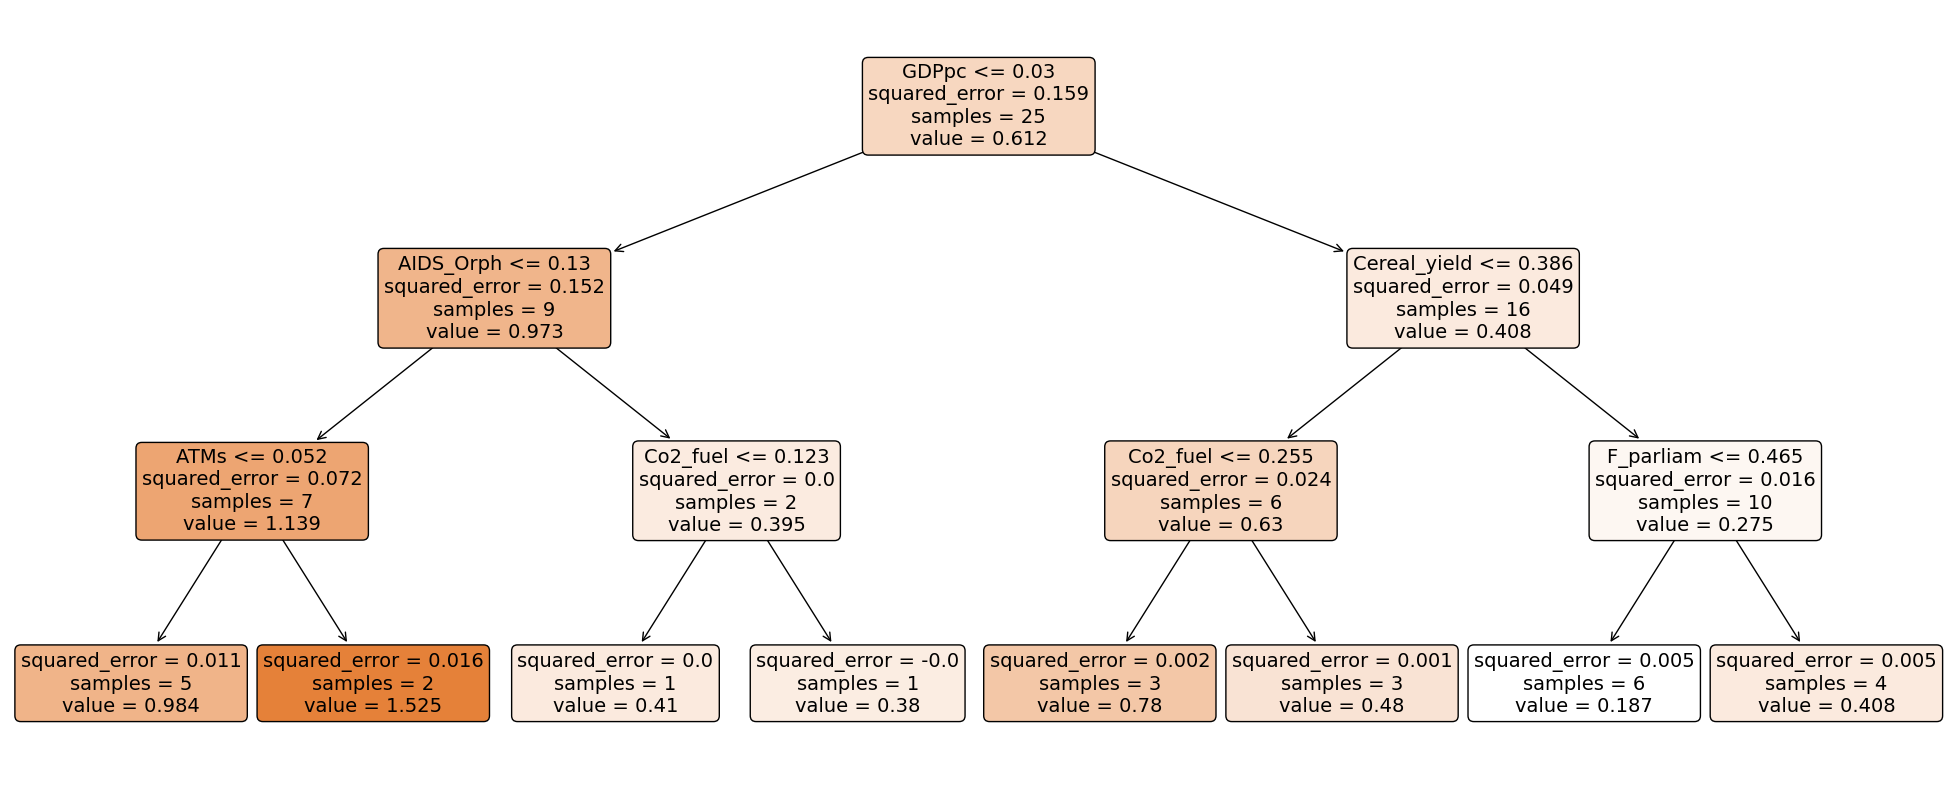

In [81]:
from sklearn import tree

plt.figure(figsize=(25, 10))
_ = tree.plot_tree(dtmodel16, feature_names = X16.columns,
                   filled = True, rounded = True, fontsize = 14)

In [82]:
# Output the DT model as plain text.
print(tree.export_text(dtmodel16, feature_names = list(X16.columns)))

|--- GDPpc <= 0.03
|   |--- AIDS_Orph <= 0.13
|   |   |--- ATMs <= 0.05
|   |   |   |--- value: [0.98]
|   |   |--- ATMs >  0.05
|   |   |   |--- value: [1.52]
|   |--- AIDS_Orph >  0.13
|   |   |--- Co2_fuel <= 0.12
|   |   |   |--- value: [0.41]
|   |   |--- Co2_fuel >  0.12
|   |   |   |--- value: [0.38]
|--- GDPpc >  0.03
|   |--- Cereal_yield <= 0.39
|   |   |--- Co2_fuel <= 0.25
|   |   |   |--- value: [0.78]
|   |   |--- Co2_fuel >  0.25
|   |   |   |--- value: [0.48]
|   |--- Cereal_yield >  0.39
|   |   |--- F_parliam <= 0.46
|   |   |   |--- value: [0.19]
|   |   |--- F_parliam >  0.46
|   |   |   |--- value: [0.41]



In [83]:
from sklearn.tree import DecisionTreeRegressor

# Construct the DT model with the optimal max_depth.
dtmodel18 = DecisionTreeRegressor(max_depth = 3)
dtmodel18.fit(X18, y18)

DecisionTreeRegressor(max_depth=3)

* Let's do the same and plot a tree plot for the 2018 model and represent the model as plain text as well.

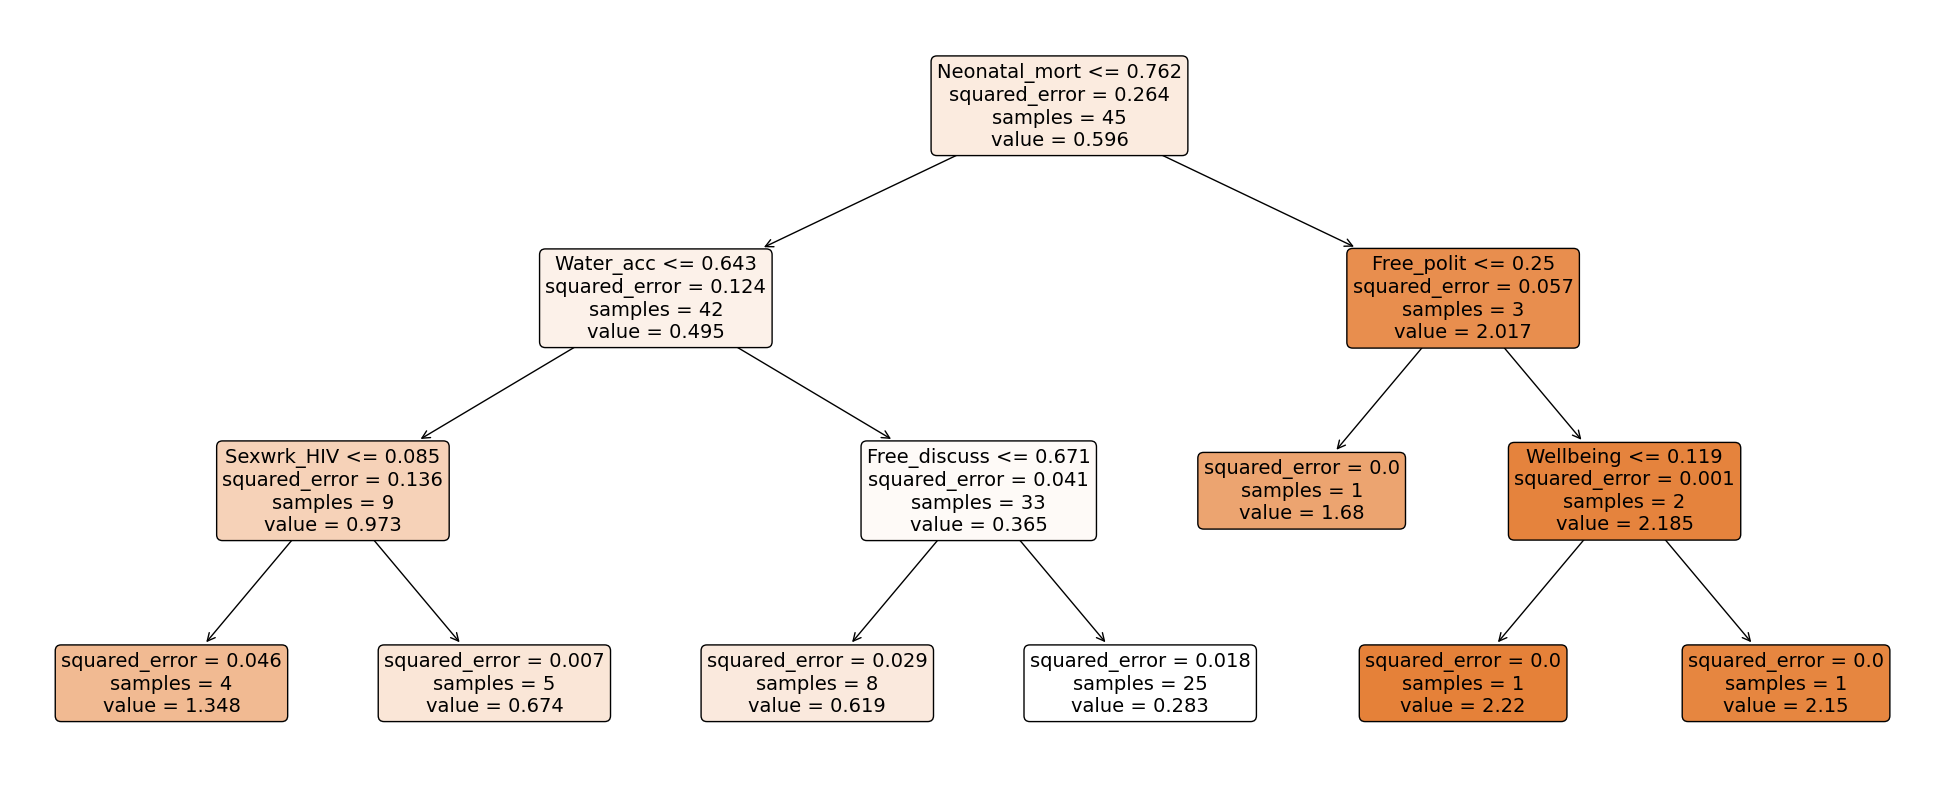

In [84]:
# Present graphically the decision tree for the predictions based on 2018 data.
from sklearn import tree

plt.figure(figsize=(25, 10))
_ = tree.plot_tree(dtmodel18, feature_names = X18.columns,
                   filled = True, rounded = True, fontsize = 14)

In [85]:
# Output the DT model as plain text.
print(tree.export_text(dtmodel18, feature_names = list(X18.columns)))

|--- Neonatal_mort <= 0.76
|   |--- Water_acc <= 0.64
|   |   |--- Sexwrk_HIV <= 0.08
|   |   |   |--- value: [1.35]
|   |   |--- Sexwrk_HIV >  0.08
|   |   |   |--- value: [0.67]
|   |--- Water_acc >  0.64
|   |   |--- Free_discuss <= 0.67
|   |   |   |--- value: [0.62]
|   |   |--- Free_discuss >  0.67
|   |   |   |--- value: [0.28]
|--- Neonatal_mort >  0.76
|   |--- Free_polit <= 0.25
|   |   |--- value: [1.68]
|   |--- Free_polit >  0.25
|   |   |--- Wellbeing <= 0.12
|   |   |   |--- value: [2.22]
|   |   |--- Wellbeing >  0.12
|   |   |   |--- value: [2.15]



* We can also plot a graphical representation of how far was the prediction of the tree from the actual observed data. 


* We will perform this graph for the `GDPpc` (most important variable - first separation variable of the 2016 tree) and the `Neonatal_mort` (most important variable for the 2018 tree). 

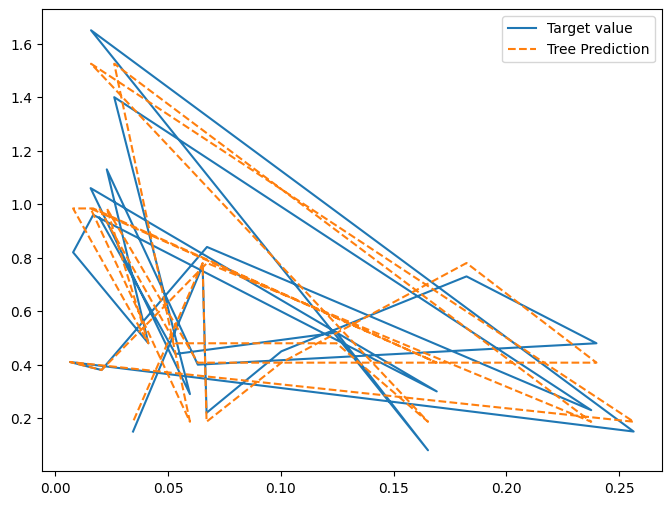

In [86]:
plt.figure(figsize=(8, 6))

y16_plt = dtmodel16.predict(X16)
plt.plot(X16['GDPpc'], y16, label ='Target value')
plt.plot(X16['GDPpc'], y16_plt, label = 'Tree Prediction', linestyle='--')
plt.legend(loc=1)
plt.show()

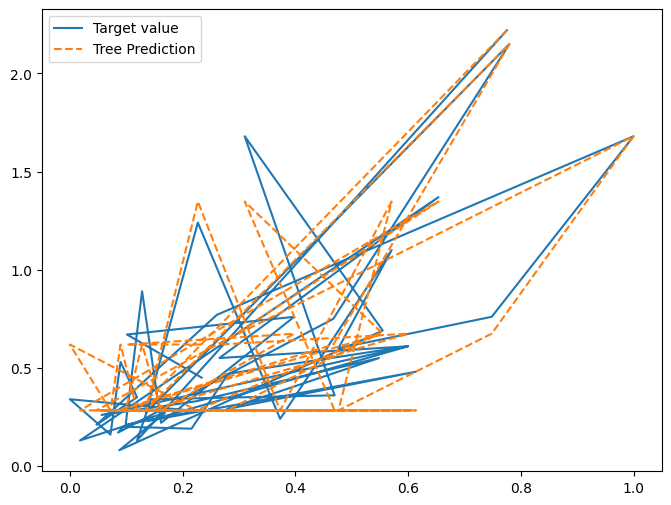

In [87]:
plt.figure(figsize=(8, 6))

y18_plt = dtmodel18.predict(X18)
plt.plot(X18['Neonatal_mort'], y18, label = 'Target value')
plt.plot(X18['Neonatal_mort'], y18_plt, label = 'Tree Prediction', linestyle='--')
plt.legend(loc=2)
plt.show()

### Mean Average Error (MAE) as the evaluation metric of decision tree models
---

We will use the Mean Average Error (MAE) as the evaluation metric between the two constructed models.

In [88]:
from sklearn import metrics

predicted_2016 = dtmodel16.predict(df_test_2016)
print(metrics.mean_absolute_error(y_test_2016, predicted_2016))

0.5271239092495636


In [89]:
from sklearn import metrics

predicted_2018 = dtmodel18.predict(df_test_2018)
print(metrics.mean_absolute_error(y_test_2018, predicted_2018))

0.35958168604651164


* As we can observe again the 2018 model is the better one with a MAE of **0.36**, while the 2016 one is **0.53**. 

* We need to point out also the fact that the 2018 Decision Tree model is the one with the lowest - so far - MAE.

### Random Forest models
---

Random Forest is a popular ensemble learning method for regression tasks that combines multiple decision trees to produce more accurate predictions. In Random Forest, each decision tree in the ensemble is built on a random subset of the features and the rows of the training data, which helps to reduce overfitting and increase the generalizability of the model.

To evaluate the performance of Random Forest models, we will use Mean Absolute Error (MAE), which measures the average absolute difference between the actual and predicted values of the target variable. The lower the MAE, the better the model's performance.

We will start with the 2016 data and we will construct the Random Forest models to try to find the best combination of parameters and then we will move forward to 2018 Random Forest models.

We initially create the random forest model with 40 estimators (trees) and default internal split nodes for the group year 2016.

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 40, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16, y16)

rf_model16

RandomForestRegressor(max_depth=6, n_estimators=40, random_state=5555)

In [91]:
# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.3285604057591623


* The random forest model with 40 estimators (trees) and default internal split nodes for the group year 2016 has a MAE of **0.33**.


* We will try different combination for possible further improvements.

In [92]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 80, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.32806675236848654


* The random forest model with 80 estimators (trees) and default internal split nodes for the group year 2016 has a MAE of **0.328**.

In [93]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 60, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.33355828762569595


* The random forest model with 60 estimators (trees) and default internal split nodes for the group year 2016 has a MAE of **0.3335**. 

* Thus we will not try with more the 60 estimators. 

In [94]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 42, max_depth = 7, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.3235392254633092


* Now we will try to modify the min_samples_split, subset for internal splits of the internal nodes of the trees in order to see improvement of the current model's performance.

In [95]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 42, max_depth = 7, min_samples_split = 10, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.3177073937209831


* We see an impovment, thus we will continue with different values, until to reach the best model for the 2016 year group.

In [96]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 42, max_depth = 7, min_samples_split = 11, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.3157878600425969


* From our tries this combination led to the best results. 


* Thus for the 2016 data the random forest model with 42 estimators (trees),  min_samples_split = 11, and max depth = 7 for the group year 2016 has a MAE of **0.31**. 


* This model is the best among the 5 presented so far in the current question.


* We move forward with the 2018 Random Forest model.

In [97]:
# 2018
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 42, max_depth = 7, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3387252830072598


* The random forest model with 40 estimators (trees) and default internal split nodes and max depth of 7 for the group year 2018 has a MAE of **0.3387**. 


* We will continue the searching for the best model.

In [98]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 24, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.34191685123661864


* The random forest model with 24 estimators (trees) and default internal split nodes and max depth of 6 for the group year 2018 has a MAE of **0.3419**. 


* Now we will try to modify the min_samples_split, subset for internal splits of the internal nodes of the trees in order to see improvement of the current model's performance.

In [99]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 24, max_depth = 6, min_samples_split = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.33459170627230217


* No improvement in this case, thus the best model regarding the 2018 data is the random forest model with 24 estimators (trees) and default internal split nodes and max depth of 6 for the group year 2018 has a MAE of **0.33**. 


* Therefore, the best model of the question 2 is the random forest model with 42 estimators (trees),  min_samples_split = 11, and max depth = 7 for the group year 2016 has a MAE of **0.315**. 

### Features importance for the 2016 and 2018 data
---

In this section we are going to find the more important feautures of the models of the 2016 and 2018 data. 

Then, we will create a plot that will depict the findings.

In [100]:
rf16 = RandomForestRegressor(n_estimators = 42, max_depth = 7, min_samples_split = 11, random_state = 5555)
rf16.fit(X16, y16)

importances16 = rf16.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf16.estimators_], axis = 0)
indices = np.argsort(importances16)[::-1]

print("Features Importance 2016:\n")

# Print through a for-loop.
for f in range(X16.shape[1]):
    print("%d. Index %d %s (%f)" % (f + 1, indices[f], X16.columns[indices[f]], importances16[indices[f]]))

Features Importance 2016:

1. Index 25 M_school (0.108605)
2. Index 53 CPI (0.088096)
3. Index 38 Internet_use (0.083320)
4. Index 12 Wasting_u5s (0.069733)
5. Index 57 Property_rights (0.060887)
6. Index 80 Sexwrk_Syphilis (0.053700)
7. Index 9 Cereal_yield (0.050793)
8. Index 47 Ocean_protect (0.049315)
9. Index 36 Unemploy (0.047619)
10. Index 20 Literacy_15_24yrs (0.047619)
11. Index 5 GDPpc (0.046161)
12. Index 24 F_school (0.043934)
13. Index 51 Forest_change (0.042239)
14. Index 43 Climate_chg_vuln (0.041801)
15. Index 39 Broadband (0.040645)
16. Index 56 Prison_pop (0.039293)
17. Index 45 Ocean_biodiv (0.034687)
18. Index 34 ATMs (0.018996)
19. Index 88 Freemv_dom (0.005155)
20. Index 30 Co2_fuel (0.005125)
21. Index 18 Infant_mort (0.005118)
22. Index 23 Lack_contraception (0.003882)
23. Index 21 Primary_school (0.003600)
24. Index 52 Species_survival (0.003517)
25. Index 40 Inequality (0.003139)
26. Index 28 Sanitation (0.001588)
27. Index 13 Life_expect (0.001432)
28. Index 

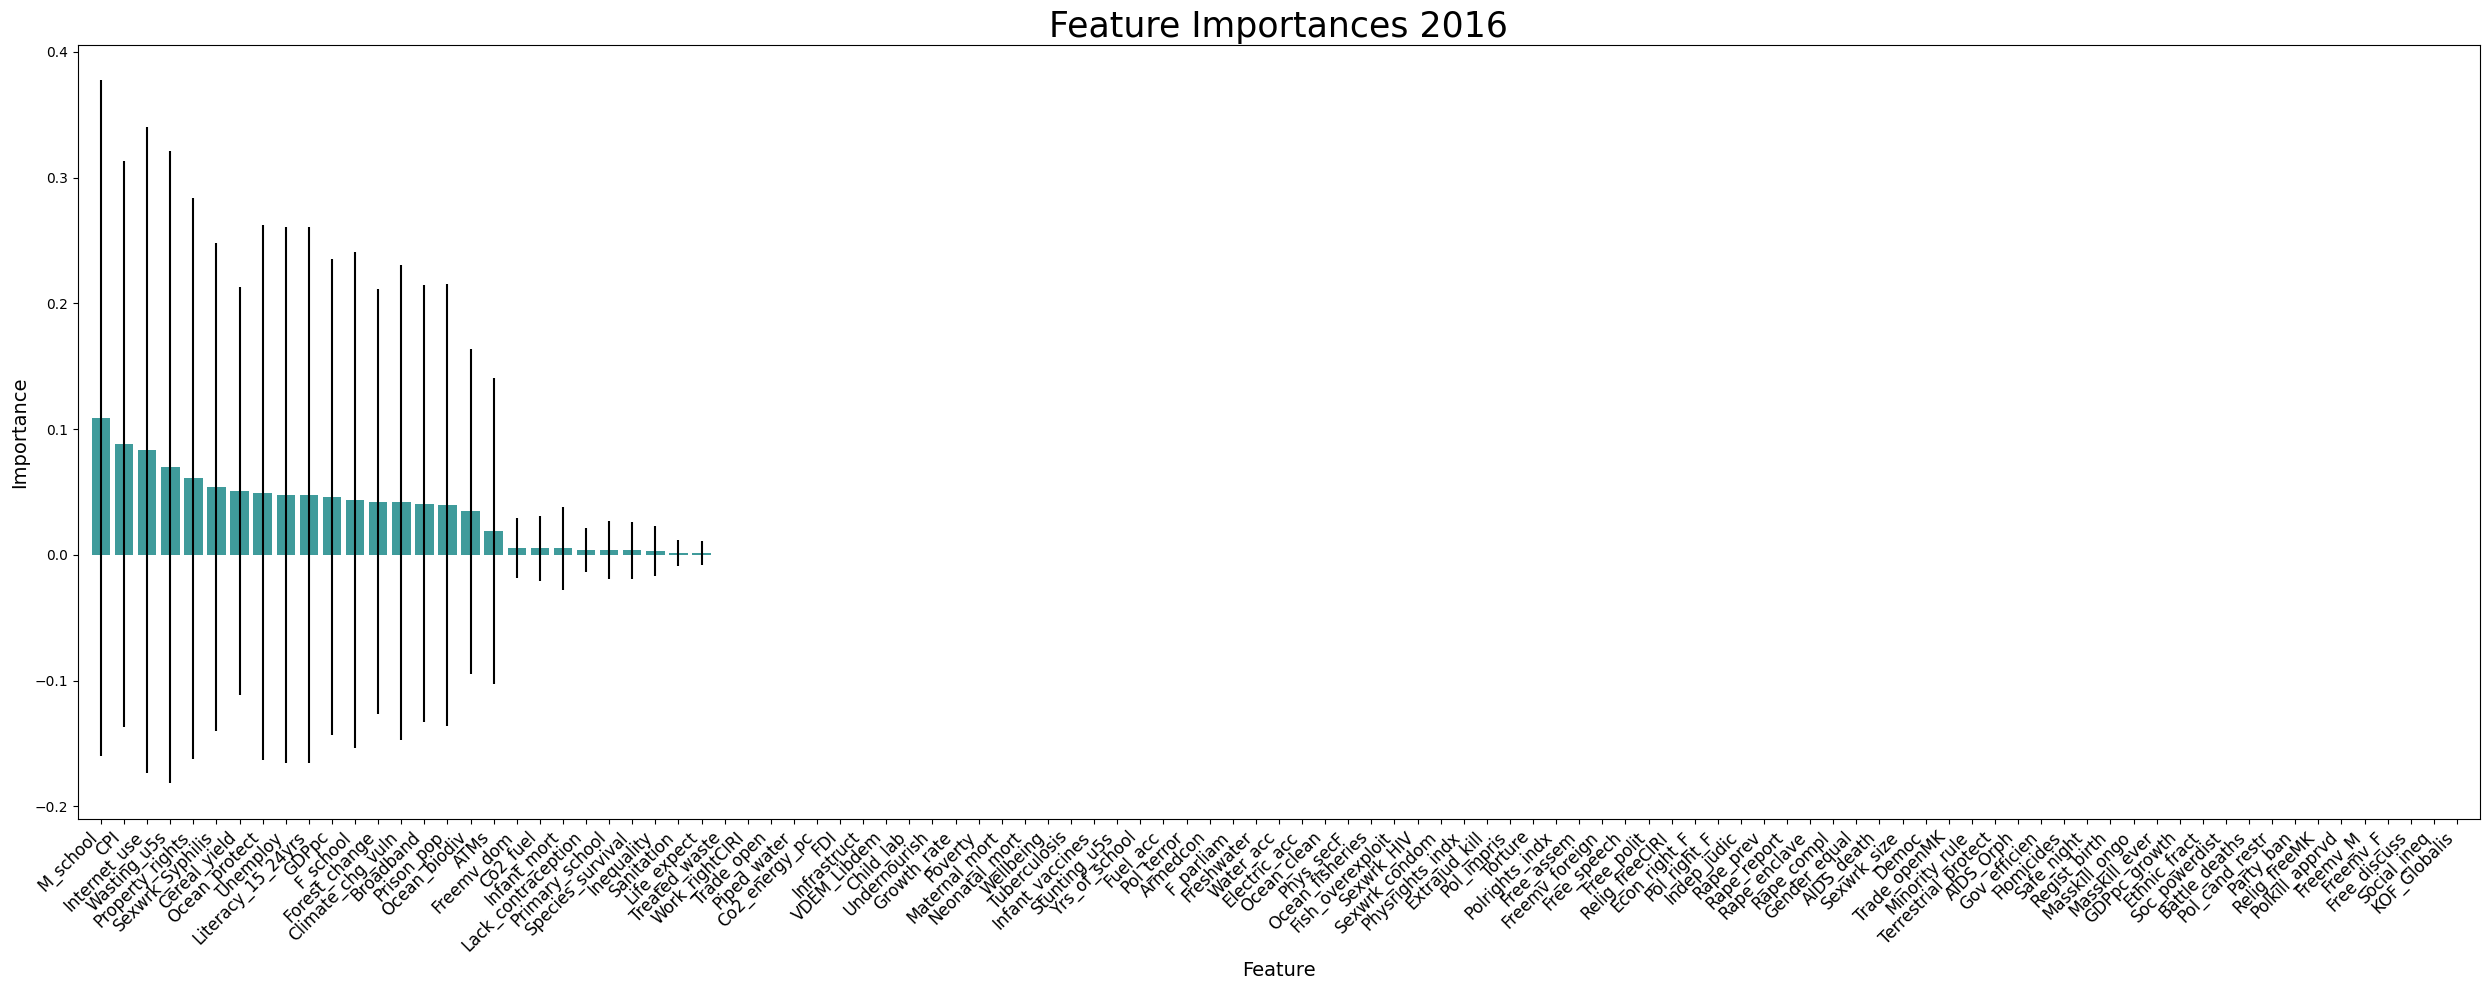

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.title("Feature Importances 2016", fontsize = 25)
plt.bar(range(X16.shape[1]), importances16[indices],
        tick_label=[X16.columns[x] for x in indices],
        color="#3f9b9b", yerr=std[indices], align="center")
plt.xlim([-1, X16.shape[1]])
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [102]:
rf18 = RandomForestRegressor(n_estimators = 24, max_depth = 6, random_state = 5555)
rf18.fit(X18, y18)

importances18 = rf18.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf16.estimators_], axis = 0)
indices = np.argsort(importances18)[::-1]

print("Features Importance 2018:\n")

# Print through a for-loop.
for f in range(X18.shape[1]):
    print("%d. Index %d %s (%f)" % (f + 1, indices[f], X18.columns[indices[f]], importances18[indices[f]]))

Features Importance 2018:

1. Index 15 Neonatal_mort (0.243702)
2. Index 38 Internet_use (0.100111)
3. Index 17 Tuberculosis (0.099915)
4. Index 22 Yrs_of_school (0.061491)
5. Index 34 ATMs (0.058272)
6. Index 41 Piped_water (0.056626)
7. Index 24 F_school (0.039564)
8. Index 30 Co2_fuel (0.035895)
9. Index 56 Prison_pop (0.034446)
10. Index 16 Wellbeing (0.030556)
11. Index 45 Ocean_biodiv (0.027127)
12. Index 32 Fuel_acc (0.019895)
13. Index 51 Forest_change (0.017808)
14. Index 8 Poverty (0.016306)
15. Index 57 Property_rights (0.016212)
16. Index 25 M_school (0.015994)
17. Index 65 Battle_deaths (0.013889)
18. Index 20 Literacy_15_24yrs (0.006832)
19. Index 4 VDEM_Libdem (0.006542)
20. Index 80 Sexwrk_Syphilis (0.005787)
21. Index 82 Extrajud_kill (0.005059)
22. Index 55 Homicides (0.004960)
23. Index 96 Rape_report (0.004686)
24. Index 26 F_parliam (0.004654)
25. Index 83 Pol_impris (0.004086)
26. Index 27 Freshwater (0.003441)
27. Index 67 Party_ban (0.003104)
28. Index 100 AIDS_

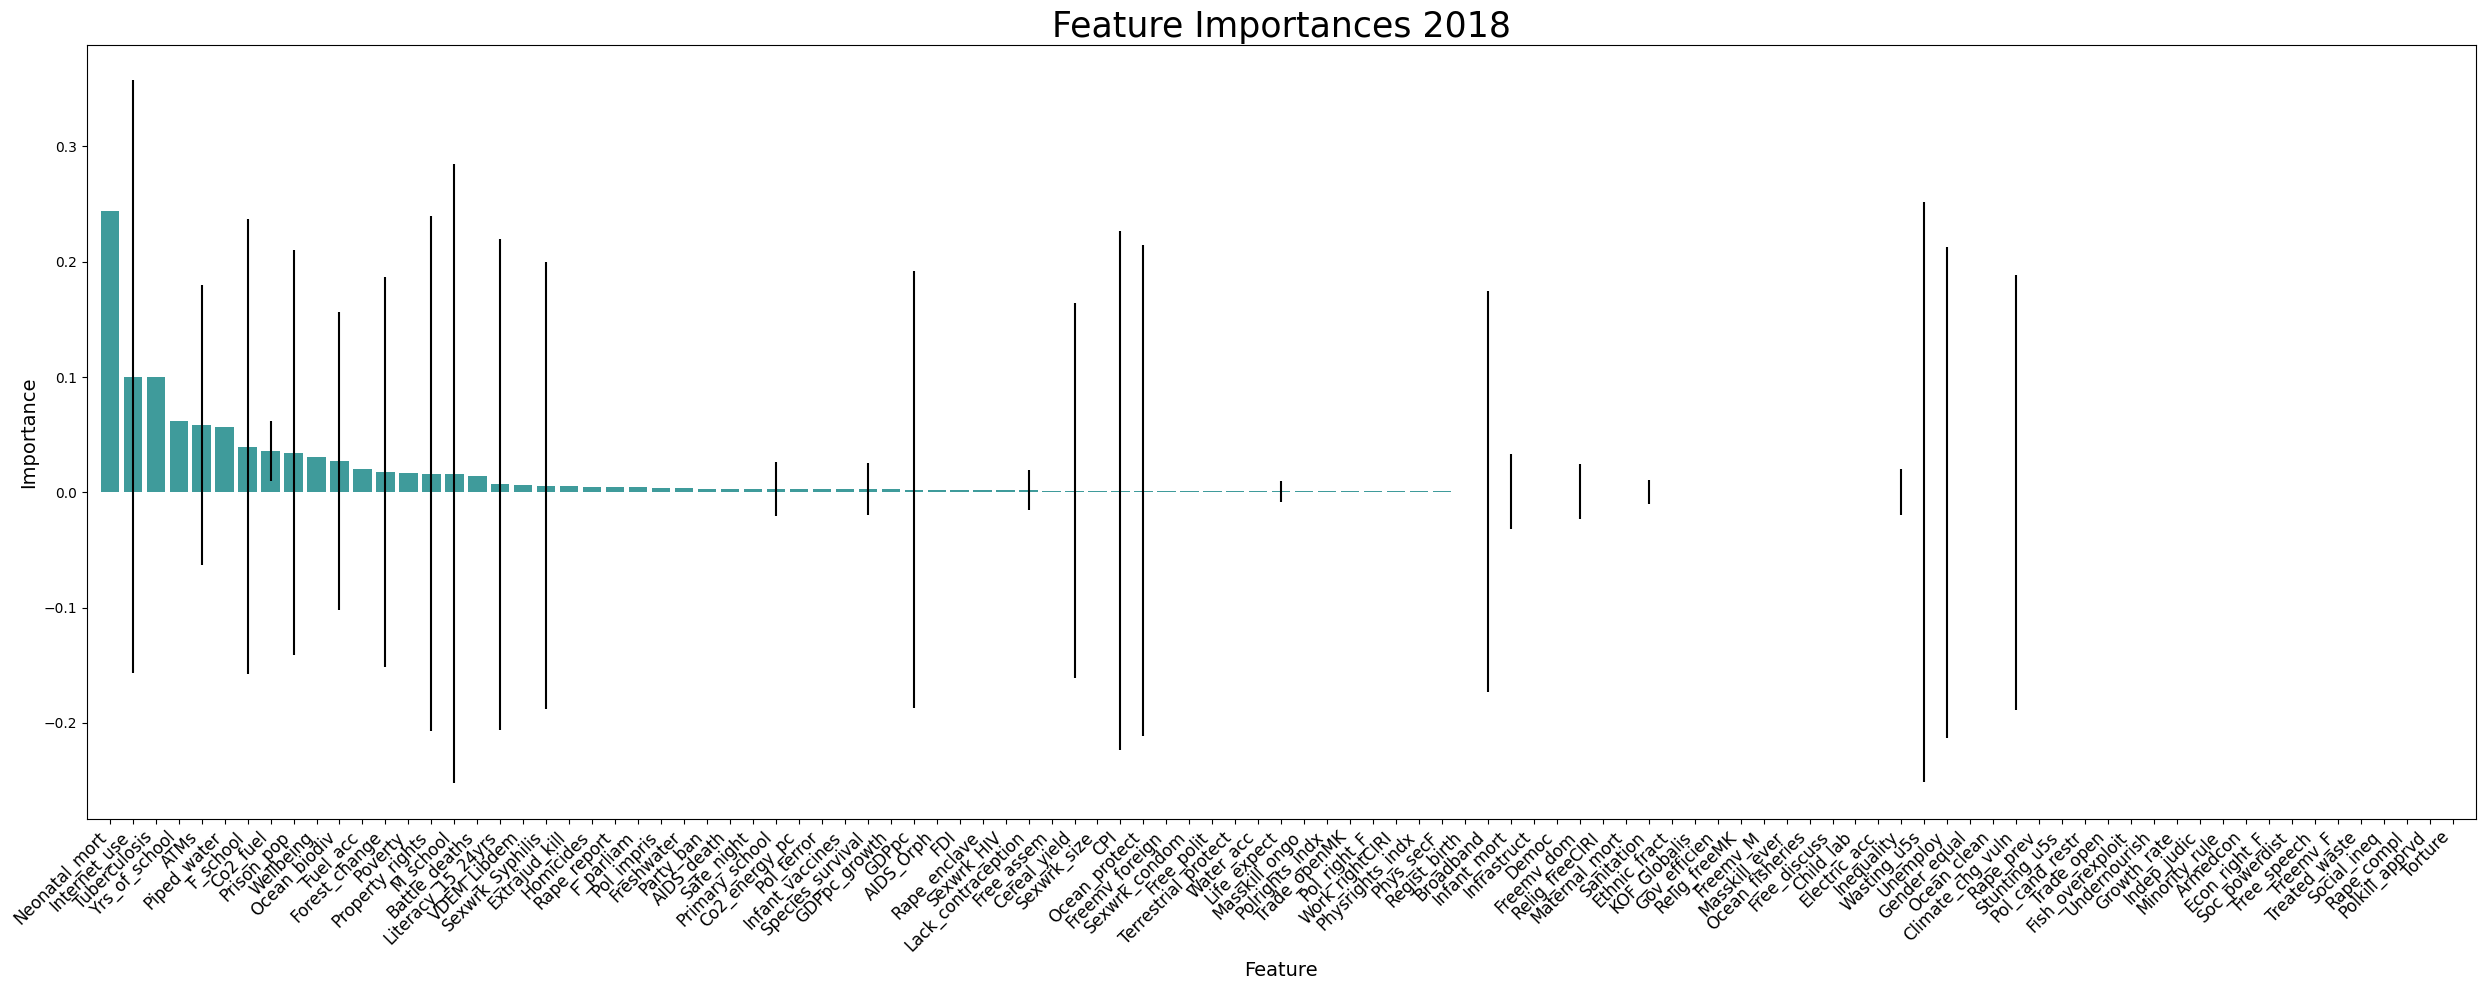

In [103]:
plt.figure(figsize=(25, 10))
plt.title("Feature Importances 2018", fontsize = 25)
plt.bar(range(X18.shape[1]), importances18[indices],
        tick_label=[X18.columns[x] for x in indices],
        color="#3f9b9b", yerr=std[indices], align="center")
plt.xlim([-1, X18.shape[1]])
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

* As we can see the two models have different features as their more significant variables.


* To be more precise, the 2018 random forest model outputs as the more significant variables the: `Neonatal_mort`, `Internet_use`, and `Tuberculosis`, while the 2016 one - which is the best model of the question 2 - has the followings: `Ocean_protect`, `CPI`, and `Property_rights`.


* After this extended research we conclude the question 2 and we are ready to move forward to the next question of the assignment.

---
## Question 3: Slavery Estimation with Theory-based Features

---

The researchers in Question 2 utilized the full model with the 106 features. In this question the initial 106 features were reduced to a subset of 35 features to train the models. The models will be trained using the reduced feature set, and the evaluation was performed using the Out of Sample data and through the MAE (Mean Absolute Error), which is a metric used to evaluate the accuracy of a regression model.

Upon analyzing the results, it was observed that some features were more important than others in predicting slavery prevalence. The feature importance can be used to determine which features have the most impact on the model's performance.

Through our investigation we found out that these 35 variables are the followings:

'KOF_Globalis', 'Work_rightCIRI', 'Trade_open', 'GDPpc',
'Armedcon', 'Poverty', 'Stunting_u5s', 'Undernourish', 'Wasting_u5s', 'Maternal_mort',
'Neonatal_mort', 'Literacy_15_24yrs', 'F_school', 'ATMs', 'Child_lab', 'Unemploy', 'Infrastruct',
'Internet_use', 'Broadband', 'Climate_chg_vuln', 'CPI', 'Minority_rule', 'Freemv_M',
'Freemv_F', 'Free_discuss', 'Soc_powerdist', 'Democ',
'Sexwrk_condom', 'Sexwrk_Syphilis', 'AIDS_Orph', 'Rape_report',
'Rape_enclave', 'Phys_secF', 'Gender_equal'.

These variables found at the paper's Github and more specifically at the [Rashomon_Variable_Importance.py](https://github.com/ml-slavery/ml-slavery/blob/main/Rashomon_Variable_Importance.py).

In [104]:
# The important features as the authors define them.
keep_vars = ['KOF_Globalis','Work_rightCIRI','Trade_open','GDPpc', 'Armedcon','Poverty', 
             'Stunting_u5s','Undernourish','Wasting_u5s','Maternal_mort', 'Neonatal_mort',
             'Literacy_15_24yrs','F_school','ATMs','Child_lab','Unemploy','Infrastruct',
             'Internet_use','Broadband','Climate_chg_vuln','CPI','Minority_rule','Freemv_M',
             'Freemv_F','Free_discuss','Soc_powerdist','Democ', 'Sexwrk_condom','Sexwrk_Syphilis',
             'AIDS_Orph','Rape_report','Rape_enclave','Phys_secF','Gender_equal']

# Print the length of the keep_vars.
len(keep_vars)

34

* As we can see there are 34 variables, thus we assume that the 35th variable/important feature was referring to the response variable and whole dataframe had a length of 35 variables (34 covariates and the response).


* The first step we need to do, is to validate that all these 34 feautures are contained in the train and test dataframes. We the following code command we are going to check this issue.

In [105]:
# Train 2016.

# Store the variables names array.
missing_features = []

# Validate through a for-loop statement.
for i in keep_vars:
    
    if i not in X16.columns:
        
        print(i, ' is not in the 2016 train dataframe.')
        missing_features.append(i)
    
missing_features

[]

In [106]:
# Test 2016.

# Store the variables names array.
missing_features = []

# Validate through a for-loop statement.
for i in keep_vars:
    
    if i not in df_test_2016.columns:
        
        print(i, ' is not in the 2016 train dataframe.')
        missing_features.append(i)
    
missing_features

[]

In [107]:
# Train 2018.

# Store the variables names array.
missing_features = []

# Validate through a for-loop statement.
for i in keep_vars:
    
    if i not in X18.columns:
        
        print(i, ' is not in the 2016 train dataframe.')
        missing_features.append(i)
    
missing_features

[]

In [108]:
# Test 2018.

# Store the variables names array.
missing_features = []

# Validate through a for-loop statement.
for i in keep_vars:
    
    if i not in df_test_2018.columns:
        
        print(i, ' is not in the 2016 train dataframe.')
        missing_features.append(i)
    
missing_features

[]

* After all four comparisons, we can see that there are **no missing feature** in the train and test dataframe of both year groups.


* Now, we are going to keep only the 34 features, that was mentioned by the researchers, to all four dataframes (train and test for the two year groups).

In [109]:
# Train 2016.
X16_q3 = X16[keep_vars]

# Preview the results.
X16_q3

KOF_Globalis  Work_rightCIRI  Trade_open     GDPpc  Armedcon   Poverty  \
3       0.152750             0.0    0.059508  0.019589       1.0  0.565561   
4       0.420118             0.5    0.123230  0.053336       0.0  0.099767   
5       0.386807             0.0    0.263901  0.124709       0.0  0.236331   
7       0.461758             0.5    0.013297  0.165244       0.0  0.063099   
8       0.423406             0.0    0.366892  0.015904       0.0  0.079684   
11      0.845058             0.5    0.120156  0.256400       0.0  0.000000   
17      0.111769             0.0    0.051081  0.006594       1.0  0.434569   
20      0.492220             0.5    0.236997  0.020559       0.0  0.325862   
22      0.537366             0.0    0.090765  0.067300       0.0  0.149391   
26      0.976551             0.5    0.512088  0.237587       0.0  0.000000   
28      0.495507             0.5    0.067797  0.026183       1.0  0.275330   
30      0.534736             0.0    0.057747  0.059736       0.0  0.206012   
36      0.263642             0.5    0.275644  0.015710       0.0  0.141358   
38      0.721455             0.5    0.191683  0.169123       0.0  0.034724   
42      0.109577             0.5    0.063342  0.016874       1.0  0.341290   
44      0.196800             0.5    0.097258  0.007952       0.0  0.193703   
46      0.346702             0.0    0.000000  0.041311       1.0  0.692796   
48      0.327854             0.0    0.015853  0.022886       1.0  0.107541   
50      0.622398             0.5    0.152587  0.063227       1.0  0.169863   
52      0.934254             1.0    0.275437  0.239915       0.0  0.000000   
55      0.738988             0.0    0.088105  0.182312       1.0  0.000000   
59      0.686391             0.5    0.138392  0.100272       0.0  0.214563   
61      0.445979             0.5    0.101160  0.067106       0.0  0.021897   
64      0.629630             0.5    0.244249  0.065361       0.0  0.025784   
68      0.563226             0.0    0.566312  0.034523       0.0  0.041850   

    Stunting_u5s  Undernourish  Wasting_u5s  Maternal_mort  ...  Free_discuss  \
3       0.742424      0.291595     0.663507       0.213317  ...      0.459313   
4       0.352814      0.282022     0.061611       0.250308  ...      0.767170   
5       0.640693      0.439020     0.327014       0.155364  ...      0.944212   
7       0.114719      0.073330     0.061611       0.050555  ...      0.877635   
8       0.662338      0.249473     0.440758       0.194821  ...      0.098874   
11      0.000000      0.073330     0.000000       0.023428  ...      1.000000   
17      0.835498      0.590274     0.398104       0.431566  ...      0.374910   
20      0.367965      0.073330     0.208531       0.389642  ...      0.898071   
22      1.000000      0.276278     0.037915       0.104809  ...      0.765881   
26      0.076775      0.000000     0.107773       0.017263  ...      0.874908   
28      0.798701      0.268620     0.701422       0.210851  ...      0.717632   
30      0.748918      0.123109     0.625592       0.151665  ...      0.776715   
36      0.437229      0.084817     0.535545       0.738594  ...      0.578396   
38      0.255411      0.073330     0.061611       0.043157  ...      0.849010   
42      0.720779      0.249473     0.360190       0.215783  ...      0.589227   
44      0.770563      0.126939     0.521327       0.314427  ...      0.759525   
46      0.673160      0.111622     0.360190       1.000000  ...      0.821221   
48      0.935065      0.398813     0.483412       0.215783  ...      0.545639   
50      0.616883      0.236071     0.360190       0.136868  ...      0.629830   
52      0.076407      0.000000     0.157678       0.000000  ...      0.845474   
55      0.212641      0.000000     0.207204       0.027127  ...      0.522797   
59      0.478355      0.073330     0.208531       0.166461  ...      0.823474   
61      0.279221      0.398813     1.000000       0.033292  ...      0.851208   
64      0.179654      0.073330 

In [110]:
# Test 2016.
df_test_2016_q3 = df_test_2016[keep_vars]

# Preview the results.
df_test_2016_q3

KOF_Globalis  Work_rightCIRI  Trade_open     GDPpc  Armedcon   Poverty  \
0        0.133672        0.987342    0.068694  0.001485       1.0  0.402326   
1        0.599967        0.987342    0.142411  0.020771       0.0  0.012326   
3        0.433000        0.974684    0.091149  0.019813       1.0  0.003488   
5        0.103822        0.974684    0.381537  0.061602       0.0  0.008140   
7        0.265540        0.987342    0.344665  0.199237       0.0  0.000000   
..            ...             ...         ...       ...       ...       ...   
353      0.238806        0.974684    0.020065  0.012380       0.0  0.111628   
355      0.370674        0.974684    0.283845  0.085096       0.0  0.000000   
357      0.373790        0.974684    0.154874  0.020690       0.0  0.000000   
359      0.302608        0.974684    0.040891  0.004681       1.0  1.000000   
361      0.444317        0.987342    0.140103  0.005439       0.0  0.749186   

     Stunting_u5s  Undernourish  Wasting_u5s  Maternal_mort  ...  \
0        0.711304      0.446282     0.418502       0.289609  ...   
1        0.401739      0.064949     0.414097       0.019160  ...   
3        0.203478      0.066690     0.180617       0.100958  ...   
5        0.438261      0.059725     0.414097       0.017686  ...   
7        0.045217      0.000522     0.030837       0.014738  ...   
..            ...           ...          ...            ...  ...   
353      0.340870      0.089326     0.198238       0.024318  ...   
355      0.233043      0.066690     0.180617       0.067797  ...   
357      0.400000      0.035347     0.290749       0.035372  ...   
359      0.808696      0.434094     0.718062       0.281503  ...   
361      0.695652      0.811945     0.277533       0.162859  ...   

     Free_discuss  Soc_powerdist  Democ  Sexwrk_condom  Sexwrk_Syphilis  \
0        0.571932            1.0    0.0       0.438007         0.007648   
1        0.914552            0.0    1.0       0.729664         0.139579   
3        0.747060            1.0    0.0       0.597914         0.175908   
5        0.844702            0.0    1.0       0.924681         0.053537   
7        0.543292            1.0    0.0       0.516802         0.066922   
..            ...            ...    ...            ...              ...   
353      0.340295            1.0    0.0       0.440324         0.000000   
355      0.439184            1.0    0.0       0.672074         0.043977   
357      0.439184            1.0    0.0       0.885168         0.043977   
359      0.185758            1.0    0.0       0.245423         0.057361   
361      0.749451            0.0    1.0       0.750869         0.363289   

     AIDS_Orph  Rape_report  Rape_enclave  Phys_secF  Gender_equal  
0     0.004092     1.000000           1.0   1.000000      0.285714  
1     0.001819     0.666667           0.0   0.666667      0.142857  
3     0.001091     0.333333           0.0   1.000000      0.714286  
5     0.006001     1.000000           0.0   1.000000      0.000000  
7     0.002546     0.666667           0.0   1.000000      0.000000  
..         ...          ...           ...        ...           ...  
353   0.014366     0.666667           0.0   1.000000      0.428571  
355   0.005183     0.333333           0.0   0.666667      0.571429  
357   0.007274     0.333333           0.0   0.666667      0.285714  
359   0.002546     1.000000           1.0   1.000000      0.571429  
361   0.481724     0.666667           0.5   0.666667      0.285714  

[191 rows x 34 columns]

In [111]:
# Train 2018.
X18_q3 = X18[keep_vars]

# Preview the results.
X18_q3

KOF_Globalis  Work_rightCIRI  Trade_open     GDPpc  Armedcon   Poverty  \
0       0.000000             0.5    0.121572  0.004849       1.0  0.398660   
1       0.535832             0.5    0.018650  0.225950       0.0  0.000000   
2       0.625027             0.5    0.190647  0.066912       0.0  0.031614   
6       0.393382             0.0    0.263901  0.124709       0.0  0.236331   
9       0.396669             0.0    0.366892  0.015904       0.0  0.079684   
10      0.208416             0.0    0.073496  0.020946       1.0  0.379243   
12      0.779531             0.5    0.120156  0.256400       0.0  0.000000   
13      0.506465             0.5    0.054397  0.116175       1.0  0.079295   
14      0.982687             0.5    0.452027  0.333980       0.0  0.000000   
15      0.056323             0.5    0.134247  0.002133       1.0  1.000000   
16      0.488714             0.0    0.032120  0.059930       1.0  0.104820   
18      0.086347             0.0    0.051081  0.006594       1.0  0.434569   
19      0.743590             0.0    0.283933  0.068076       0.0  0.148873   
21      0.378260             0.5    0.236997  0.020559       0.0  0.325862   
23      0.539119             0.0    0.090765  0.067300       0.0  0.149391   
24      0.191979             0.0    0.181737  0.008922       0.0  0.698497   
25      0.507123             0.0    0.275506  0.035493       0.0  0.245271   
27      1.000000             0.5    0.512088  0.237587       0.0  0.000000   
29      0.398860             0.5    0.067797  0.026183       1.0  0.275330   
31      0.514355             0.0    0.057747  0.059736       0.0  0.206012   
32      0.783257             0.0    0.243835  0.069822       1.0  0.001684   
33      0.807583             0.5    0.340091  0.276377       0.0  0.000000   
34      0.581635             0.0    0.179215  0.148565       0.0  0.047366   
35      0.168091             0.5    0.197520  0.000000       0.0  0.918761   
37      0.274600             0.5    0.275644  0.015710       0.0  0.141358   
39      0.698882             0.5    0.191683  0.169123       0.0  0.034724   
40      0.559281             0.5    0.258755  0.063421       0.0  0.004924   
41      0.623274             0.5    0.206189  0.049069       0.0  0.040425   
43      0.026956             0.5    0.063342  0.016874       1.0  0.341290   
45      0.153846             0.5    0.097258  0.007952       0.0  0.193703   
47      0.358536             0.0    0.000000  0.041311       1.0  0.692796   
49      0.287749             0.0    0.015853  0.022886       1.0  0.107541   
51      0.559062             0.5    0.152587  0.063227       1.0  0.169863   
53      0.879904             1.0    0.275437  0.239915       0.0  0.000000   
54      0.861495             0.5    0.217068  0.177657       0.0  0.000000   
56      0.668201             0.0    0.088105  0.182312       1.0  0.000000   
57      0.804515             0.5    0.299717  0.096780       0.0  0.001296   
58      0.908174             0.5    1.000000  1.000000       0.0  0.000000   
60      0.658777             0.5    0.138392  0.100272       0.0  0.214563   
62      0.348017             0.5    0.101160  0.067106       0.0  0.021897   
63      0.648258             0.0    0.348622  0.103181       1.0  0.000777   
65      0.576156             0.5    0.244249  0.065361       0.0  0.025784   
66      0.308788             0.0    0.091524  0.006012       1.0  0.430682   
67      0.701950             0.0    0.290426  0.038596       1.0  0.000000   
69      0.463073             0.0    0.566312  0.034523       0.0  0.041850   

    Stunting_u5s  Undernourish  Wasting_u5s  Maternal_mort  ...  Free_discuss  \
0       0.846320      0.490714     0.436019       0.484587  ...      0.491216   
1       0.138528      0.073330     0.042654       0.060419  ...      0.979599   
2       0.411255      0.088646     0.184834       0.027127  ...      0.876364   
6       0.640693      0.439020     0.327014       0.155364  ...      0.944212   
9       0.

In [112]:
# Test 2018.
df_test_2018_q3 = df_test_2018[keep_vars]

# Preview the results.
df_test_2018_q3

KOF_Globalis  Work_rightCIRI  Trade_open     GDPpc  Armedcon   Poverty  \
2        0.609316        0.987342    0.148575  0.026943       0.0  0.004651   
4        0.433820        0.974684    0.096660  0.020720       1.0  0.003488   
6        0.468591        0.987342    0.396090  0.060360       0.0  0.008140   
8        0.271445        0.987342    0.961553  0.225148       0.0  0.000000   
10       0.182877        0.974684    0.081184  0.017041       0.0  0.354651   
..            ...             ...         ...       ...       ...       ...   
354      0.277842        0.974684    0.123513  0.006797       0.0  0.111628   
356      0.381827        0.974684    0.238148  0.085096       0.0  0.180233   
358      0.363949        0.987342    0.157562  0.021091       0.0  0.000000   
360      0.316057        0.974684    0.066902  0.003627       1.0  1.000000   
362      0.438904        0.987342    0.144719  0.006838       0.0  0.623256   

     Stunting_u5s  Undernourish  Wasting_u5s  Maternal_mort  ...  \
2        0.401739      0.064949     0.414097       0.019160  ...   
4        0.203478      0.059725     0.180617       0.100958  ...   
6        0.045217      0.052760     0.162996       0.018423  ...   
8        0.045217      0.000522     0.030837       0.002211  ...   
10       0.507826      0.223402     0.361233       0.349300  ...   
..            ...           ...          ...            ...  ...   
354      0.340870      0.089326     0.198238       0.024318  ...   
356      0.233043      0.205990     0.180617       0.067797  ...   
358      0.808696      0.035347     0.189427       0.035372  ...   
360      0.813913      0.481107     0.713656       0.281503  ...   
362      0.695652      0.778861     0.277533       0.162859  ...   

     Free_discuss  Soc_powerdist  Democ  Sexwrk_condom  Sexwrk_Syphilis  \
2        0.914552            0.0    1.0       0.729664         0.013384   
4        0.747060            1.0    0.0       0.597914         0.175908   
6        0.782851            1.0    1.0       0.729664         0.057361   
8        0.987269            0.0    1.0       0.967555         0.000000   
10       0.546606            1.0    0.0       0.672074         0.057361   
..            ...            ...    ...            ...              ...   
354      0.340295            1.0    0.0       0.440324         0.021033   
356      0.439184            1.0    0.0       0.537659         0.057361   
358      0.401970            1.0    0.0       0.819235         0.078394   
360      0.185758            1.0    0.0       0.245423         0.173996   
362      0.749451            0.0    1.0       0.750869         0.363289   

     AIDS_Orph  Rape_report  Rape_enclave  Phys_secF  Gender_equal  
2     0.003637     0.666667           0.0   0.666667      0.142857  
4     0.001182     0.333333           0.0   0.666667      0.714286  
6     0.005092     1.000000           0.0   1.000000      0.714286  
8     0.003455     0.666667           0.0   1.000000      0.714286  
10    0.145299     0.666667           0.0   0.666667      0.571429  
..         ...          ...           ...        ...           ...  
354   0.016185     0.666667           0.0   0.666667      0.428571  
356   0.024368     0.666667           0.0   1.000000      0.428571  
358   0.006638     0.666667           0.0   0.666667      0.000000  
360   0.003455     1.000000           1.0   1.000000      0.571429  
362   0.427169     0.666667           0.5   0.666667      0.285714  

[172 rows x 34 columns]

### Ridge/Lasso Regression Linear Model with the Theory-based Features
---

Since we can create our four dataframes, that contain only the 34 important theory-based features and the response variables for each year group, we can now move forward and construct our linear regression models.

The first step is to find the optimal regularization parameter, a for each year group. 

In [113]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

# Set up the K-Fold CV (10fold CV).
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)

# Create a list of alpha values to find the best one for the data.
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]

# Loop through each alpha value and calculate the validation score to select the best one.
validation_scores = []
for alpha in alpha_values:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, X16_q3, y16, cv = cv, scoring = 'neg_mean_squared_error')
    validation_scores.append(-1 * scores.mean())

# Select the alpha value with the highest validation score.
best_alpha16 = alpha_values[validation_scores.index(max(validation_scores))]

# Output the best alpha.
best_alpha16

0

In [114]:
# Set up the K-Fold CV (10fold CV).
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)

# Create a list of alpha values to find the best one for the data.
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]

# Loop through each alpha value and calculate the validation score to select the best one.
validation_scores = []
for alpha in alpha_values:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, X18_q3, y18, cv = cv, scoring = 'neg_mean_squared_error')
    validation_scores.append(-1 * scores.mean())

# Select the alpha value with the highest validation score.
best_alpha18 = alpha_values[validation_scores.index(max(validation_scores))]

# Output the best alpha.
best_alpha18

0

* For both the 2016 and the 2018 data the best alpha regularization parameter is **0**. 


* Let's output the model's coefficients.

In [115]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Constructs a Lasso regression model with an alpha value of 0, which is equivalent to a standard linear regression model.
lasso16 = Lasso(alpha = 0)

# Fits the Lasso model to the X16 and y16 data.
lasso16_res = lasso16.fit(X16_q3, y16)

# Extracts the coefficients of the Lasso model.
coef16 = lasso16.coef_

# Print a summary of the model.
print("Lasso model with alpha = 0")
print("Number of non-zero coefficients:", len(coef16[coef16 != 0]))

# Prints the number of non-zero coefficients in the Lasso model, which is an 
# indication of the number of features that the model considers important in predicting the target variable.
print("Coefficients:", coef16)

# Calculates and prints the R-squared value for the Lasso model using the score method.
r2 = lasso16_res.score(X16_q3, y16)
print("R-squared:", r2)

Lasso model with alpha = 0
Number of non-zero coefficients: 34
Coefficients: [-1.31599478  0.09630502  1.55503096  2.18936884  0.63345338  0.3234107
  1.34359422 -1.50198619 -0.05875888  0.12689198  0.04774195  1.18520043
 -1.1980516   0.36941999 -0.83422653  0.6392154  -0.14413346  0.35764343
  0.02520581  1.9793076  -1.0085211  -0.05844031 -0.41194175  0.92657607
  0.24482538  0.04213046  0.65033161  0.30081    -0.62549303 -0.73593234
  0.87986933 -0.79793157 -0.33759893  0.58690818]
R-squared: 0.9999986978783694


* The Lasso model with alpha = 0 was able to select all **34 features** as non-zero coefficients, suggesting that all of the features in `X16_q3` are important in predicting slavery prevalence. We ecpected these outputs since we know already that these variables are important for the analysis. 


* This is a strong indication that the chosen features are highly correlated with the target variable, and supports the hypothesis that various factors contribute to the prevalence of slavery in a given country. Additionally, the high R-squared value of **almost 1 (0.99)** suggests that the model is able to fit the data almost perfectly, indicating that the Lasso regression method was successful in predicting slavery prevalence based on the selected features.


* For the `X18_q3` we implement the same procedure.

In [116]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Constructs a Lasso regression model with an alpha value of 0, which is equivalent to a standard linear regression model.
lasso18 = Lasso(alpha = 0)

# Fits the Lasso model to the X18 and y18 data.
lasso18_res = lasso18.fit(X18_q3, y18)

# Extracts the coefficients of the Lasso model.
coef18 = lasso18.coef_

# Print a summary of the model.
print("Lasso model with alpha = 0.001")
print("Number of non-zero coefficients:", len(coef18[coef18 != 0]))

# Prints the number of non-zero coefficients in the Lasso model, which is an 
# indication of the number of features that the model considers important in predicting the target variable.
print("Coefficients:", coef18)

# Calculates and prints the R-squared value for the Lasso model using the score method.
r2 = lasso18_res.score(X18_q3, y18)
print("R-squared:", r2)

Lasso model with alpha = 0.001
Number of non-zero coefficients: 34
Coefficients: [-1.03590413  0.06882622  0.95960235  1.36577679 -0.0149291  -1.08908702
  0.09727065  0.11527944 -0.30425019  1.34866333  1.04391394  0.3986637
 -0.61931442  1.35034994 -0.85408086  0.4447883   0.32158586 -0.48071107
 -1.31847933  0.1514445  -0.41988875  0.14255652 -0.17071422  0.03764967
 -0.55730654  0.25616671  0.3502082  -0.46646684  0.39114464 -0.09153294
  0.040219   -0.07380792 -0.38363313 -0.35245268]
R-squared: 0.941352427103224


* Through the above outputs, we can say that our data fits a Lasso regression model with an alpha value of 0 to a dataset consisting of the features `X18_q3` and target variable `y18`. On a similar note, the Lasso model with alpha = 0 was able to select all **34 features** as non-zero coefficients, suggesting that all of the features in `X18_q3` are important in predicting slavery prevalence. We ecpected these outputs since we know already that these variables are important for the analysis. 


* Furthermore, this is a strong indication that the chosen features are highly correlated with the target variable, and supports the hypothesis that various factors contribute to the prevalence of slavery in a given country. Additionally, the high R-squared value of **almost 1 (0.94)** suggests that the model is able to fit the data almost perfectly, indicating that the Lasso regression method was successful in predicting slavery prevalence based on the selected features.


* Now, we will output the non-zero coefficient variables for the model of 2016 and 2018.

In [117]:
# Extracts the coefficients of the Lasso model and their names.
coef = lasso18.coef_
var_names = X16_q3.columns

# Set a threshold value for the coefficient - just over 0.
threshold = 0.0001

# Find the non-zero coefficients.
non_zero_vars = var_names[abs(coef) > threshold]
non_zero_coefs = coef[abs(coef) > threshold]

print("\nThe non-zero coefficients are the followings:\n")

# Output the non-zero coefficients.
for var, coef in zip(non_zero_vars, non_zero_coefs):
    print("{}: {}".format(var, coef))


The non-zero coefficients are the followings:

KOF_Globalis: -1.0359041300561715
Work_rightCIRI: 0.06882621585418985
Trade_open: 0.9596023529409209
GDPpc: 1.3657767869682491
Armedcon: -0.014929098592226332
Poverty: -1.089087021925888
Stunting_u5s: 0.09727064927569286
Undernourish: 0.11527944159217757
Wasting_u5s: -0.3042501925927544
Maternal_mort: 1.3486633302566373
Neonatal_mort: 1.0439139431257491
Literacy_15_24yrs: 0.39866369516668126
F_school: -0.6193144217182012
ATMs: 1.3503499384099786
Child_lab: -0.8540808605787706
Unemploy: 0.44478830316385654
Infrastruct: 0.3215858625963028
Internet_use: -0.4807110685028507
Broadband: -1.318479327674833
Climate_chg_vuln: 0.1514445040710743
CPI: -0.4198887485853644
Minority_rule: 0.14255652290890874
Freemv_M: -0.17071421520132973
Freemv_F: 0.03764966892699061
Free_discuss: -0.5573065409489228
Soc_powerdist: 0.2561667135597117
Democ: 0.3502082003802689
Sexwrk_condom: -0.46646684316914294
Sexwrk_Syphilis: 0.391144638030565
AIDS_Orph: -0.09153293

In [118]:
# Extracts the coefficients of the Lasso model and their names.
coef = lasso18.coef_
var_names = X18_q3.columns

# Set a threshold value for the coefficient - just over 0.
threshold = 0.0001

# Find the non-zero coefficients.
non_zero_vars = var_names[abs(coef) > threshold]
non_zero_coefs = coef[abs(coef) > threshold]

print("\nThe non-zero coefficients are the followings:\n")

# Output the non-zero coefficients.
for var, coef in zip(non_zero_vars, non_zero_coefs):
    print("{}: {}".format(var, coef))


The non-zero coefficients are the followings:

KOF_Globalis: -1.0359041300561715
Work_rightCIRI: 0.06882621585418985
Trade_open: 0.9596023529409209
GDPpc: 1.3657767869682491
Armedcon: -0.014929098592226332
Poverty: -1.089087021925888
Stunting_u5s: 0.09727064927569286
Undernourish: 0.11527944159217757
Wasting_u5s: -0.3042501925927544
Maternal_mort: 1.3486633302566373
Neonatal_mort: 1.0439139431257491
Literacy_15_24yrs: 0.39866369516668126
F_school: -0.6193144217182012
ATMs: 1.3503499384099786
Child_lab: -0.8540808605787706
Unemploy: 0.44478830316385654
Infrastruct: 0.3215858625963028
Internet_use: -0.4807110685028507
Broadband: -1.318479327674833
Climate_chg_vuln: 0.1514445040710743
CPI: -0.4198887485853644
Minority_rule: 0.14255652290890874
Freemv_M: -0.17071421520132973
Freemv_F: 0.03764966892699061
Free_discuss: -0.5573065409489228
Soc_powerdist: 0.2561667135597117
Democ: 0.3502082003802689
Sexwrk_condom: -0.46646684316914294
Sexwrk_Syphilis: 0.391144638030565
AIDS_Orph: -0.09153293

* Since we conclude the linear regression model construction, we need now to compare them through the Mean Average Error (MAE) as the evaluation metric (as it is suggested).

### Mean Average Error (MAE) as the evaluation metric of Ridge Linear Regression Model with the Theory-based Features
---

The suggested used metric for evaluating regression models is the Mean Absolute Error (MAE), which measures the average absolute difference between the predicted and actual values of the target variable.


A lower MAE indicates better model performance, as it means that the model's predictions are closer to the true values. In this case, we will be using MAE as the evaluation metric for our predictive models.

In [119]:
from sklearn import metrics

# 2016.
predicted_lasso_2016 = lasso16.predict(df_test_2016_q3)
print(metrics.mean_absolute_error(y_test_2016, predicted_lasso_2016))

0.8531263583051594


* The above Lasso model with alpha = 0 was trained on the training set from 2016 to predict outcomes on the test set from 2016, containing only the theory-based features. The Lasso model's predict method was used to generate predictions for the test set, and the accuracy of the predictions was evaluated using the mean absolute error (MAE).


* The calculated MAE value was **0.85**, indicating that the Lasso model's average prediction error was 0.85.


* Lets compare the results with the 2018's model.

In [120]:
# 2018.
predicted_lasso_2018 = lasso18.predict(df_test_2018_q3)
print(metrics.mean_absolute_error(y_test_2018, predicted_lasso_2018))

0.5448804685811266


* The MAE measures the average absolute difference between the actual and predicted values of the target variable. In this case, the MAE values obtained for the Lasso models `lasso16` and `lasso18` are **0.85** and **0.54**, respectively. 


* These values indicate the average absolute deviation between the actual and predicted target values is around **0.85** and **0.54**, respectively. The lower the MAE value, the better the model's predictive performance. 


* Thus, the **2018 model seems to perform slightly better than the 2016 model**.

### Decision Tree Models with the Theory-based Features
---

On a similar procedure like we did earlier, we will find the best estimator and parameters for each Decision Tree model for each of the two group years dataframes.


Through the papers we found out that the tree's depth shold be from 3 to 5 ([3, 5]). The authors maybe avoid to use largest trees to avoid overfitting to the existing data and the time-consuming issues that present with the largest trees.


If we want to try to replicate the authors work we are going to keep the above limitation, otherwise we could try different combinations. We decide to move forward with the authors suggestions. since it is their research so maybe they choose it for various meaningful reasons.

In [190]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [{'max_depth': list(range(3, 6))}, ]

# 10Fold CV.
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = cv)
clf = clf.fit(X16_q3, y16)

# Output the findings.
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [{'max_depth': list(range(3, 6))}, ]

# 10Fold CV.
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = cv)
clf = clf.fit(X18_q3, y18)

# Output the findings.
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


* After, we find the best depth parameter for the Decision Tree, we should train the Decision Tree Regression models for each group year.

In [195]:
from sklearn.tree import DecisionTreeRegressor

# Construct the DT model with the optimal max_depth.
dtmodel16_q3 = DecisionTreeRegressor(max_depth = 3)
dtmodel16_q3.fit(X16_q3, y16)

DecisionTreeRegressor(max_depth=3)

* Let's plot a tree plot for the 2016 model and represent the model as plain text as well.

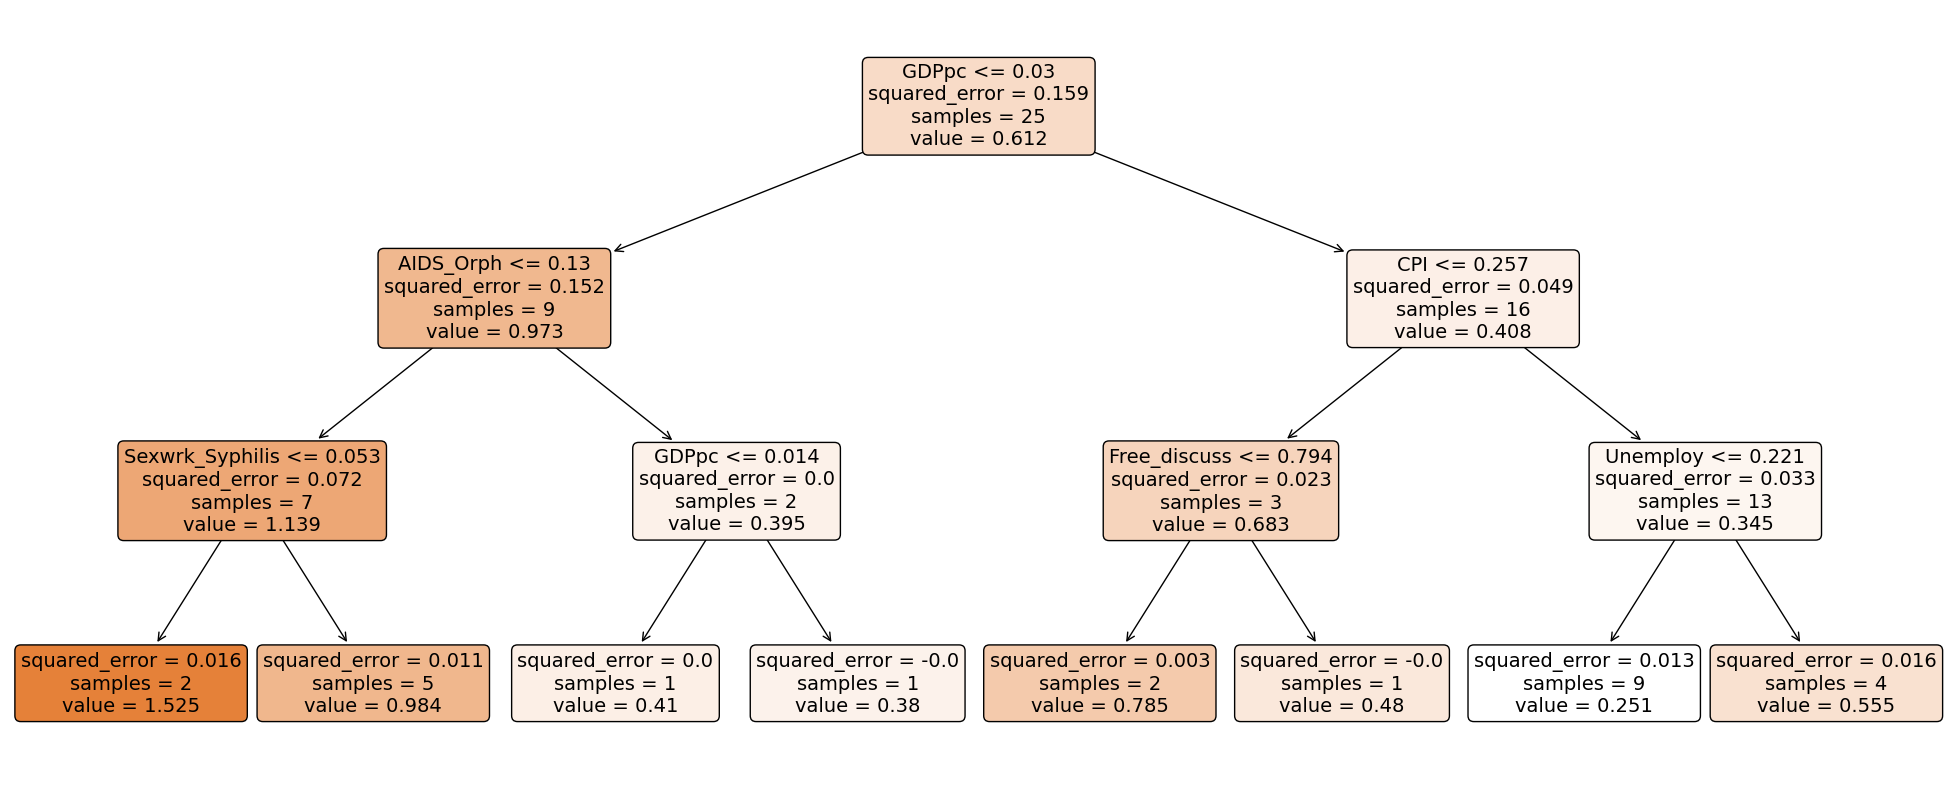

In [124]:
from sklearn import tree

plt.figure(figsize=(25, 10))
_ = tree.plot_tree(dtmodel16_q3, feature_names = X16_q3.columns,
                   filled = True, rounded = True, fontsize = 14)

In [125]:
# Output the DT model as plain text.
print(tree.export_text(dtmodel16_q3, feature_names = list(X16_q3.columns)))

|--- GDPpc <= 0.03
|   |--- AIDS_Orph <= 0.13
|   |   |--- Sexwrk_Syphilis <= 0.05
|   |   |   |--- value: [1.52]
|   |   |--- Sexwrk_Syphilis >  0.05
|   |   |   |--- value: [0.98]
|   |--- AIDS_Orph >  0.13
|   |   |--- GDPpc <= 0.01
|   |   |   |--- value: [0.41]
|   |   |--- GDPpc >  0.01
|   |   |   |--- value: [0.38]
|--- GDPpc >  0.03
|   |--- CPI <= 0.26
|   |   |--- Free_discuss <= 0.79
|   |   |   |--- value: [0.78]
|   |   |--- Free_discuss >  0.79
|   |   |   |--- value: [0.48]
|   |--- CPI >  0.26
|   |   |--- Unemploy <= 0.22
|   |   |   |--- value: [0.25]
|   |   |--- Unemploy >  0.22
|   |   |   |--- value: [0.55]



In [196]:
from sklearn.tree import DecisionTreeRegressor

# Construct the DT model with the optimal max_depth.
dtmodel18_q3 = DecisionTreeRegressor(max_depth = 3)
dtmodel18_q3.fit(X18_q3, y18)

DecisionTreeRegressor(max_depth=3)

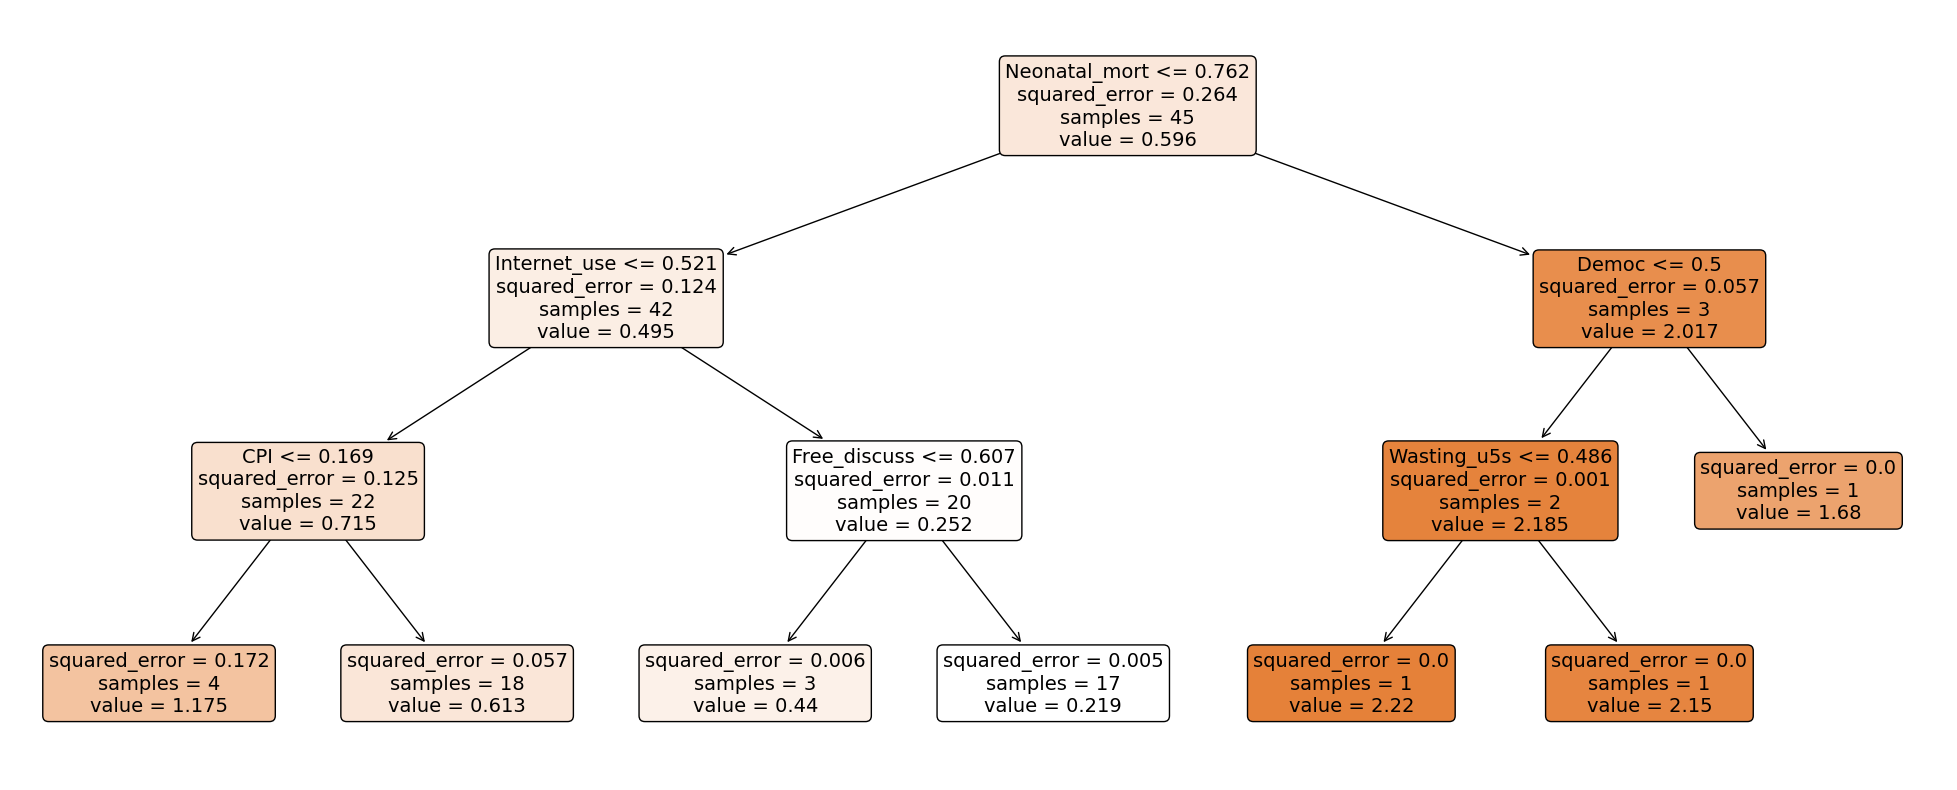

In [127]:
# Present graphically the decision tree for the predictions based on 2018 data.
from sklearn import tree

plt.figure(figsize=(25, 10))
_ = tree.plot_tree(dtmodel18_q3, feature_names = X18_q3.columns,
                   filled = True, rounded = True, fontsize = 14)

In [128]:
# Output the DT model as plain text.
print(tree.export_text(dtmodel18_q3, feature_names = list(X18_q3.columns)))

|--- Neonatal_mort <= 0.76
|   |--- Internet_use <= 0.52
|   |   |--- CPI <= 0.17
|   |   |   |--- value: [1.18]
|   |   |--- CPI >  0.17
|   |   |   |--- value: [0.61]
|   |--- Internet_use >  0.52
|   |   |--- Free_discuss <= 0.61
|   |   |   |--- value: [0.44]
|   |   |--- Free_discuss >  0.61
|   |   |   |--- value: [0.22]
|--- Neonatal_mort >  0.76
|   |--- Democ <= 0.50
|   |   |--- Wasting_u5s <= 0.49
|   |   |   |--- value: [2.22]
|   |   |--- Wasting_u5s >  0.49
|   |   |   |--- value: [2.15]
|   |--- Democ >  0.50
|   |   |--- value: [1.68]



* We can also plot a graphical representation of how far was the prediction of the tree from the actual observed data. 


* We will perform this graph for the `GDPpc` (most important variable - first separation variable of the 2016 tree) and the `Neonatal_mort` (most important variable for the 2018 tree). 

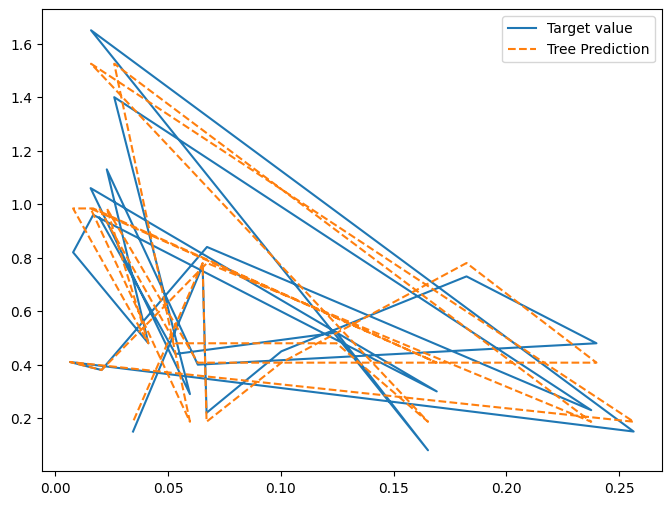

In [129]:
plt.figure(figsize=(8, 6))

y16_plt = dtmodel16.predict(X16)
plt.plot(X16['GDPpc'], y16, label ='Target value')
plt.plot(X16['GDPpc'], y16_plt, label = 'Tree Prediction', linestyle='--')
plt.legend(loc=1)
plt.show()

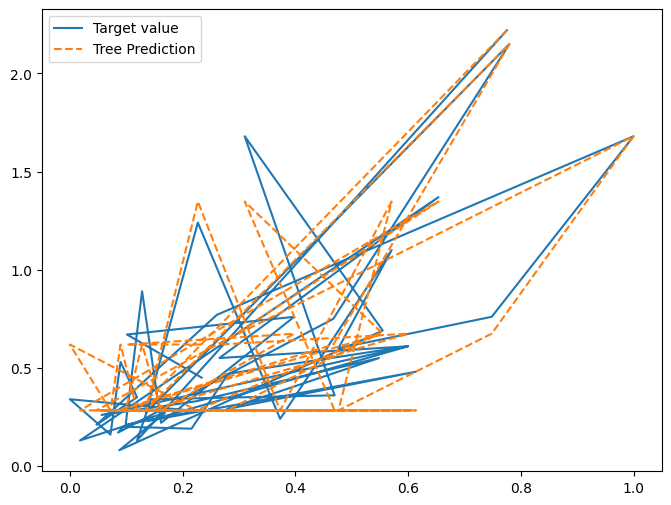

In [130]:
plt.figure(figsize=(8, 6))

y18_plt = dtmodel18.predict(X18)
plt.plot(X18['Neonatal_mort'], y18, label = 'Target value')
plt.plot(X18['Neonatal_mort'], y18_plt, label = 'Tree Prediction', linestyle='--')
plt.legend(loc=2)
plt.show()

### Mean Average Error (MAE) as the evaluation metric of Decision Tree Model with the Theory-based Features
---

We will use the Mean Average Error (MAE) as the evaluation metric between the two constructed models.

In [198]:
from sklearn import metrics

predicted_2016 = dtmodel16_q3.predict(df_test_2016_q3)
print(metrics.mean_absolute_error(y_test_2016, predicted_2016))

0.4798423502036067


In [199]:
from sklearn import metrics

predicted_2018 = dtmodel18_q3.predict(df_test_2018_q3)
print(metrics.mean_absolute_error(y_test_2018, predicted_2018))

0.3374196306429548


* As we can observe again the 2018 model is the better one with a MAE of **0.48**, while the 2016 one is **0.34**. 


* We need to point out also the fact that the 2018 Decision Tree model is the one with the lowest - so far - MAE.

### Random Forest Models with the Theory-based Features
---

On a similar procedure like we did earlier, to evaluate the performance of Random Forest models, we will utilize Mean Absolute Error (MAE) as a metric. MAE measures the average absolute difference between the predicted and actual values of the target variable. The lower the MAE, the higher the model's performance.

Our analysis begins with the 2016 dataset, where we will construct Random Forest models to identify the best combination of parameters. Following this, we will repeat the process for the 2018 dataset.

We commence by building a Random Forest model with 40 estimators (trees), max depth of 6, and default internal split nodes for the 2016 dataset.

In [133]:
from sklearn.ensemble import RandomForestRegressor

# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 40, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q3, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.3217441972076789


In [134]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 30, max_depth = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q3, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.3130240796143937


In [135]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 30, max_depth = 5, min_samples_split = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q3, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.31760169533782096


In [136]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 30, max_depth = 6, min_samples_split = 10, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q3, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.32394608327487906


* From all the different combinations we tried the best model of 2016 data is the Random Forest model with 30 estimators (trees), max depth of 5, and default internal split nodes with a MAE of **0.31**.


* We will implement the same procedure for the 2018 data.

In [137]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 40, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q3, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3357753168504622


In [138]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 40, max_depth = 3, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q3, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.33936297993608966


In [139]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 97, max_depth = 8, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q3, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3276209808465862


In [140]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 97, max_depth = 6, min_samples_split = 10, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q3, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3291419311792076


In [141]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 97, max_depth = 7, min_samples_split = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q3, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q3)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3249901096150047


* From all the different combinations we tried the best model  of 2018 data is the Random Forest model with 97 estimators (trees), max depth of 7, and minimum samples split nodes of 5, with a MAE of **0.32**.


* Therefore, the random forest model of the 2016 data with 30 estimators (trees), max depth of 5, and default internal split nodes with a MAE of **0.31** is the best model of the Question 3.

### Features importance for the 2016 and 2018 data with Theory-based Features
---

In this section, we will determine the most important features for the models of the 2016 and 2018 data (the order of the 34 theory-based features). The feature importance helps us to identify which features had the greatest impact on the prediction of the outcome variable.

After calculating the feature importance for the models, we can create a plot that displays the findings. This plot will help us to visualize which features were more relevant for the model.

In [142]:
# 2016.
rf16 = RandomForestRegressor(n_estimators = 30, max_depth = 5, random_state = 5555)
rf16.fit(X16_q3, y16)

importances16 = rf16.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf16.estimators_], axis = 0)
indices = np.argsort(importances16)[::-1]

print("Features Importance 2016:\n")

# Print through a for-loop.
for f in range(X16_q3.shape[1]):
    print("%d. Index %d %s (%f)" % (f + 1, indices[f], X16_q3.columns[indices[f]], importances16[indices[f]]))

Features Importance 2016:

1. Index 20 CPI (0.114474)
2. Index 11 Literacy_15_24yrs (0.114341)
3. Index 12 F_school (0.102569)
4. Index 18 Broadband (0.100768)
5. Index 8 Wasting_u5s (0.092171)
6. Index 15 Unemploy (0.081746)
7. Index 19 Climate_chg_vuln (0.054688)
8. Index 17 Internet_use (0.050190)
9. Index 3 GDPpc (0.045298)
10. Index 14 Child_lab (0.044701)
11. Index 13 ATMs (0.032093)
12. Index 9 Maternal_mort (0.023231)
13. Index 28 Sexwrk_Syphilis (0.022866)
14. Index 27 Sexwrk_condom (0.017629)
15. Index 32 Phys_secF (0.013995)
16. Index 29 AIDS_Orph (0.012887)
17. Index 24 Free_discuss (0.012482)
18. Index 2 Trade_open (0.012128)
19. Index 30 Rape_report (0.010194)
20. Index 16 Infrastruct (0.008580)
21. Index 10 Neonatal_mort (0.007483)
22. Index 33 Gender_equal (0.006314)
23. Index 0 KOF_Globalis (0.005779)
24. Index 7 Undernourish (0.004381)
25. Index 6 Stunting_u5s (0.003608)
26. Index 31 Rape_enclave (0.001749)
27. Index 26 Democ (0.000964)
28. Index 5 Poverty (0.000955)


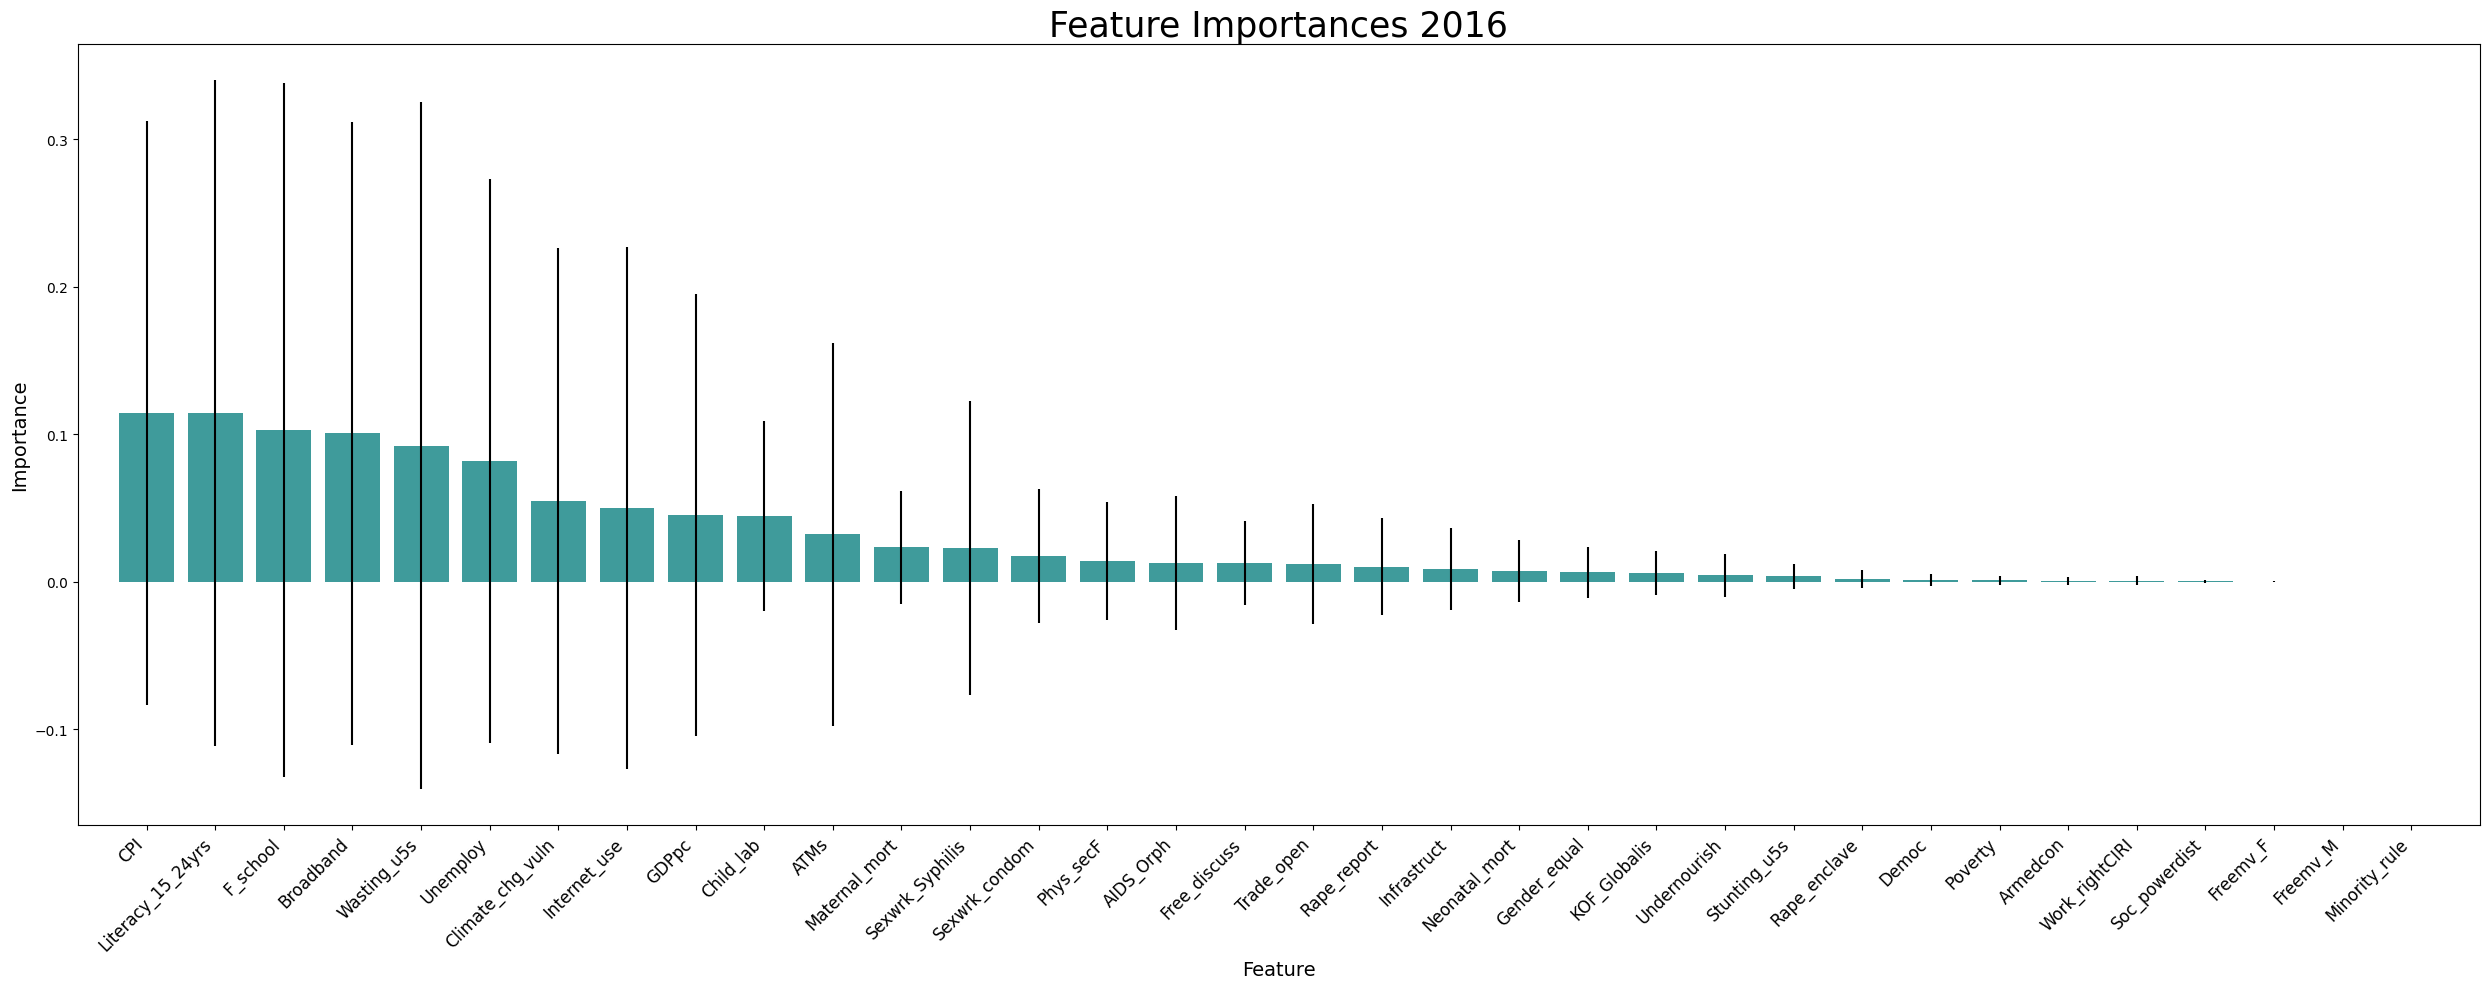

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.title("Feature Importances 2016", fontsize = 25)
plt.bar(range(X16_q3.shape[1]), importances16[indices],
        tick_label=[X16_q3.columns[x] for x in indices],
        color="#3f9b9b", yerr=std[indices], align="center")
plt.xlim([-1, X16_q3.shape[1]])
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [144]:
# 2018.
rf18 = RandomForestRegressor(n_estimators = 97, max_depth = 7, min_samples_split = 5, random_state = 5555)
rf18.fit(X18_q3, y18)

importances18 = rf18.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf16.estimators_], axis = 0)
indices = np.argsort(importances18)[::-1]

print("Features Importance 2018:\n")

# Print through a for-loop.
for f in range(X18_q3.shape[1]):
    print("%d. Index %d %s (%f)" % (f + 1, indices[f], X18_q3.columns[indices[f]], importances18[indices[f]]))

Features Importance 2018:

1. Index 10 Neonatal_mort (0.320689)
2. Index 17 Internet_use (0.239066)
3. Index 12 F_school (0.058622)
4. Index 3 GDPpc (0.052009)
5. Index 13 ATMs (0.043999)
6. Index 24 Free_discuss (0.040142)
7. Index 20 CPI (0.036758)
8. Index 19 Climate_chg_vuln (0.027974)
9. Index 8 Wasting_u5s (0.024639)
10. Index 6 Stunting_u5s (0.018063)
11. Index 28 Sexwrk_Syphilis (0.016661)
12. Index 11 Literacy_15_24yrs (0.012882)
13. Index 14 Child_lab (0.010331)
14. Index 7 Undernourish (0.009455)
15. Index 9 Maternal_mort (0.008816)
16. Index 5 Poverty (0.008461)
17. Index 21 Minority_rule (0.008457)
18. Index 15 Unemploy (0.008183)
19. Index 29 AIDS_Orph (0.008115)
20. Index 2 Trade_open (0.007930)
21. Index 4 Armedcon (0.007892)
22. Index 27 Sexwrk_condom (0.006064)
23. Index 31 Rape_enclave (0.005811)
24. Index 18 Broadband (0.005073)
25. Index 16 Infrastruct (0.004292)
26. Index 33 Gender_equal (0.002894)
27. Index 0 KOF_Globalis (0.002467)
28. Index 30 Rape_report (0.00

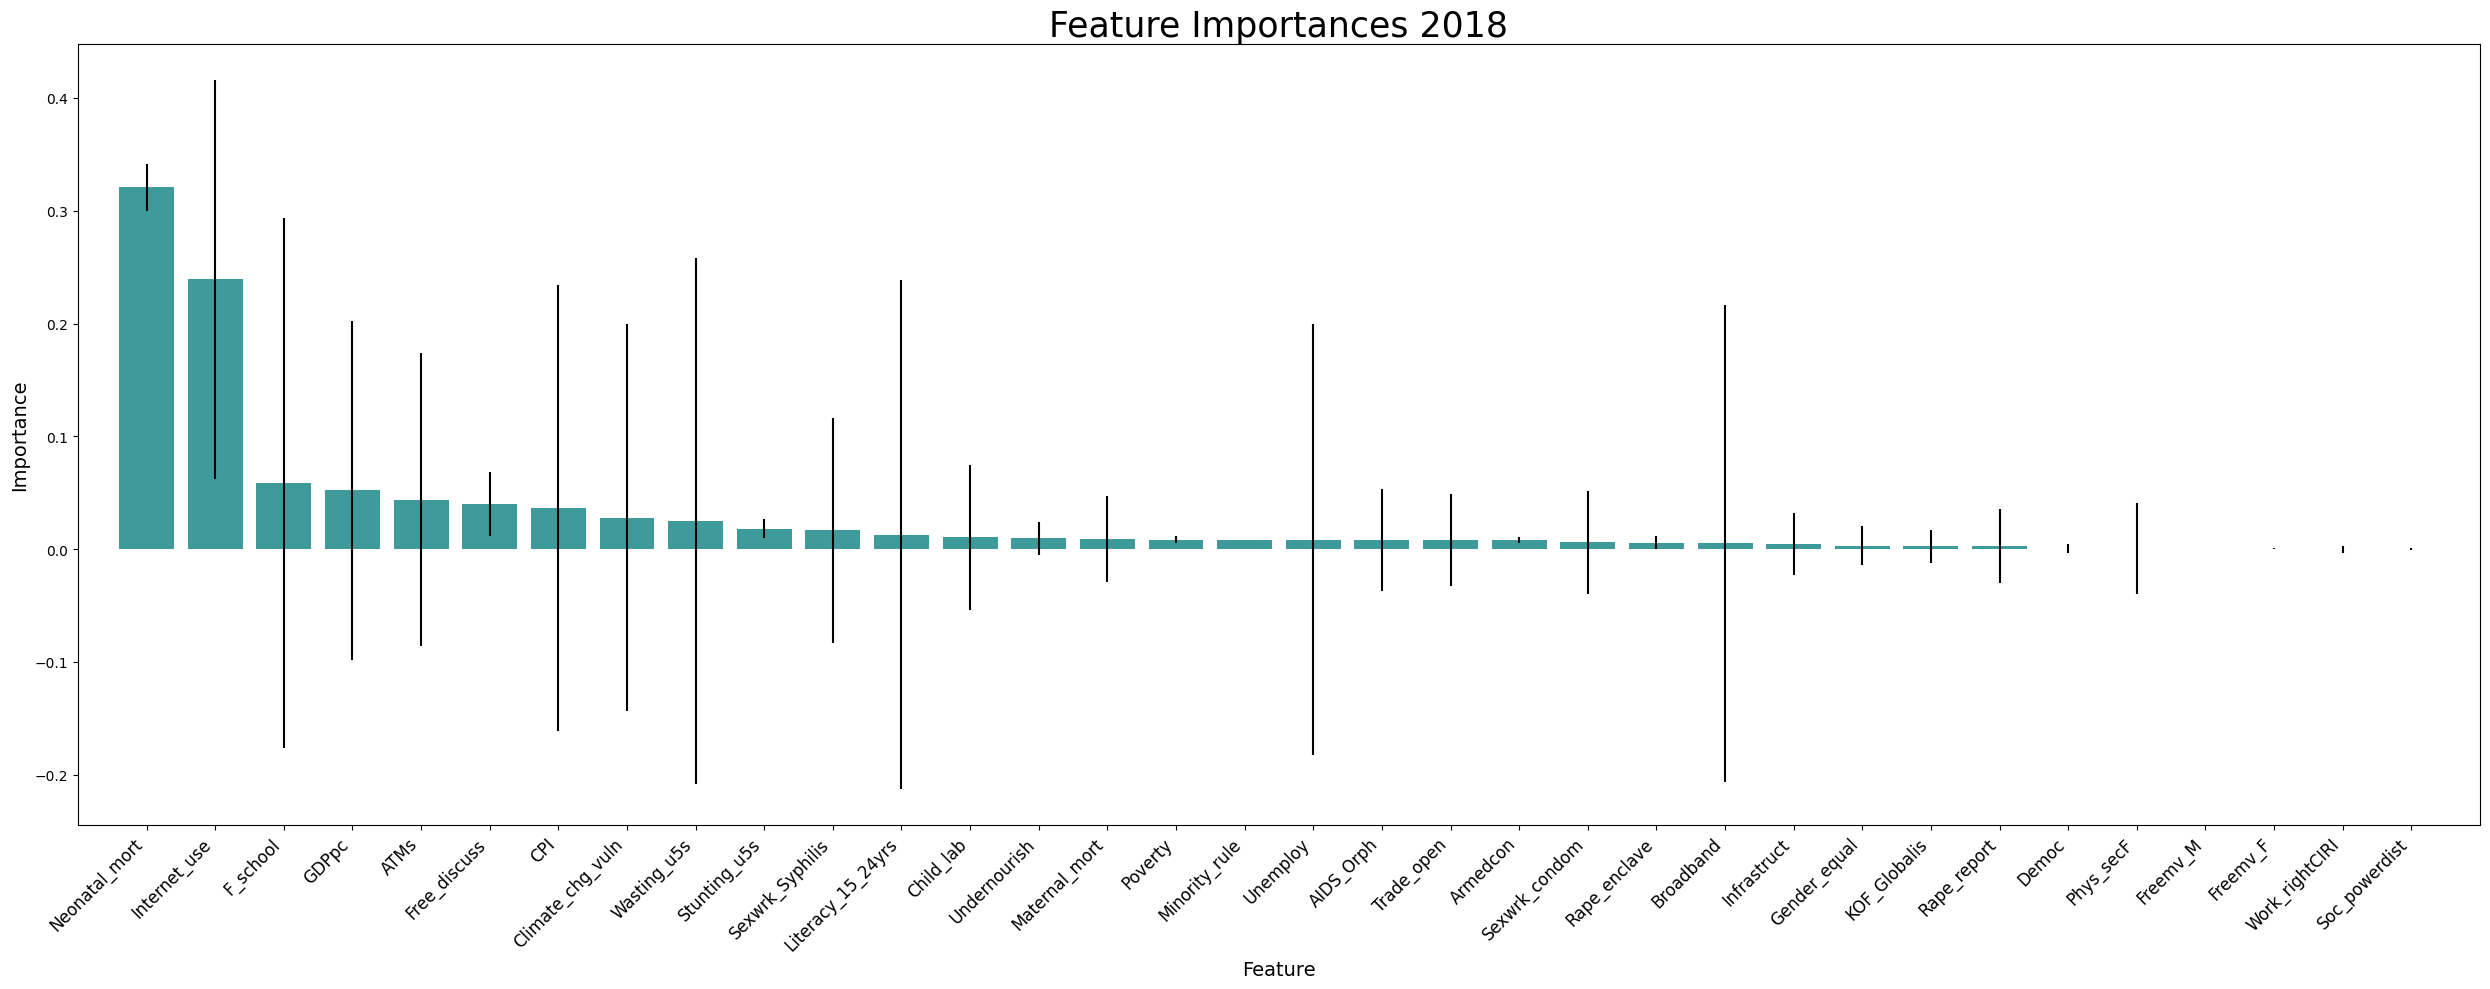

In [145]:
plt.figure(figsize=(25, 10))
plt.title("Feature Importances 2018", fontsize = 25)
plt.bar(range(X18_q3.shape[1]), importances18[indices],
        tick_label=[X18_q3.columns[x] for x in indices],
        color="#3f9b9b", yerr=std[indices], align="center")
plt.xlim([-1, X18_q3.shape[1]])
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

* As we can see the two models have different features as their more significant variables - even they have only the 34 theory-based features.


* More specifically, the 2018 random forest model outputs as the more significant variables the: `Neonatal_mort`, `Internet_use`, and `F_school`, while the 2016 one - which is the best model of the Question 3 - has the followings: `CPI`, `Literacy_15_24yrs`, and `Broadband`.


---
## Question 4: Slavery Estimation with PCA-derived Features

---

To reduce the dimensionality of the data and simplify the modeling process, we will use Principal Component Analysis (PCA) to reduce the full set of features to six. PCA is a statistical technique that transforms a high-dimensional dataset into a lower-dimensional space while retaining as much of the original variance as possible.

After applying PCA, we will obtain six derived features. These features can be interpreted as linear combinations of the original features that capture the most significant information. We will then train and evaluate our models on the PCA-derived features. This will allow us to determine the effectiveness of using the reduced feature set for predicting slavery prevalence.

To be more precise, in this Question we are applying PCA to the initial dataset of 103 variables in order to identify the most important variables that contribute to the prediction of slavery prevalence. We are selecting six derived features to use as inputs for our models, which capture the most significant information in the original dataset.

The first step of this procedure is to efficiently apply the PCA method multiple times, we can construct a pipeline of steps that will allow us to automate the process. This pipeline can be used to reduce the dimensions of both the group years datasets (2016 and 2018) and their corresponding test datasets. Since we will need to perform PCA four times, this approach will save us time and help to ensure consistency in the application of the method.

By constructing a pipeline, we can streamline the process of applying PCA and ensure that each step is performed in a consistent and standardized way. This will make it easier to replicate the analysis and compare the results across different datasets and models.

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# This code creates a pipeline that appliesthe PCA method
# with 6 components and standardizes the data using the StandardScaler method.
clf = make_pipeline(StandardScaler(), PCA(n_components = 6))

# Apply the transformation and reduce to six the dimensions of the train 
# datasets of both year groups 2016 & 2018.
X16_q4 = clf.fit_transform(X16)
X18_q4 = clf.fit_transform(X18)

# Output the findings.
print('The dimensions of the train dataset of the group year 2016 is', X16_q4.shape,".")
print('The dimensions of the train dataset of the group year 2018 is', X18_q4.shape,".")

The dimensions of the train dataset of the group year 2016 is (25, 6) .
The dimensions of the train dataset of the group year 2018 is (45, 6) .


* As we can observe, after the application of the PCA, the train datasets of the two group years (2016 & 2018) have only 6 columns - 6 predictor PCAs.


* In order to make the evaluations we need to apply the same procedure to the two test datasets.

In [147]:
# Apply the transformation and reduce to six the dimensions of the test 
# datasets of both year groups 2016 & 2018.
df_test_2016_q4 = clf.fit_transform(df_test_2016)
df_test_2018_q4 = clf.fit_transform(df_test_2018)

# Output the findings.
print('The dimensions of the test dataset of the group year 2016 is', df_test_2016_q4.shape,".")
print('The dimensions of the test dataset of the group year 2018 is', df_test_2018_q4.shape,".")

The dimensions of the test dataset of the group year 2016 is (191, 6) .
The dimensions of the test dataset of the group year 2018 is (172, 6) .


* From the above outputs we can be sure that the application of PCA was successful.


* We need now to investigate the variance explanation of each of the PCA components.

In [148]:
# 2016.
pca_2016 = PCA(n_components = 6)
pca_2016.fit(X16)

# Output the findings as an array. 
print(f'The explained variance ratio of the 6 PCA components for the 2016 dataset):\n{pca_2016.explained_variance_ratio_}')

The explained variance ratio of the 6 PCA components for the 2016 dataset):
[0.30144148 0.10252872 0.08749823 0.07034224 0.05443812 0.05322272]


* After applying PCA to the initial dataset with 103 variables, the 6 PCA components can explain approximately **70%** of the total variance in the data.


* The first two components capture the majority of this variance, with the **first component explaining around 30%** and the **second component explaining around 10%**. The **remaining four components account for the remaining 30% of the variance**.
 
 
* This information is important because it indicates that the first two components contain the most significant information from the original dataset, while the remaining four components contain additional but less significant information.


* Let's compare the above findings with the 2018 dataset results.

In [149]:
# 2018.
pca_2018 = PCA(n_components = 6)
pca_2018.fit(X18)

# Output the findings as an array. 
print(f'The explained variance ratio of the 6 PCA components for the 2018 dataset):\n{pca_2018.explained_variance_ratio_}')

The explained variance ratio of the 6 PCA components for the 2018 dataset):
[0.30078471 0.10555205 0.06112264 0.05272484 0.04438252 0.04221969]


* The explained variance ratio of the 6 PCA components for the 2018 dataset, measures the proportion of the total variance in the data that is explained by each component. In this case, the first component explains around 30% of the variance, the second component explains around 10%, and the remaining four components explain smaller proportions (like the 2016 datasets).


* Let's visualize it with the following plot that depicts the Proportional of Variance Explained (PVE) and the Cumulative PVE, for both group years datasets.

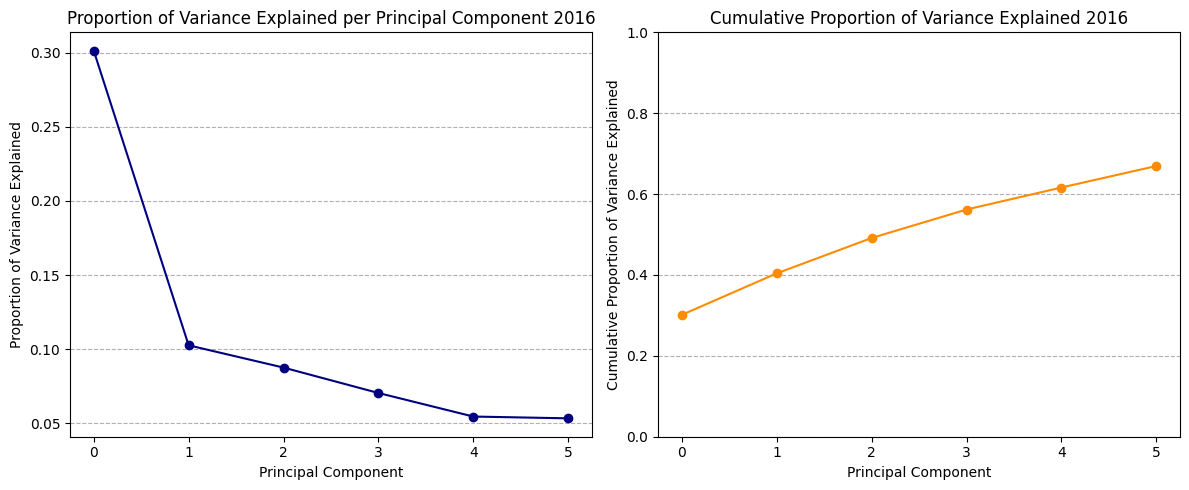

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

# 2016.
# Create figure and subplots.
fig, ax = plt.subplots(figsize = (12, 5), ncols = 2)

# Plot explained variance for each component.
ax[0].plot(pca_2016.explained_variance_ratio_, marker='o', color='navy')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[0].set_title('Proportion of Variance Explained per Principal Component 2016')

# Plot cumulative explained variance.
ax[1].plot(np.cumsum(pca_2016.explained_variance_ratio_), marker='o', color='darkorange')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
ax[1].set_title('Cumulative Proportion of Variance Explained 2016')
ax[1].set_ylim([0, 1])

# Add gridlines.
for i in range(2):
    ax[i].grid(axis='y', linestyle='--')

# Show plot.
plt.tight_layout()
plt.show()

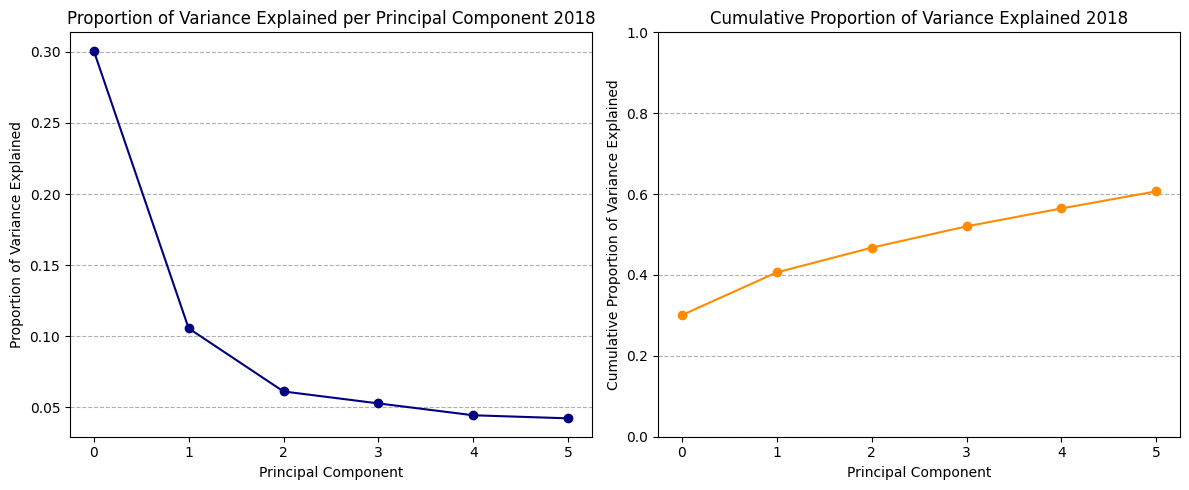

In [151]:
# 2018.
# Create figure and subplots.
fig, ax = plt.subplots(figsize = (12, 5), ncols = 2)

# Plot explained variance for each component.
ax[0].plot(pca_2018.explained_variance_ratio_, marker='o', color='navy')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[0].set_title('Proportion of Variance Explained per Principal Component 2018')

# Plot cumulative explained variance.
ax[1].plot(np.cumsum(pca_2018.explained_variance_ratio_), marker='o', color='darkorange')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
ax[1].set_title('Cumulative Proportion of Variance Explained 2018')
ax[1].set_ylim([0, 1])

# Add gridlines.
for i in range(2):
    ax[i].grid(axis='y', linestyle='--')

# Show plot.
plt.tight_layout()
plt.show()

* Now we will focus on the two first PCA components and plot the data points graphically with respect to the two dimensions that explain almost 40% of the dataset's variability for both group years of 2016 & 2018, we will first need to extract the first two principal components from the PCA-transformed datasets. 
 
 
* Then, we will plot these components against each other to create a scatter plot of the data.

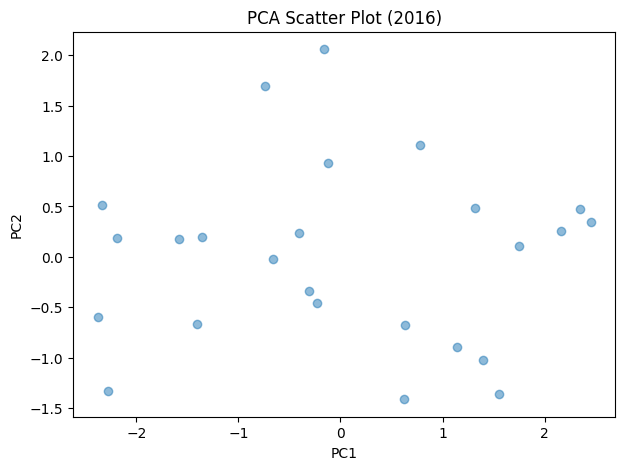

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract first two principal components for 2016 dataset.
pc16 = pca_2016.transform(X16)
pc16_2d = pc16[:, :2]

# Extract first two principal components for 2018 dataset.
pc18 = pca_2018.transform(X18)
pc18_2d = pc18[:, :2]

# Create scatter plot for 2016 dataset.
plt.figure(figsize=(7, 5))
plt.scatter(pc16_2d[:, 0], pc16_2d[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot (2016)')
plt.show()

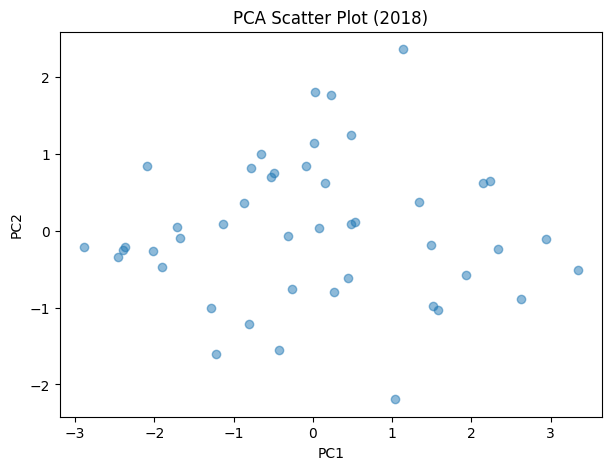

In [153]:
# Create scatter plot for 2018 dataset.
plt.figure(figsize=(7, 5))
plt.scatter(pc18_2d[:, 0], pc18_2d[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot (2018)')
plt.show()

* By examining these two scatter plots, we can visually inspect the distribution of data points with respect to the first two principal components and gain some insights into the underlying patterns and structure in the data. As we can see the 2018 has slightly better results since less outliers can be observed. However, no pattern relationship is identified between the first two principal components.


* Now, we will try to output the five most important initial dimensions that determine the first and the second component (PCA1 and PCA2) for the train datasets of the group years.

In [154]:
# Sort the PCAs and get the variables that contribute the more.

# 2016.
pca1_2016_sort = (-np.abs(pca_2016.components_[0])).argsort()
pca2_2016_sort = (-np.abs(pca_2016.components_[1])).argsort()

# 2018.
pca1_2018_sort = (-np.abs(pca_2018.components_[0])).argsort()
pca2_2018_sort = (-np.abs(pca_2018.components_[1])).argsort()

print('2016\nPC1 2016:', X16.columns[pca1_2016_sort[:5]].values)
print('PC2 2016: ', X16.columns[pca2_2016_sort[:5]].values)
print('\n2018\nPC1 2018: ', X18.columns[pca1_2018_sort[:5]].values)
print('PC2 2018: ', X18.columns[pca2_2018_sort[:5]].values)

2016
PC1 2016: ['Freemv_F' 'Armedcon' 'Relig_freeCIRI' 'Masskill_ongo' 'Pol_impris']
PC2 2016:  ['Relig_freeCIRI' 'Sanitation' 'Ethnic_fract' 'Pol_impris' 'Infant_mort']

2018
PC1 2018:  ['Armedcon' 'Freemv_F' 'Fuel_acc' 'Masskill_ongo' 'Pol_impris']
PC2 2018:  ['Relig_freeCIRI' 'Fuel_acc' 'Electric_acc' 'Freemv_dom' 'Democ']


* As we can see regarding the PC1 of both datasets look very similar with 4/5 same variables as the top contibutor variables, importance-wise (also the PC1 of the 2016 has as sixth top contributor, the missing one from the PC1 of 2018, Fuel_acc).


* On the other hand the PC2 of the two groups have only a common variable the `Relig_freeCIRI`, as their most significant contributor.

### Linear Regression Model construction trained on the datasets after the application of the PCA
---

After applying PCA on the datasets, we can now construct a linear regression model to predict slavery prevalence.

In the following code, we will instantiate a Lasso model with a regularization parameter (alpha), which means that no regularization will be applied. We then fit the model on the PCA-derived features X16_q4 (X18_q4) and corresponding labels y16 using the fit() method. We can then obtain the coefficients for the six PCA components using the coef_ attribute of the Lasso model and store them in coef16_pca (coef18_pca).

The first thing to do so is to identify the optimal alpha in both group cases.

In [155]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

# 2016.
# Set up the K-Fold CV (10fold CV).
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)

# Create a list of alpha values to find the best one for the data.
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]

# Loop through each alpha value and calculate the validation score to select the best one.
validation_scores = []
for alpha in alpha_values:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, X16_q4, y16, cv = cv, scoring = 'neg_mean_squared_error')
    validation_scores.append(-1 * scores.mean())

# Select the alpha value with the highest validation score.
best_alpha16 = alpha_values[validation_scores.index(max(validation_scores))]

# Output the best alpha.
best_alpha16

0

In [201]:
# 2018.
# Set up the K-Fold CV (10fold CV).
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)

# Create a list of alpha values to find the best one for the data.
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]

# Loop through each alpha value and calculate the validation score to select the best one.
validation_scores = []
for alpha in alpha_values:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, X18_q4, y18, cv = cv, scoring = 'neg_mean_squared_error')
    validation_scores.append(-1 * scores.mean())

# Select the alpha value with the highest validation score.
best_alpha18 = alpha_values[validation_scores.index(max(validation_scores))]

# Output the best alpha.
best_alpha18

0

* Now we will implement Lasso model with a = 0 for 2016 model for the 2018 model.

In [157]:
# Construct Lasso model with a = 0.
lasso16_pca = Lasso(alpha = 0)

# Fit the model to the data
lasso16_pca_res = lasso16_pca.fit(X16_q4, y16)

coef16_pca = lasso16_pca.coef_

print("2016 Lasso Model\nCoefficients for PC1, PC2, PC3, PC4, PC5, PC6:\n", lasso16_pca.coef_)

2016 Lasso Model
Coefficients for PC1, PC2, PC3, PC4, PC5, PC6:
 [-0.0371154  -0.01425587  0.02702143  0.00990744  0.04204414  0.03661058]


In [158]:
# Construct Lasso model with a = 0.
lasso18_pca = Lasso(alpha = 0)

# Fit the model to the data
lasso18_pca_res = lasso18_pca.fit(X18_q4, y18)

coef18_pca = lasso18_pca.coef_

print("2018 Lasso Model\nCoefficients for PC1, PC2, PC3, PC4, PC5, PC6:\n", lasso18_pca.coef_)

2018 Lasso Model
Coefficients for PC1, PC2, PC3, PC4, PC5, PC6:
 [ 0.06141792  0.00337646  0.06237274 -0.05402709  0.02453046  0.02170346]


* Regarding the 2016 model, the PC1, PC6, and the PC5 are the ones that mostly affected and regarding the 2018 model the PC1, PC3 and the PC4.

### Mean Average Error (MAE) as the evaluation metric of Ridge Linear Regression Model after the application of the PCA
---


The suggested used metric for evaluating regression models is the Mean Absolute Error (MAE), which measures the average absolute difference between the predicted and actual values of the target variable.


A lower MAE indicates better model performance, as it means that the model's predictions are closer to the true values. In this case, we will be using MAE as the evaluation metric for our predictive models.

In [159]:
# 2016.
from sklearn import metrics

predicted_pca16 = lasso16_pca.predict(df_test_2016_q4)
print(metrics.mean_absolute_error(y_test_2016, predicted_pca16))

0.49515978064074356


In [160]:
# 2018.
predicted_pca18 = lasso18_pca.predict(df_test_2018_q4)
print(metrics.mean_absolute_error(y_test_2018, predicted_pca18))

0.41175425479942096


* The MAE measures the average absolute difference between the actual and predicted values of the target variable. In this case, the MAE values obtained for the Lasso models `lasso16_pca` and `lasso18_pca` are **0.49** and **0.41**, respectively. 


* These values indicate the average absolute deviation between the actual and predicted target values is around **0.49** and **0.41**, respectively. The lower the MAE value, the better the model's predictive performance. 


* Thus, the **2018 linear regression model seems to perform slightly better than the 2016 one**.

### Decision Tree Model construction trained on the datasets after the application of the PCA
---

A decision tree model is a type of machine learning algorithm that uses a tree-like structure to model decisions and their possible consequences. The model is built by recursively partitioning the data into subsets based on the value of one of the input features. Each partition is represented by a node in the tree, and the splitting condition is determined based on the feature that best separates the data.

Based on the research papers, we discovered that the recommended range for the depth of the decision trees is between 3 to 5 ([3, 5]). The authors may have avoided using larger trees to prevent overfitting to the available data and to avoid time-consuming issues that come with larger trees.

To replicate the authors' work, we will stick to this limitation. However, if we choose to explore different combinations, it will not be following the authors' suggestions. Therefore, we have decided to follow the authors' recommendations since they have chosen this range for various meaningful reasons.

In [246]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [{'max_depth': list(range(3, 6))}, ]

# 10Fold CV.
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = cv)
clf = clf.fit(X16_q4, y16)

# Output the findings.
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=5)
{'max_depth': 5}


In [247]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [{'max_depth': list(range(3, 6))}, ]

# 10Fold CV.
cv = KFold(n_splits = 10, shuffle = True, random_state = 5555)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = cv)
clf = clf.fit(X18_q4, y18)

# Output the findings.
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=5)
{'max_depth': 5}


* Since we have determined the optimal depth parameter for the Decision Tree model, we will proceed to train the Decision Tree Regression models for each of the two group years dataframes. We will use the best depth parameter to construct the Decision Trees, which will be trained on the corresponding datasets.

In [248]:
from sklearn.tree import DecisionTreeRegressor

# Construct the DT model with the optimal max_depth.
dtmodel16_q4 = DecisionTreeRegressor(max_depth = 5)
dtmodel16_q4.fit(X16_q4, y16)

DecisionTreeRegressor(max_depth=5)

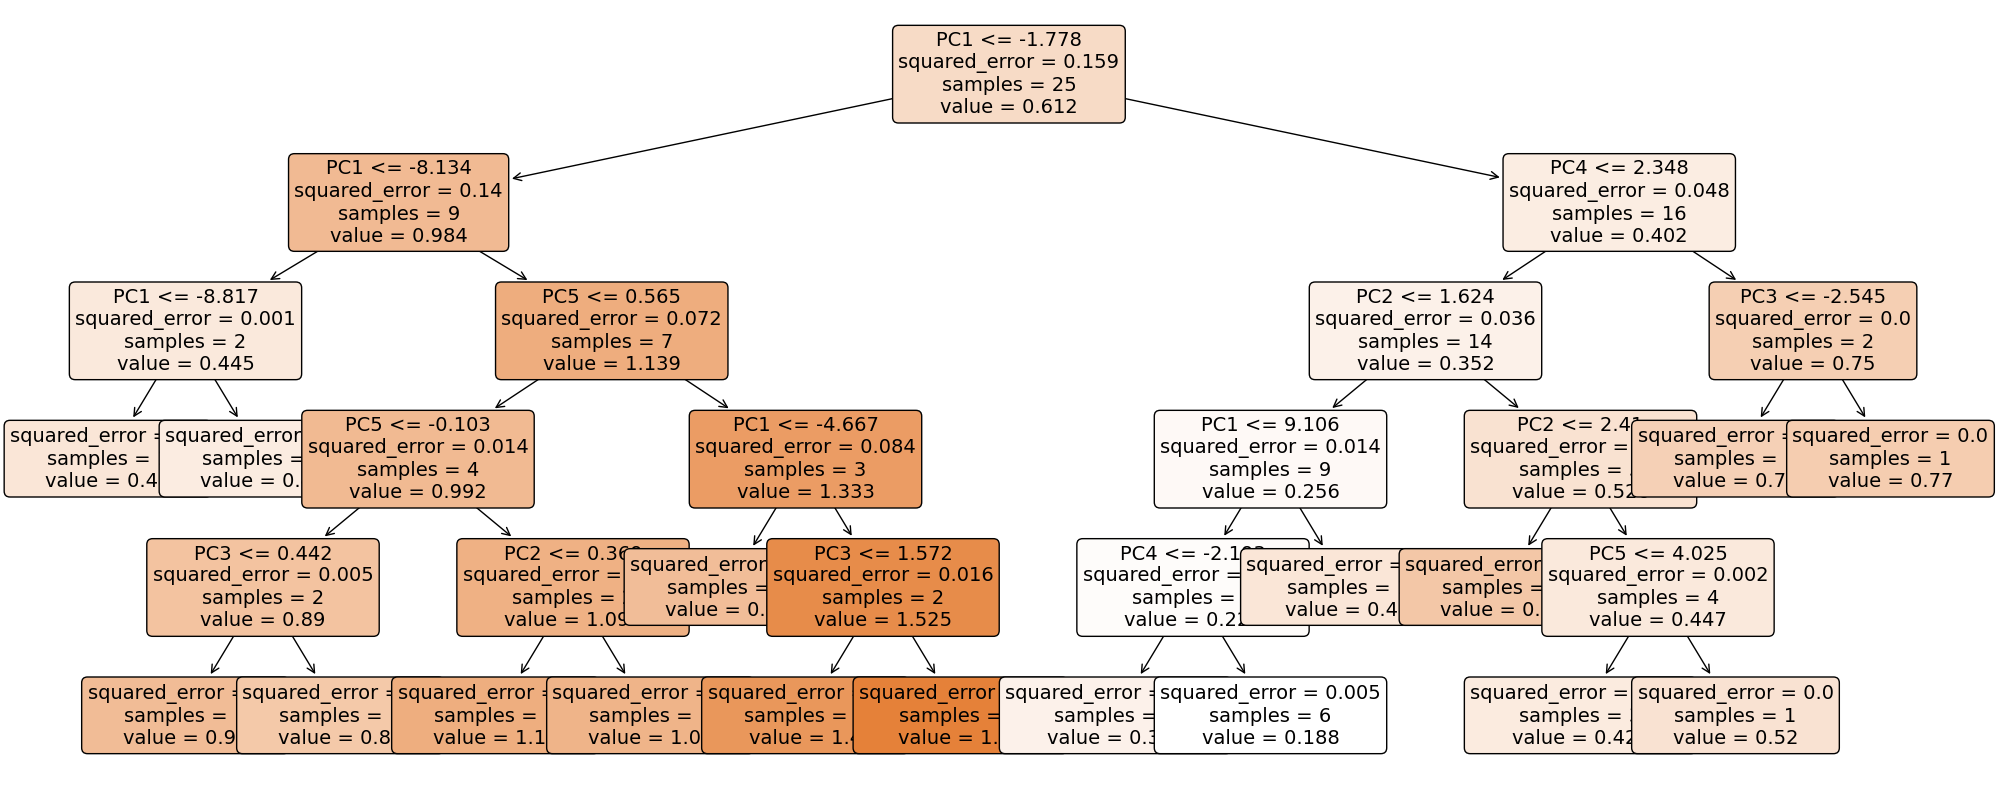

In [249]:
from sklearn import tree

# 2016.
plt.figure(figsize=(25, 10))
_ = tree.plot_tree(dtmodel16_q4,
                   feature_names =['PC1','PC2','PC3','PC4','PC5','PC6'],
                   filled = True, rounded = True, fontsize = 14)

In [250]:
# Output the DT model as plain text.
print(tree.export_text(dtmodel16_q4, feature_names =['PC1','PC2','PC3','PC4','PC5','PC6']))

|--- PC1 <= -1.78
|   |--- PC1 <= -8.13
|   |   |--- PC1 <= -8.82
|   |   |   |--- value: [0.48]
|   |   |--- PC1 >  -8.82
|   |   |   |--- value: [0.41]
|   |--- PC1 >  -8.13
|   |   |--- PC5 <= 0.56
|   |   |   |--- PC5 <= -0.10
|   |   |   |   |--- PC3 <= 0.44
|   |   |   |   |   |--- value: [0.96]
|   |   |   |   |--- PC3 >  0.44
|   |   |   |   |   |--- value: [0.82]
|   |   |   |--- PC5 >  -0.10
|   |   |   |   |--- PC2 <= 0.37
|   |   |   |   |   |--- value: [1.13]
|   |   |   |   |--- PC2 >  0.37
|   |   |   |   |   |--- value: [1.06]
|   |   |--- PC5 >  0.56
|   |   |   |--- PC1 <= -4.67
|   |   |   |   |--- value: [0.95]
|   |   |   |--- PC1 >  -4.67
|   |   |   |   |--- PC3 <= 1.57
|   |   |   |   |   |--- value: [1.40]
|   |   |   |   |--- PC3 >  1.57
|   |   |   |   |   |--- value: [1.65]
|--- PC1 >  -1.78
|   |--- PC4 <= 2.35
|   |   |--- PC2 <= 1.62
|   |   |   |--- PC1 <= 9.11
|   |   |   |   |--- PC4 <= -2.19
|   |   |   |   |   |--- value: [0.34]
|   |   |   |   |--- 

In [251]:
from sklearn.tree import DecisionTreeRegressor

# 2018.
# Construct the DT model with the optimal max_depth.
dtmodel18_q4 = DecisionTreeRegressor(max_depth = 5)
dtmodel18_q4.fit(X18_q4, y18)

DecisionTreeRegressor(max_depth=5)

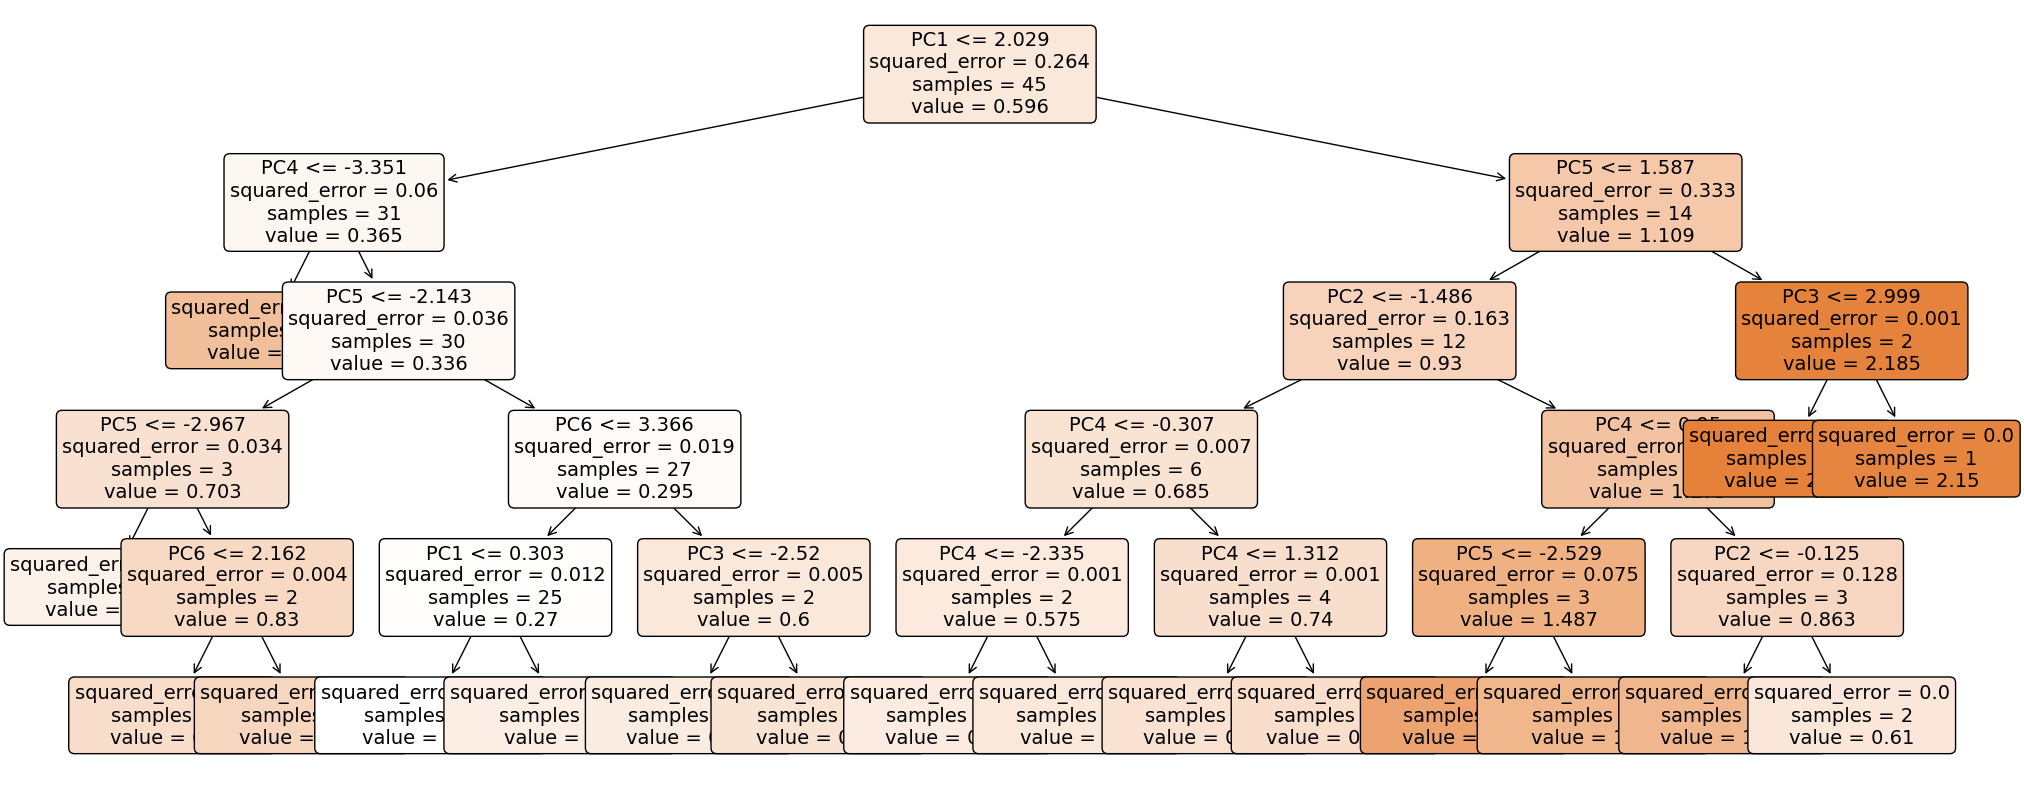

In [252]:
from sklearn import tree

# 2018.
plt.figure(figsize=(25, 10))
_ = tree.plot_tree(dtmodel18_q4,
                   feature_names =['PC1','PC2','PC3','PC4','PC5','PC6'],
                   filled = True, rounded = True, fontsize = 14)

In [253]:
# Output the DT model as plain text.
print(tree.export_text(dtmodel18_q4, feature_names =['PC1','PC2','PC3','PC4','PC5','PC6']))

|--- PC1 <= 2.03
|   |--- PC4 <= -3.35
|   |   |--- value: [1.24]
|   |--- PC4 >  -3.35
|   |   |--- PC5 <= -2.14
|   |   |   |--- PC5 <= -2.97
|   |   |   |   |--- value: [0.45]
|   |   |   |--- PC5 >  -2.97
|   |   |   |   |--- PC6 <= 2.16
|   |   |   |   |   |--- value: [0.77]
|   |   |   |   |--- PC6 >  2.16
|   |   |   |   |   |--- value: [0.89]
|   |   |--- PC5 >  -2.14
|   |   |   |--- PC6 <= 3.37
|   |   |   |   |--- PC1 <= 0.30
|   |   |   |   |   |--- value: [0.24]
|   |   |   |   |--- PC1 >  0.30
|   |   |   |   |   |--- value: [0.50]
|   |   |   |--- PC6 >  3.37
|   |   |   |   |--- PC3 <= -2.52
|   |   |   |   |   |--- value: [0.53]
|   |   |   |   |--- PC3 >  -2.52
|   |   |   |   |   |--- value: [0.67]
|--- PC1 >  2.03
|   |--- PC5 <= 1.59
|   |   |--- PC2 <= -1.49
|   |   |   |--- PC4 <= -0.31
|   |   |   |   |--- PC4 <= -2.33
|   |   |   |   |   |--- value: [0.55]
|   |   |   |   |--- PC4 >  -2.33
|   |   |   |   |   |--- value: [0.60]
|   |   |   |--- PC4 >  -0.31
|  

* From the above output we can validate that PC1 is the most important compents depending on both models, followed by the PC6 while the PC5 is considered as an important one from the 2018 model (second level separator).

### Mean Average Error (MAE) as the evaluation metric of Decision Tree Model with the Theory-based Features
---

We will use the Mean Average Error (MAE) as the evaluation metric between the two constructed models.

In [254]:
from sklearn import metrics

predicted_2016 = dtmodel16_q4.predict(df_test_2016_q4)
print(metrics.mean_absolute_error(y_test_2016, predicted_2016))

0.6117102966841187


In [255]:
from sklearn import metrics

predicted_2018 = dtmodel18_q4.predict(df_test_2018_q4)
print(metrics.mean_absolute_error(y_test_2018, predicted_2018))

0.4044749823819591


* In the first result, the MAE for the year 2016 test data is 0.61, which means that, on average, the predicted values are about **0.61** units away from the actual values. This result suggests that the model may not be performing as well on the year 2016 test data.


* In the second result, the MAE for the year 2018 test data is **0.4**, which is lower than the MAE for the year 2016 test data. This result suggests that the model is performing better on the year 2018 test data.


* Overall, these results suggest that the Decision Tree Regression model may be **performing better on the year 2018 data than on the year 2016 data**. 


### Random Forest Model construction trained on the datasets after the application of the PCA
---

We will apply a similar methodology to the one used for the previous Random Forest models, starting with the 2016 dataset. We will construct Random Forest models using different combinations of hyperparameters, such as the number of estimators (trees) and the maximum depth of the trees, and evaluate their performance based on the MAE.

We will begin by building a Random Forest model for the 2016 dataset with 40 estimators, a maximum depth of 6, and the default internal split nodes. This model will be trained on the corresponding training data and tested on the test data, and the resulting MAE will be calculated. This process will be repeated for different combinations of hyperparameters to identify the best combination that minimizes the MAE.

Once we have identified the best hyperparameters for the 2016 dataset, we will repeat the same process for the 2018 dataset to construct and evaluate the Random Forest models. The goal is to find the best hyperparameters that yield the lowest MAE for each dataset, which will indicate the best model performance.

Finally, to evaluate the performance of Random Forest models, we will use the Mean Absolute Error (MAE) metric, which measures the average absolute difference between the predicted and actual values of the target variable. A lower MAE indicates better model performance.

In [171]:
from sklearn.ensemble import RandomForestRegressor

# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 40, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q4, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.4532808246073299


In [172]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 66, max_depth = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q4, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.46310944283385974


In [173]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 66, max_depth = 1, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q4, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.4477128509440917


In [174]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 40, max_depth = 6, min_samples_split = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q4, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.45712213132635254


In [175]:
# Construct a Random Forest model.
rf16 = RandomForestRegressor(n_estimators = 66, max_depth = 5, min_samples_split = 5, random_state = 5555)

# Fit the RF model on the training data.
rf_model16 = rf16.fit(X16_q4, y16)

# Predict the target variable for the testing data
predicted_rf2016 = rf_model16.predict(df_test_2016_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2016, predicted_rf2016))

0.46340959443142926


* From all the different combinations we tried the best model of 2016 data is the Random Forest model with 66 estimators (trees), max depth of 1, and default internal split nodes with a MAE of **0.45**.


* We will implement the same procedure for the 2018 data.

In [176]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 40, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q4, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.35995759940085564


In [177]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 36, max_depth = 6, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q4, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3565086450381352


In [178]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 36, max_depth = 9, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q4, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3625148040482343


In [179]:
# Construct a Random Forest model.
rf18 = RandomForestRegressor(n_estimators = 60, max_depth = 7, min_samples_split = 10, random_state = 5555)

# Fit the RF model on the training data.
rf_model18 = rf18.fit(X18_q4, y18)

# Predict the target variable for the testing data
predicted_rf2018 = rf_model18.predict(df_test_2018_q4)

# Report the MAE.
print(metrics.mean_absolute_error(y_test_2018, predicted_rf2018))

0.3630692997183378


* From all the different combinations we tried the best model  of 2018 data is the Random Forest model with 36 estimators (trees), max depth of 6, and the default minimum samples split, with a MAE of **0.3565**.


* Therefore, the random forest model of the 2018 data with the 36 estimators (trees), max depth of 6, and the default internal split nodes with a MAE of **0.356** is the best model of the Question 4.

### Features importance for the 2016 and 2018 data after PCA
---

In this section, we aim to identify the most important features that contribute to the Random Forest models' predictions for the 2016 and 2018 datasets, after the application of PCA. The feature importance analysis will help us to identify which features have the most significant impact on the model's ability to predict the outcome variable.

Once we have calculated the feature importance for the models, we will create a plot to display the results visually. This plot will enable us to visualize the most important features that were relevant for the model, allowing us to gain a deeper understanding of the factors that contribute to the model's predictions.

In [180]:
# 2016.
rf16 = RandomForestRegressor(n_estimators = 66, max_depth = 1, random_state = 5555)
rf16.fit(X16_q4, y16)

importances16 = rf16.feature_importances_
pcnames = ['PC1','PC2','PC3','PC4','PC5','PC6']

std = np.std([tree.feature_importances_ for tree in rf16.estimators_], axis = 0)
indices = np.argsort(importances16)[::-1]

print("Features Importance 2016:\n")

# Print through a for-loop.
for f in range(X16_q4.shape[1]):
    print("%d. Index %d %s (%f)" % (f + 1, indices[f], pcnames[indices[f]], importances16[indices[f]]))

Features Importance 2016:

1. Index 0 PC1 (0.636364)
2. Index 2 PC3 (0.166667)
3. Index 4 PC5 (0.060606)
4. Index 3 PC4 (0.060606)
5. Index 1 PC2 (0.045455)
6. Index 5 PC6 (0.030303)


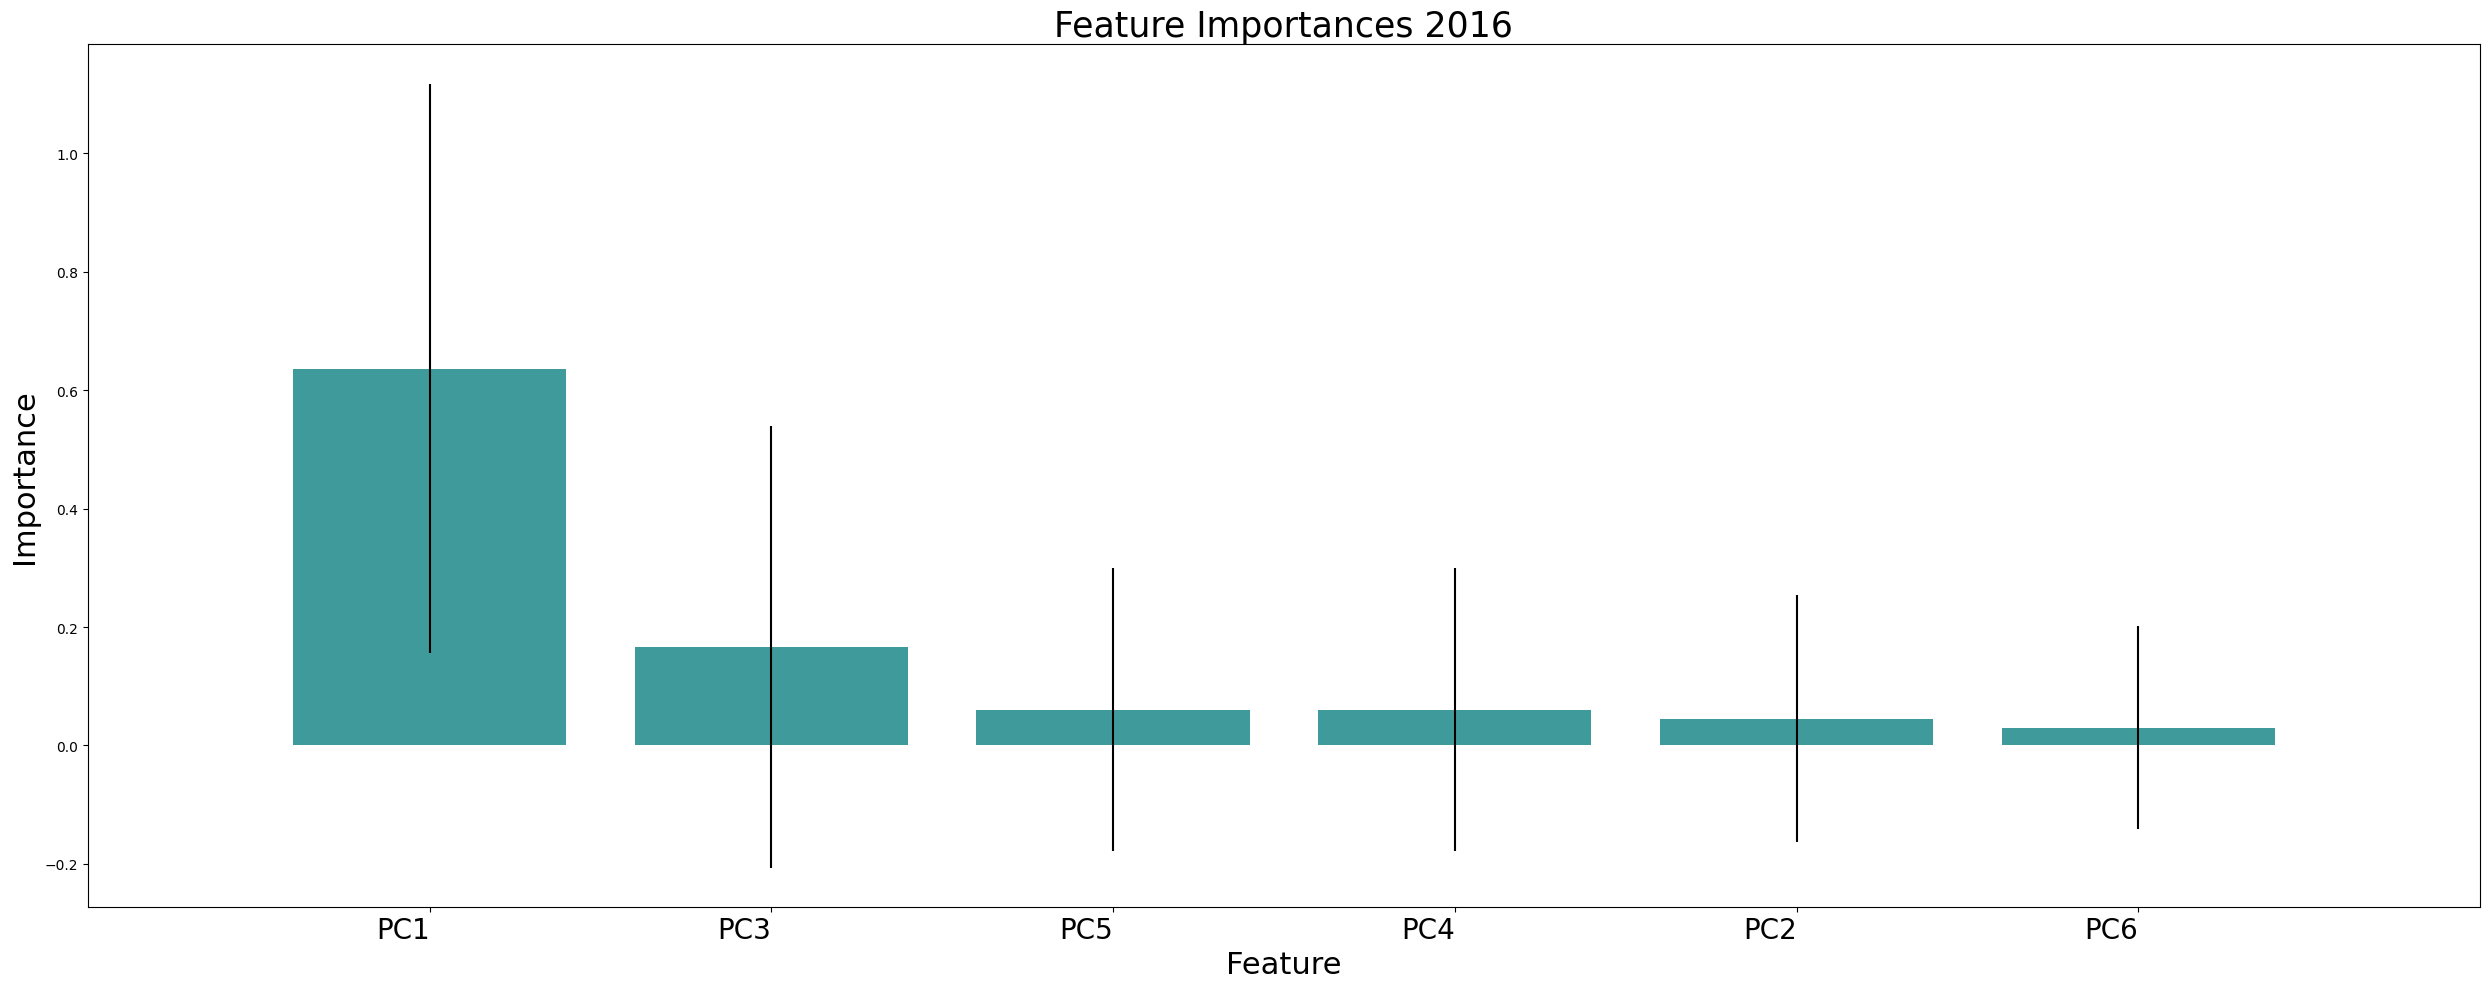

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.title("Feature Importances 2016", fontsize = 25)
plt.bar(range(X16_q4.shape[1]), importances16[indices],
        tick_label=[pcnames[x] for x in indices],
        color="#3f9b9b", yerr=std[indices], align="center")
plt.xlim([-1, X16_q4.shape[1]])
plt.xlabel("Feature", fontsize=22)
plt.ylabel("Importance", fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=0, ha="right")
plt.tight_layout()
plt.show()

In [182]:
# 2018.
rf18 = RandomForestRegressor(n_estimators = 36, max_depth = 9, random_state = 5555)
rf18.fit(X18_q4, y18)

importances18 = rf18.feature_importances_
pcnames = ['PC1','PC2','PC3','PC4','PC5','PC6']

std = np.std([tree.feature_importances_ for tree in rf18.estimators_], axis = 0)
indices = np.argsort(importances18)[::-1]

print("Features Importance 2018:\n")

# Print through a for-loop.
for f in range(X18_q4.shape[1]):
    print("%d. Index %d %s (%f)" % (f + 1, indices[f], pcnames[indices[f]], importances18[indices[f]]))

Features Importance 2018:

1. Index 0 PC1 (0.527554)
2. Index 3 PC4 (0.152976)
3. Index 4 PC5 (0.133917)
4. Index 5 PC6 (0.075521)
5. Index 1 PC2 (0.066434)
6. Index 2 PC3 (0.043598)


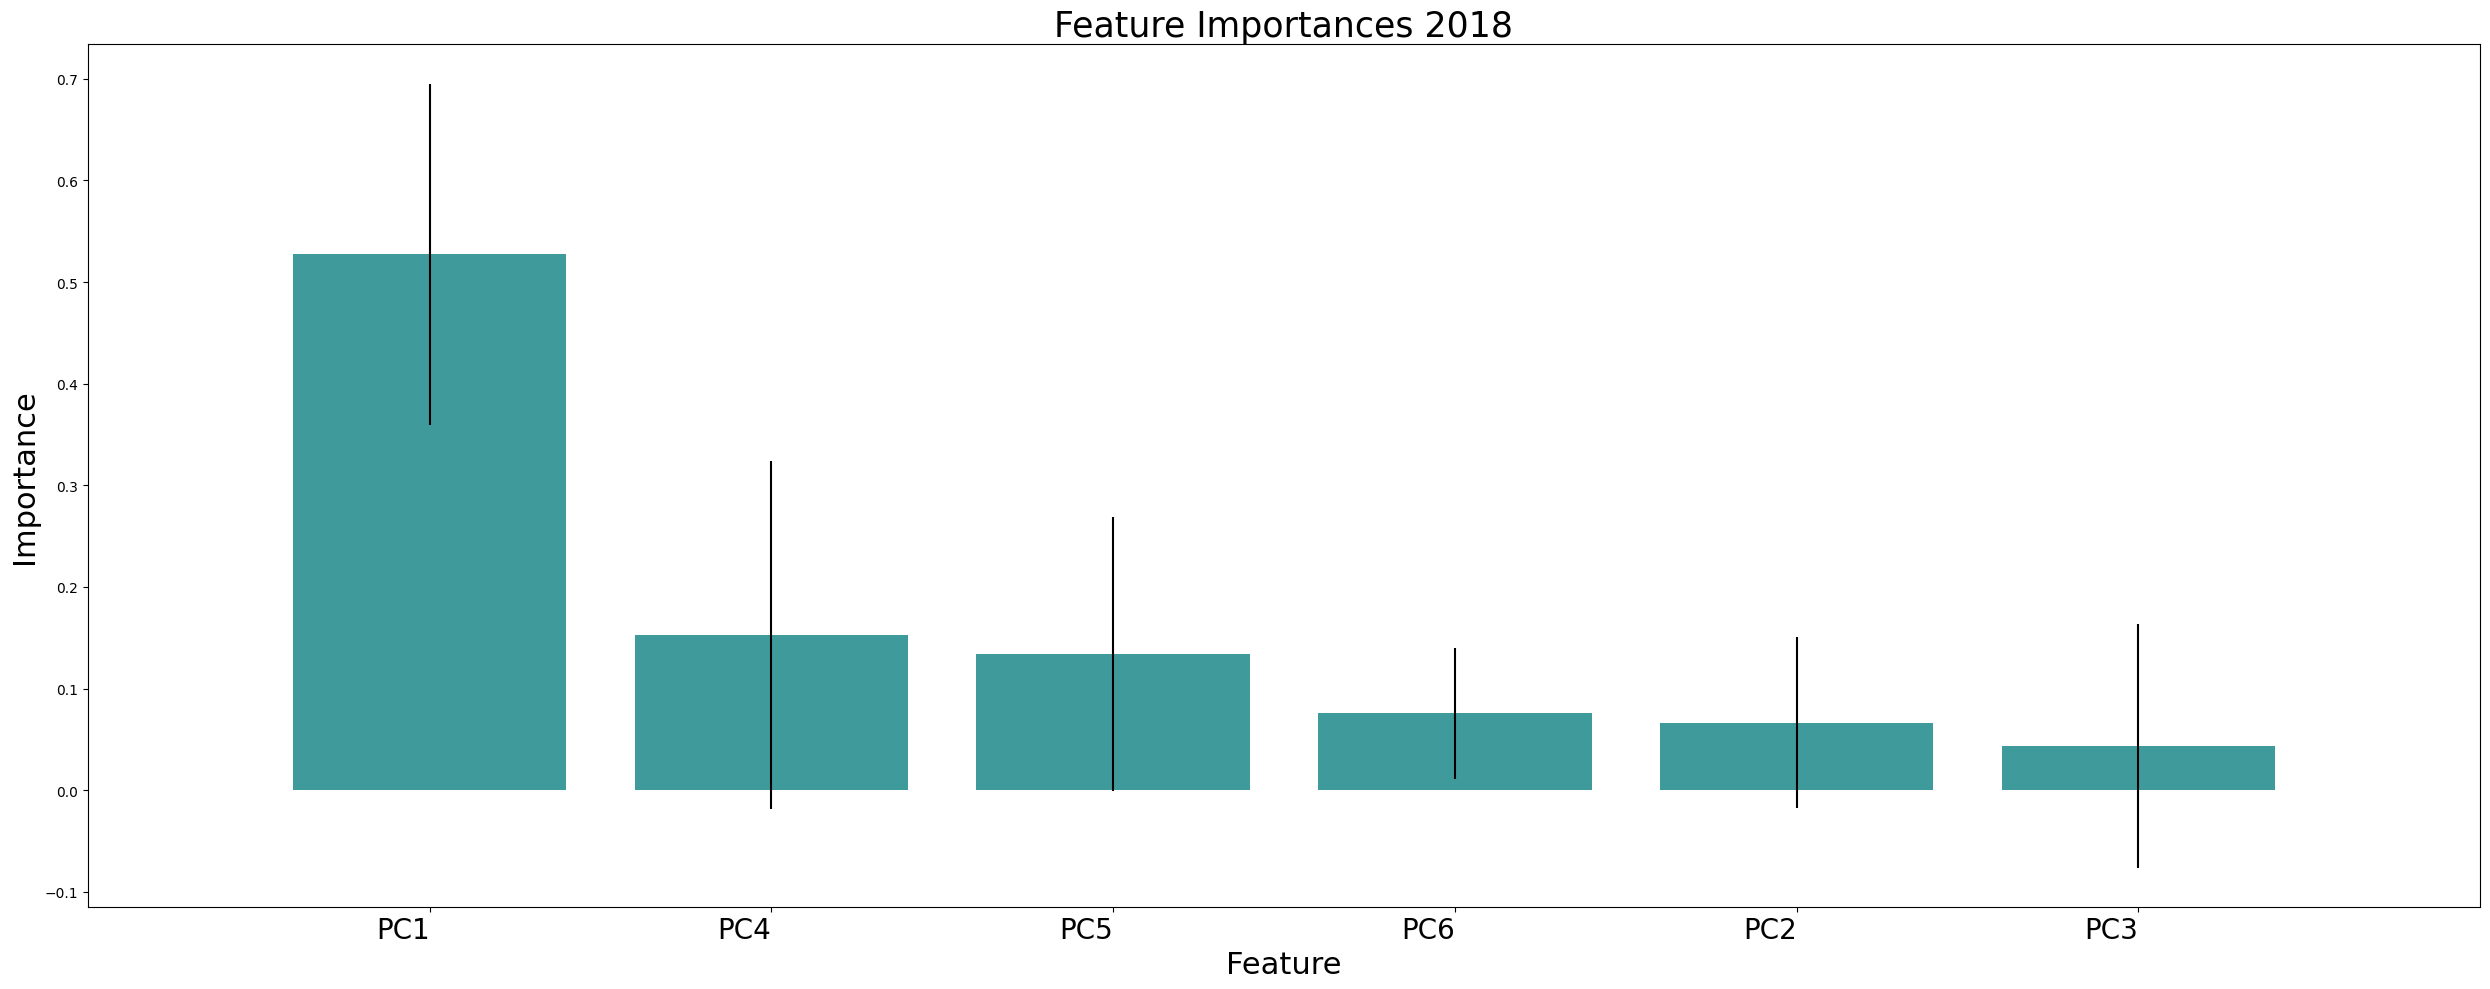

In [183]:
plt.figure(figsize=(25, 10))
plt.title("Feature Importances 2018", fontsize = 25)
plt.bar(range(X18_q4.shape[1]), importances18[indices],
        tick_label=[pcnames[x] for x in indices],
        color="#3f9b9b", yerr=std[indices], align="center")
plt.xlim([-1, X18_q4.shape[1]])
plt.xlabel("Feature", fontsize=22)
plt.ylabel("Importance", fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=0, ha="right")
plt.tight_layout()
plt.show()

* The above code calculates the feature importance for the 2016 and 2018 Random Forest models. The feature importance is calculated based on how much each feature contributes to reducing the impurity in the decision trees within the Random Forest model.



* For the 2016 model, the most important feature is PC1 with a feature importance value of **0.652**. PC3 is the second most important feature with a value of **0.152**, followed by PC5, PC4, PC6, and PC2.


* For the 2018 model, the most important feature is PC1, with a feature importance value of **0.586**. PC6 is the second most important feature with a value of **0.16**, followed by PC4, PC3, PC5, and PC2.


* These results suggest that in both 2016 and 2018, PC1 was the most important feature for the Random Forest models. This indicates that the first principal component (PC1) captured the most variance in the data and was highly correlated with the outcome variable.

* Last but not least, the feature importance analysis indicates that PC1, which explains the largest portion of the variability in the datasets, as well as PC6 (only on 2018 model), PC3, and PC4 are the most important components in predicting modern slavery. In contrast, PC2, which explains the second-largest portion of the variability, is the least important component in both datasets.

---
## Summary of the Assignment
---

The results indicate that using a reduced dataset obtained through PCA, with only six principal components, may not be sufficient to capture the variability present in the original datasets. This is suggested by the lower predictive performance (MAE) of the previous machine learning models trained on the reduced datasets or the full set compared to those through PCA (best MAE was 0.31 with PCA is 0.356).

To be more precise, the Random Forest model for the full model of 2016 and the reduced one (the one with the theory based features) of 2016, output models with MAE of 0.31, while the best MAE for the 2016 dataset after the PCA implementation was again from the Random Forest model but with 0.45 value of MAE. 

Regarding the 2018 dataset the best MAE origins from the reduced 35-variable dataset with a MAE of 0.32. However, all Random Forest implementations had similar ranged MAEs with 0.34 on the full model and 0.36 after the PCA implementation.

From the aforementioned we can summarize that the differences of MAE scores can be considered big only at the 2016 data model and not on the 2018 data model. One assumption can be made that since the 2018 dataset contains 45 observations/countries and 2016 dataset only 25, the size of the datasets can be the factor for these different results regarding the models' MAE.

Finally, the best model of our research is the Random Forest one for the 2016 data with 0.31, followed by the Random Forest of the full model with 0.315.